In [1]:
# import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)

In [63]:
# turn off scientific notation 
pd.set_option('display.float_format', '{:.6f}'.format)

# Read in data

In [64]:
data = pd.read_csv('model_data/full_model_data_2122.csv', index_col=0)

In [65]:
data.head()

URN  not_sustained_rate  not_sustained_rate_overalldest  total_absence  \
1  138116            4.065041                        4.310345      15.400000   
2  137899            1.739130                        1.777778       7.700000   
3  146639           11.864407                       13.461538       9.700000   
4  137603            2.586207                        2.690583       8.100000   
5  140865            3.717472                        3.921569      10.900000   

   persistent_absence                              urban_rural  \
1           47.300000    (England/Wales) Rural town and fringe   
2           23.300000  (England/Wales) Urban minor conurbation   
3           31.200000  (England/Wales) Urban minor conurbation   
4           26.700000  (England/Wales) Urban minor conurbation   
5           35.700000  (England/Wales) Urban minor conurbation   

             denomination       FSM  White_British       EAL  perc_boys  \
1  No religious character 29.000000      94.000000  2.300000  47.969543   
2  No religious character 13.200000      89.700000  3.800000  49.004975   
3  No religious character 44.100000      91.000000  4.800000  50.931677   
4  No religious character 15.600000      91.400000  3.600000  48.567335   
5          Roman Catholic 20.700000      62.200000 15.900000  48.205823   

                region_name                       school_name   headcount  \
1  Yorkshire and The Humber                Campsmount Academy  788.000000   
2  Yorkshire and The Humber                 Hungerhill School 1206.000000   
3  Yorkshire and The Humber                The Laurel Academy  644.000000   
4  Yorkshire and The Humber                  Ridgewood School 1396.000000   
5  Yorkshire and The Humber  The McAuley Catholic High School 1477.000000   

   perm_excl_rate  susp_rate  one_plus_susp_rate  KS4_headcount  KS2_history  \
1        0.253810  41.624370           14.213200     143.000000   102.100000   
2        0.331670  14.510780            7.213930     249.000000   103.000000   
3        0.000000  44.565220           14.130430     121.000000   101.000000   
4        0.071630  12.320920            6.375360     238.000000   104.600000   
5        0.270820  12.119160            6.093430     262.000000   102.900000   

   Attainment_8  Progress_8  selective  KS4_pass_rate POSTCODE  post16  \
1     37.500000   -0.900000          0       5.000000  DN6 9AS       1   
2     51.100000    0.330000          0      38.000000  DN3 2JY       0   
3     45.800000    0.160000          0       7.000000  S64 9SD       0   
4     48.600000   -0.270000          0      11.000000  DN5 7UB       1   
5     45.500000   -0.180000          0      12.000000  DN3 3QF       1   

  school_sex                 type         Ofsted_rating  sen_support     ehcp  \
1      Mixed    Academy converter  Requires improvement    13.705584 2.157360   
2      Mixed    Academy converter           Outstanding    11.691542 1.326700   
3      Mixed  Academy sponsor led                  Good     9.472050 0.931677   
4      Mixed    Academy converter                  Good    12.607450 1.289398   
5      Mixed    Academy converter  Requires improvement    10.494245 1.150982   

      LSOA11      IMD  pupil_teacher_ratio  assistant_teacher_ratio  \
1  E01007493 7.000000            13.700000                 0.400000   
2  E01007478 4.000000            17.300000                 0.200000   
3  E01007583 5.000000            19.900000                 0.300000   
4  E01007588 5.000000            16.300000                 0.200000   
5  E01007603 9.000000            15.700000                 0.100000   

   absence_rate_non_excl  
1              14.964096  
2               7.599267  
3               9.303709  
4               7.938303  
5              10.667389

### Drop school types that are specialist or only KS4 & 5

In [66]:
data['type'] = data['type'].astype(str)
np.unique(data['type'])

array(['Academy converter', 'Academy sponsor led',
       'City technology college', 'Community school', 'Foundation school',
       'Free schools', 'Further education', 'Studio schools',
       'University technical college', 'Voluntary aided school',
       'Voluntary controlled school'], dtype=object)

In [67]:
types = ['Academy converter', 'Academy sponsor led',
         'Community school', 'Foundation school',
         'Free schools', 'Voluntary aided school',
         'Voluntary controlled school']

data = data.loc[data['type'].isin(types)]

np.unique(data['type'])

array(['Academy converter', 'Academy sponsor led', 'Community school',
       'Foundation school', 'Free schools', 'Voluntary aided school',
       'Voluntary controlled school'], dtype=object)

### Drop null values

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3058 entries, 1 to 3140
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   URN                             3058 non-null   int64  
 1   not_sustained_rate              3058 non-null   float64
 2   not_sustained_rate_overalldest  3058 non-null   float64
 3   total_absence                   3044 non-null   float64
 4   persistent_absence              3044 non-null   float64
 5   urban_rural                     3045 non-null   object 
 6   denomination                    3045 non-null   object 
 7   FSM                             3045 non-null   float64
 8   White_British                   3045 non-null   float64
 9   EAL                             3045 non-null   float64
 10  perc_boys                       3045 non-null   float64
 11  region_name                     3026 non-null   object 
 12  school_name                     3026 no

In [69]:
data = data.dropna(subset=['Ofsted_rating'])

In [70]:
data = data.dropna(subset=['Progress_8'])

In [71]:
data = data.dropna(subset=['total_absence'])

In [72]:
data = data.dropna(subset=['LSOA11'])

In [73]:
data = data.dropna(subset=['pupil_teacher_ratio'])

In [74]:
data['not_sustained_rate'].describe()

count   2844.000000
mean       4.948119
std        3.396624
min        0.000000
25%        2.515284
50%        4.306220
75%        6.630539
max       24.675325
Name: not_sustained_rate, dtype: float64

In [75]:
data['not_sustained_rate_overalldest'].describe()

count   2844.000000
mean       5.435152
std        4.067851
min        0.000000
25%        2.616336
50%        4.573296
75%        7.246377
max       33.628319
Name: not_sustained_rate_overalldest, dtype: float64

In [76]:
data.describe()

URN  not_sustained_rate  not_sustained_rate_overalldest  \
count   2844.000000         2844.000000                     2844.000000   
mean  133385.890647            4.948119                        5.435152   
std    12031.150864            3.396624                        4.067851   
min   100049.000000            0.000000                        0.000000   
25%   135594.500000            2.515284                        2.616336   
50%   137239.500000            4.306220                        4.573296   
75%   139792.250000            6.630539                        7.246377   
max   148702.000000           24.675325                       33.628319   

       total_absence  persistent_absence         FSM  White_British  \
count    2844.000000         2844.000000 2844.000000    2844.000000   
mean        9.073101           27.990436   22.802180      65.034529   
std         2.222155            8.600415   12.524634      29.219730   
min         2.100000            1.500000    0.600000       0.000000   
25%         7.600000           22.500000   13.100000      46.300000   
50%         9.000000           28.100000   20.700000      76.800000   
75%        10.300000           33.500000   30.400000      88.425000   
max        20.300000           61.300000   74.700000      98.800000   

              EAL   perc_boys   headcount  perm_excl_rate   susp_rate  \
count 2844.000000 2844.000000 2844.000000     2844.000000 2844.000000   
mean    17.134459   50.393302 1100.951828        0.179476   15.248957   
std     18.854479   16.588844  386.888170        0.256673   18.057175   
min      0.000000    0.000000   86.000000        0.000000    0.000000   
25%      3.700000   49.084560  835.000000        0.000000    5.330600   
50%      8.900000   50.930263 1067.000000        0.091660    9.993600   
75%     24.025000   52.989243 1347.250000        0.258483   18.575187   
max     93.300000  100.000000 2795.000000        2.222220  255.033560   

       one_plus_susp_rate  KS4_headcount  KS2_history  Attainment_8  \
count         2844.000000    2844.000000  2844.000000   2844.000000   
mean             6.477211     180.996132   103.779993     49.623453   
std              4.508471      61.640713     2.930594      9.044674   
min              0.000000      14.000000    93.100000      9.000000   
25%              3.425613     139.000000   102.000000     43.800000   
50%              5.408115     177.000000   103.500000     48.600000   
75%              8.560778     220.250000   105.000000     54.100000   
max             33.154360     450.000000   117.400000     88.200000   

       Progress_8   selective  KS4_pass_rate      post16  sen_support  \
count 2844.000000 2844.000000    2844.000000 2844.000000  2844.000000   
mean    -0.002057    0.051688      27.080520    0.629395    12.408393   
std      0.490100    0.221435      19.421248    0.483052     5.423849   
min     -4.090000    0.000000       0.000000    0.000000     0.167084   
25%     -0.310000    0.000000      12.000000    0.000000     8.811344   
50%     -0.010000    0.000000      23.000000    1.000000    12.122955   
75%      0.330000    0.000000      37.000000    1.000000    15.680605   
max      2.270000    1.000000      99.000000    1.000000    40.191388   

             ehcp         IMD  pupil_teacher_ratio  assistant_teacher_ratio  \
count 2844.000000 2844.000000          2844.000000              2844.000000   
mean     2.294037    5.651195            16.770499                 0.229219   
std      1.570291    2.821454             2.232390                 0.117366   
min      0.000000    1.000000             5.200000                 0.000000   
25%      1.269372    3.000000            15.600000                 0.200000   
50%      2.000000    6.000000            16.700000                 0.200000   
75%      2.953790    8.000000            17.900000                 0.300000   
max     17.114094   10.000000            40.300000                 0.900000   

       absence_rate_non_excl  
c

# Shape of the Data

In [77]:
performance_indicators = data[['not_sustained_rate', 'not_sustained_rate_overalldest', 'total_absence', 'absence_rate_non_excl', 'persistent_absence', 
                               'perm_excl_rate', 'susp_rate', 'one_plus_susp_rate', 
                               'KS2_history', 'Attainment_8', 'Progress_8', 'KS4_pass_rate',
                              'selective', 'Ofsted_rating']]

In [78]:
#sns.pairplot(performance_indicators);

In [79]:
#sns.pairplot(performance_indicators, hue='Ofsted_rating', palette='RdYlGn_r');

In [80]:
#sns.pairplot(performance_indicators, hue='selective');

### School size

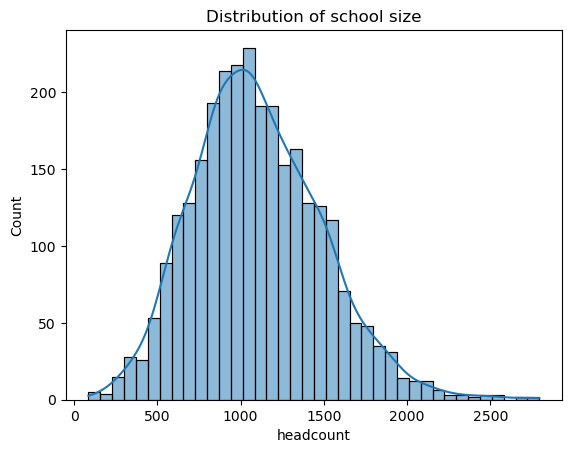

In [81]:
sns.histplot(data['headcount'], kde=True )
plt.title('Distribution of school size');

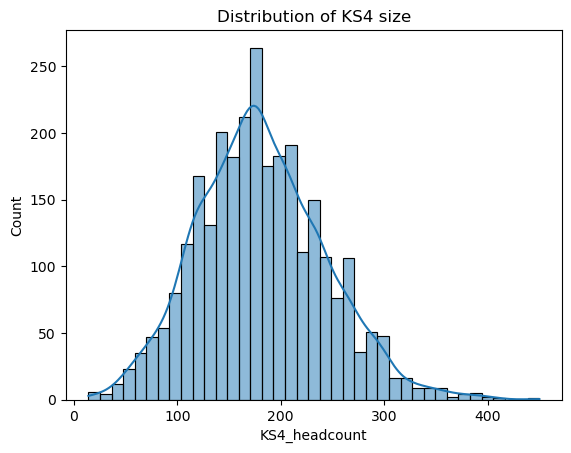

In [82]:
sns.histplot(data['KS4_headcount'], kde=True )
plt.title('Distribution of KS4 size');

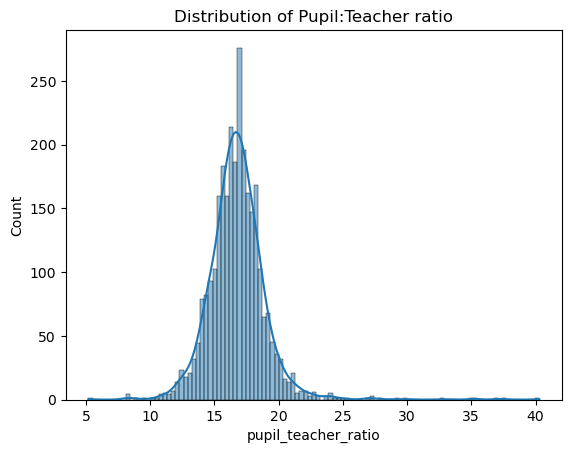

In [83]:
sns.histplot(data['pupil_teacher_ratio'], kde=True )
plt.title('Distribution of Pupil:Teacher ratio');

### School sex

In [84]:
data['school_sex'].unique()

array(['Mixed', 'Girls', 'Boys'], dtype=object)

In [85]:
data['single_sex_binary'] = data['school_sex']

In [86]:
data['single_sex_binary'].replace('Girls', 1, inplace=True)
data['single_sex_binary'].replace('Boys', 1, inplace=True)
data['single_sex_binary'].replace('Mixed', 0, inplace=True)

### Performance indicators

In [87]:
sns.catplot(data['Ofsted_rating'], kind='count');

#### Ofsted rating

In [88]:
data['Ofsted_rating'] = data['Ofsted_rating'].astype(str)
np.unique(data['Ofsted_rating'])

array(['Good', 'Outstanding', 'Requires improvement',
       'Serious Weaknesses', 'Special Measures'], dtype=object)

In [89]:
data['Ofsted_rating'].replace('Serious Weaknesses', 'Inadequate', inplace=True)
data['Ofsted_rating'].replace('Special Measures', 'Inadequate', inplace=True)

In [90]:
# convert to category type
from pandas.api.types import CategoricalDtype

ofsted_cats = CategoricalDtype(categories=['Outstanding', 'Good', 'Requires improvement', 'Inadequate'], ordered=True)
data['Ofsted_rating'] = data['Ofsted_rating'].astype(ofsted_cats)

In [91]:
data.groupby('Ofsted_rating').size()

/var/folders/fp/_jk7rzqj00756q1bhvwhswcw0000gp/T/ipykernel_61798/3787143538.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('Ofsted_rating').size()


Ofsted_rating
Outstanding              423
Good                    1962
Requires improvement     383
Inadequate                76
dtype: int64

#### Attainment

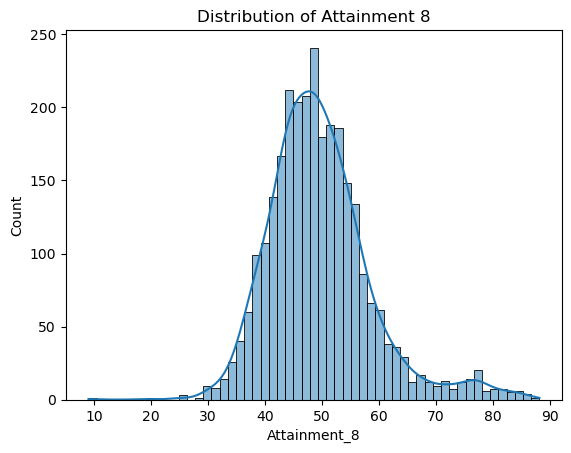

In [92]:
sns.histplot(data['Attainment_8'], kde=True )
plt.title('Distribution of Attainment 8');

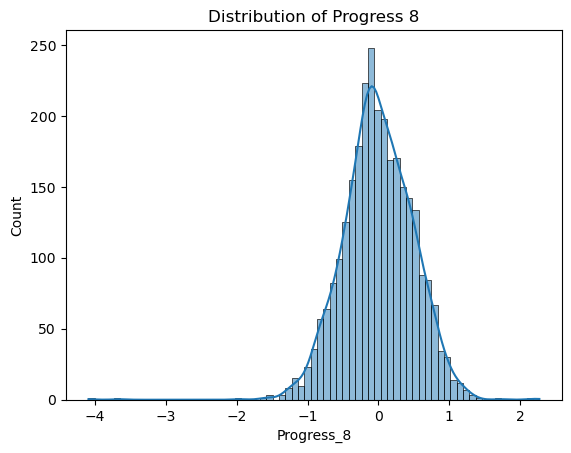

In [93]:
sns.histplot(data['Progress_8'], kde=True )
plt.title('Distribution of Progress 8');

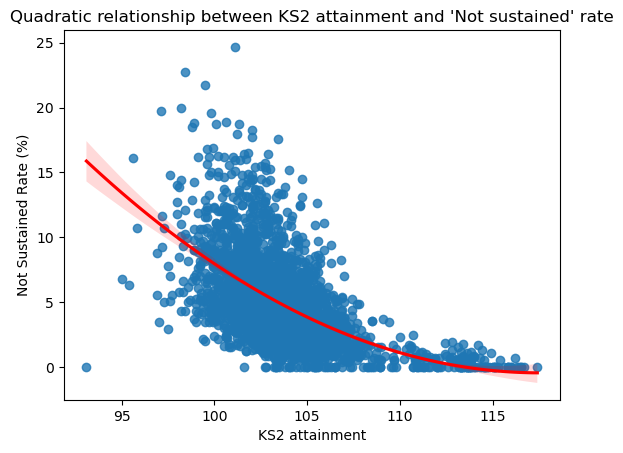

In [94]:
sns.regplot(data=data, x='KS2_history', y='not_sustained_rate',
           order=2, line_kws={"color": "red"})

plt.xlabel("KS2 attainment")  
plt.ylabel("Not Sustained Rate (%)")

plt.title("Quadratic relationship between KS2 attainment and 'Not sustained' rate");

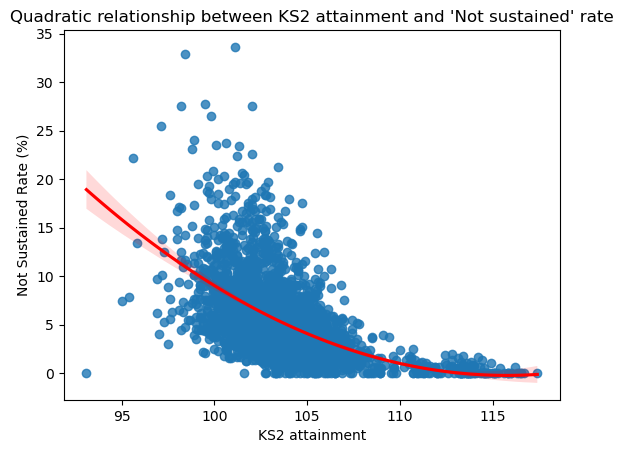

In [95]:
sns.regplot(data=data, x='KS2_history', y='not_sustained_rate_overalldest',
           order=2, line_kws={"color": "red"})

plt.xlabel("KS2 attainment")  
plt.ylabel("Not Sustained Rate (%)")

plt.title("Quadratic relationship between KS2 attainment and 'Not sustained' rate");

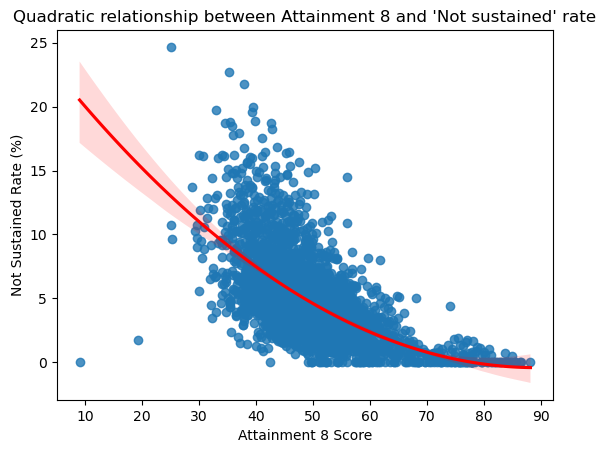

In [96]:
sns.regplot(data=data, x='Attainment_8', y='not_sustained_rate',
           order=2, line_kws={"color": "red"})

plt.xlabel("Attainment 8 Score")  
plt.ylabel("Not Sustained Rate (%)")

plt.title("Quadratic relationship between Attainment 8 and 'Not sustained' rate");

In [97]:
sns.regplot(data=data, x='Attainment_8', y='not_sustained_rate_overalldest',
           order=2, line_kws={"color": "red"})

plt.xlabel("Attainment 8 Score")  
plt.ylabel("Not Sustained Rate (%)")

plt.title("Quadratic relationship between Attainment 8 and 'Not sustained' rate");

### Other school characteristics

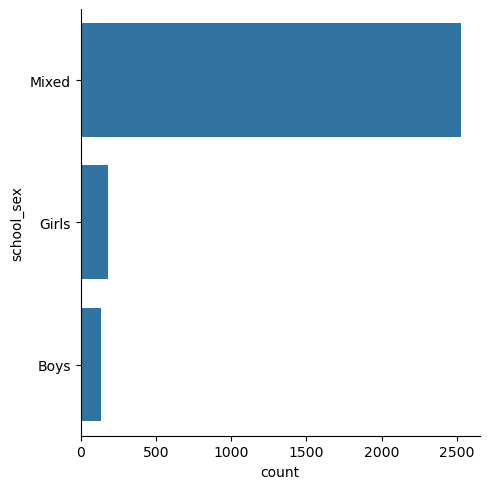

In [98]:
sns.catplot(data['school_sex'], kind='count');

In [99]:
data.groupby('single_sex_binary').size()

single_sex_binary
0    2526
1     318
dtype: int64

In [100]:
data.groupby('post16').size()

post16
0    1054
1    1790
dtype: int64

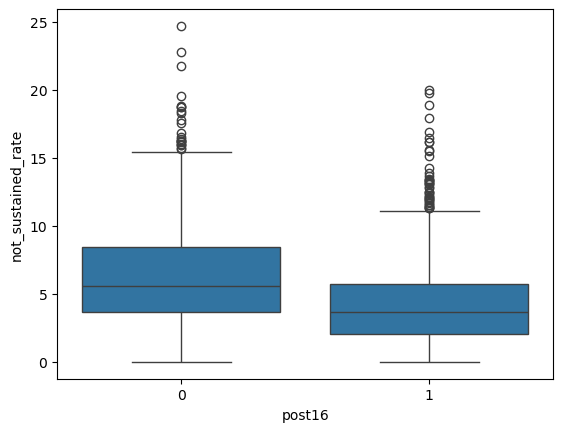

In [101]:
sns.boxplot(data=data, x='post16', y='not_sustained_rate');

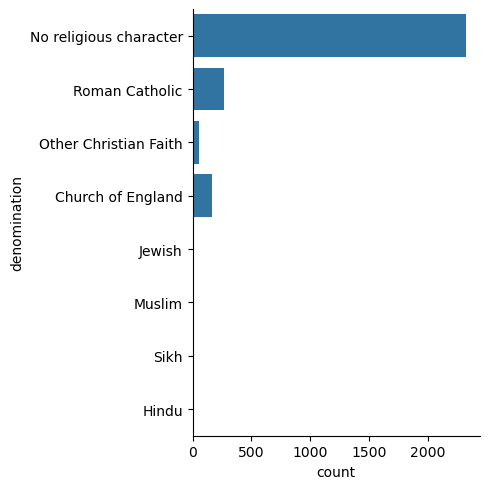

In [102]:
sns.catplot(data['denomination'], kind='count');

In [103]:
denomination_mean_neet = data.groupby('denomination')['not_sustained_rate'].mean().sort_values().index

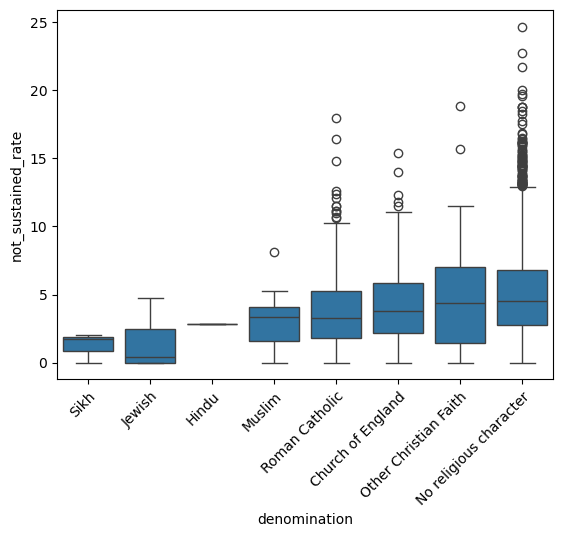

In [104]:
sns.boxplot(data=data, x='denomination', y='not_sustained_rate', order=denomination_mean_neet)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

In [105]:
data['denomination'].replace('Church of England', 'Christian', inplace=True)
data['denomination'].replace('Hindu', 'Other faith', inplace=True)
data['denomination'].replace('Jewish', 'Other faith', inplace=True)
data['denomination'].replace('Multi-faith', 'No faith', inplace=True)
data['denomination'].replace('Muslim', 'Other faith', inplace=True)
data['denomination'].replace('No religious character', 'No faith', inplace=True)
data['denomination'].replace('Other Anglican Faith', 'Christian', inplace=True)
data['denomination'].replace('Other Christian Faith', 'Christian', inplace=True)
data['denomination'].replace('Roman Catholic', 'Christian', inplace=True)
data['denomination'].replace('Sikh', 'Other faith', inplace=True)

In [106]:
data.groupby('denomination').size()

denomination
Christian       488
No faith       2327
Other faith      29
dtype: int64

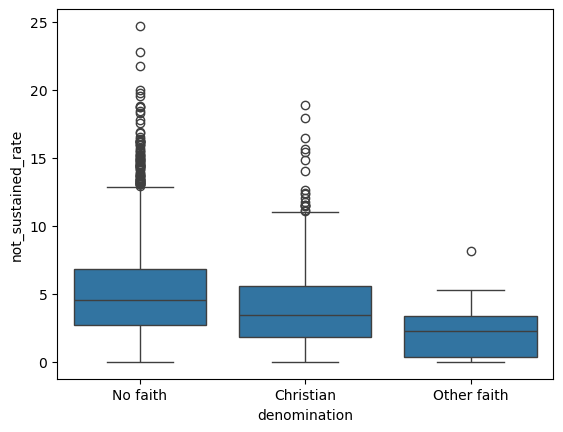

In [107]:
sns.boxplot(data=data, x='denomination', y='not_sustained_rate');

In [108]:
data['faith_binary'] = data['denomination']

In [109]:
data['faith_binary'].replace('No faith', 0, inplace=True)
data['faith_binary'].replace('Christian', 1, inplace=True)
data['faith_binary'].replace('Other faith', 1, inplace=True)

In [110]:
data.groupby('faith_binary').size()

faith_binary
0    2327
1     517
dtype: int64

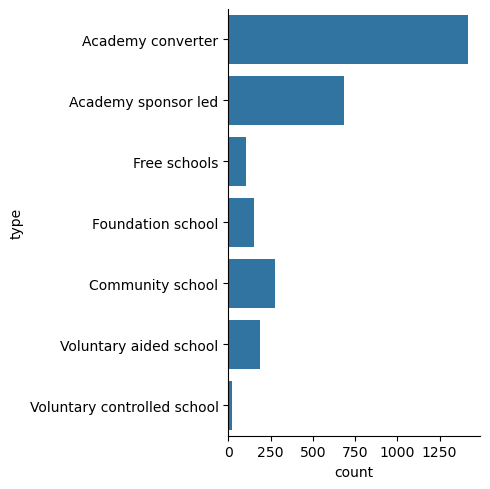

In [111]:
sns.catplot(data['type'], kind='count');

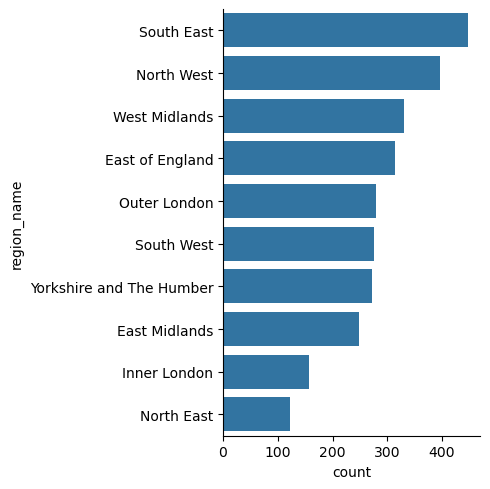

In [112]:
sns.catplot(data['region_name'], 
            kind = 'count', 
            order = data['region_name'].value_counts().index);

In [113]:
region_mean_neet = data.groupby('region_name')['not_sustained_rate'].mean().sort_values().index

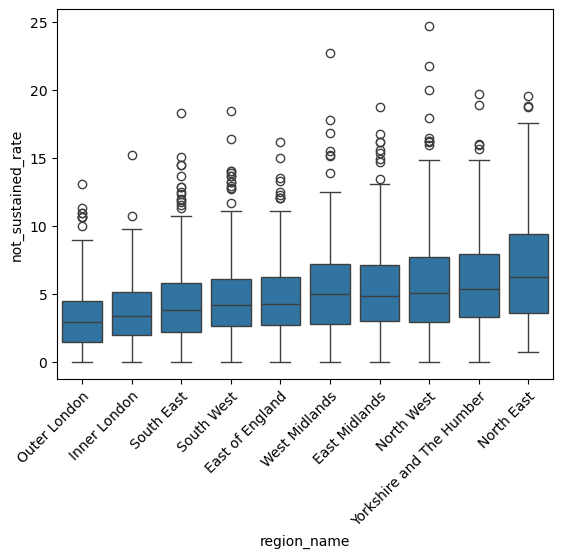

In [114]:
sns.boxplot(data=data, x='region_name', y='not_sustained_rate', order=region_mean_neet)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

In [115]:
# new column for region
data['region_new'] = data['region_name']

data['region_new'].replace('Outer London', 'London', inplace=True)
data['region_new'].replace('Inner London', 'London', inplace=True)

data['region_new'].replace('South East', 'South', inplace=True)
data['region_new'].replace('South West', 'South', inplace=True)
data['region_new'].replace('East of England', 'South', inplace=True)

data['region_new'].replace('East Midlands', 'Midlands', inplace=True)
data['region_new'].replace('West Midlands', 'Midlands', inplace=True)

data['region_new'].replace('Yorkshire and The Humber', 'North', inplace=True)
data['region_new'].replace('North West', 'North', inplace=True)
data['region_new'].replace('North East', 'North', inplace=True)

In [116]:
data.groupby('region_new').size()

region_new
London       437
Midlands     579
North        792
South       1036
dtype: int64

In [117]:
ordered_regions = data.groupby('region_new')['not_sustained_rate'].median().sort_values().index

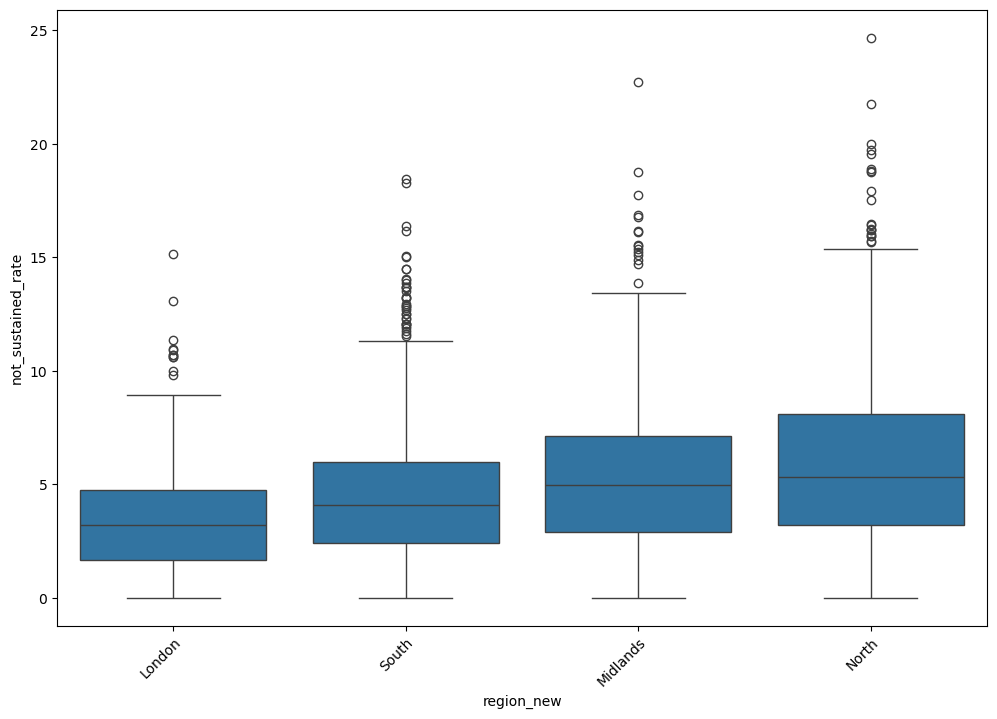

In [118]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='region_new', y='not_sustained_rate', order=ordered_regions)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

Reduced collinearity with IMD - variation in IMD across regions reduced. 

In [119]:
data.groupby('IMD').size()

IMD
1.000000     223
2.000000     270
3.000000     299
4.000000     306
5.000000     270
6.000000     282
7.000000     294
8.000000     294
9.000000     324
10.000000    282
dtype: int64

In [120]:
region_means = data.groupby('region_name')['IMD'].mean()
print(region_means)

region_name
East Midlands              5.883065
East of England            6.455414
Inner London               4.025478
North East                 4.934959
North West                 5.060453
Outer London               5.753571
South East                 6.749441
South West                 6.061818
West Midlands              4.960725
Yorkshire and The Humber   5.150735
Name: IMD, dtype: float64


In [121]:
new_region_means = data.groupby('region_new')['IMD'].mean()
print(new_region_means)

region_new
London     5.132723
Midlands   5.355786
North      5.071970
South      6.477799
Name: IMD, dtype: float64


In [122]:
data['urban_rural'] = data['urban_rural'].astype(str)
np.unique(data['urban_rural'])

array(['(England/Wales) Rural hamlet and isolated dwellings',
       '(England/Wales) Rural hamlet and isolated dwellings in a sparse setting',
       '(England/Wales) Rural town and fringe',
       '(England/Wales) Rural town and fringe in a sparse setting',
       '(England/Wales) Rural village',
       '(England/Wales) Rural village in a sparse setting',
       '(England/Wales) Urban city and town',
       '(England/Wales) Urban city and town in a sparse setting',
       '(England/Wales) Urban major conurbation',
       '(England/Wales) Urban minor conurbation'], dtype=object)

In [123]:
data['urban_rural'].replace('(England/Wales) Urban major conurbation', 'Urban major conurbation', inplace=True)
data['urban_rural'].replace('(England/Wales) Urban minor conurbation', 'Urban minor conurbation', inplace=True)
data['urban_rural'].replace('(England/Wales) Urban city and town', 'Urban city and town', inplace=True)
data['urban_rural'].replace('(England/Wales) Urban city and town in a sparse setting', 'Urban city and town in a sparse setting', inplace=True)
data['urban_rural'].replace('(England/Wales) Rural town and fringe', 'Rural town and fringe', inplace=True)
data['urban_rural'].replace('(England/Wales) Rural town and fringe in a sparse setting', 'Rural town and fringe in a sparse setting', inplace=True)
data['urban_rural'].replace('(England/Wales) Rural village', 'Rural village', inplace=True)
data['urban_rural'].replace('(England/Wales) Rural village in a sparse setting', 'Rural village in a sparse setting', inplace=True)
data['urban_rural'].replace('(England/Wales) Rural hamlet and isolated dwellings', 'Rural hamlet and isolated dwellings', inplace=True)
data['urban_rural'].replace('(England/Wales) Rural hamlet and isolated dwellings in a sparse setting', 'Rural hamlet and isolated dwellings in a sparse setting', inplace=True)

In [124]:
urban_rural_cats = CategoricalDtype(categories=['Urban major conurbation', 
                                                'Urban minor conurbation', 
                                                'Urban city and town', 
                                                'Urban city and town in a sparse setting', 
                                                'Rural town and fringe',
                                                'Rural town and fringe in a sparse setting',
                                                'Rural village',
                                                'Rural village in a sparse setting',
                                                'Rural hamlet and isolated dwellings',
                                                'Rural hamlet and isolated dwellings in a sparse setting'
                                               ], 
                                    ordered=True)
data['urban_rural'] = data['urban_rural'].astype(urban_rural_cats)

In [125]:
data.groupby('urban_rural').size()

/var/folders/fp/_jk7rzqj00756q1bhvwhswcw0000gp/T/ipykernel_61798/1274345496.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('urban_rural').size()


urban_rural
Urban major conurbation                                    1017
Urban minor conurbation                                     100
Urban city and town                                        1313
Urban city and town in a sparse setting                       8
Rural town and fringe                                       279
Rural town and fringe in a sparse setting                    29
Rural village                                                52
Rural village in a sparse setting                             4
Rural hamlet and isolated dwellings                          40
Rural hamlet and isolated dwellings in a sparse setting       2
dtype: int64

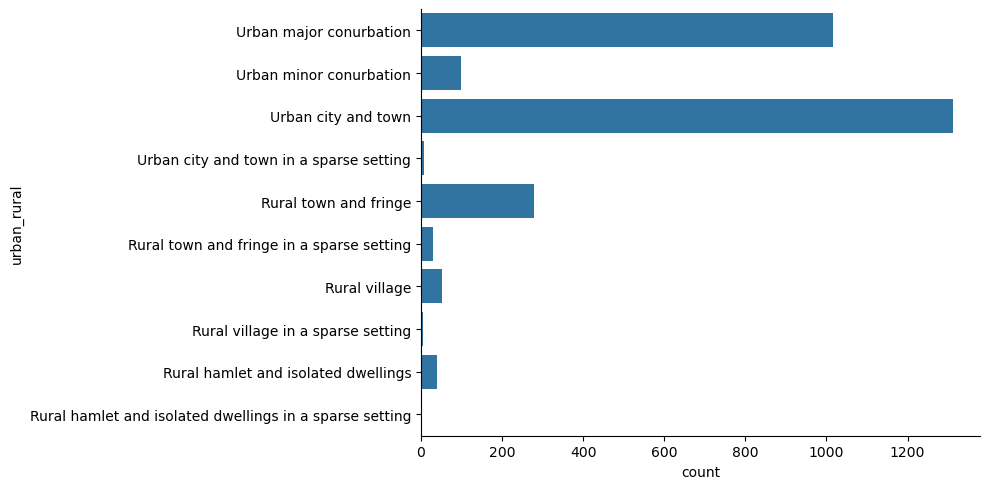

In [126]:
g = sns.catplot(data['urban_rural'], kind='count', height=5, aspect=2);

In [127]:
urban_rural_mean_neet = data.groupby('urban_rural')['not_sustained_rate'].mean().sort_values().index

/var/folders/fp/_jk7rzqj00756q1bhvwhswcw0000gp/T/ipykernel_61798/3792850642.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  urban_rural_mean_neet = data.groupby('urban_rural')['not_sustained_rate'].mean().sort_values().index


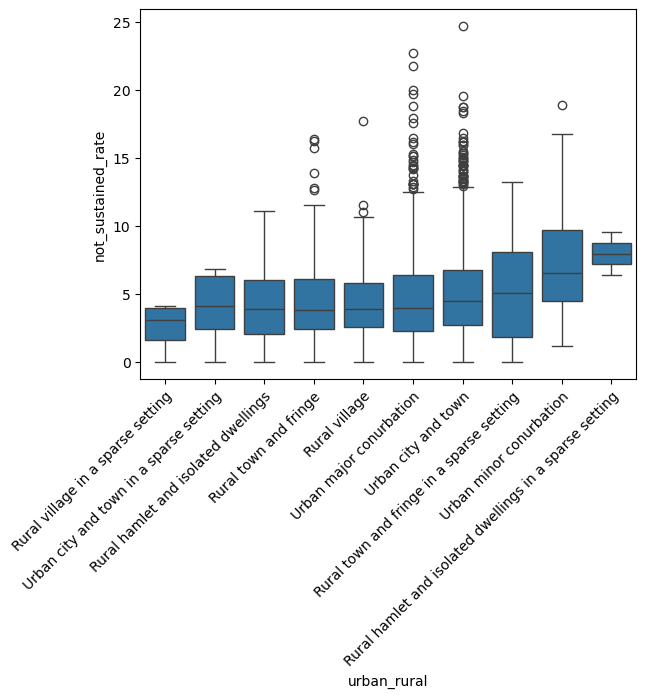

In [128]:
sns.boxplot(data=data, x='urban_rural', y='not_sustained_rate', order=urban_rural_mean_neet)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

In [129]:
# new column for binary urban status
data['urban_binary'] = data['urban_rural']

In [130]:
# replace labels with numbers
data['urban_binary'].replace('Urban major conurbation', 1, inplace=True)
data['urban_binary'].replace('Urban minor conurbation', 1, inplace=True)
data['urban_binary'].replace('Urban city and town', 1, inplace=True)
data['urban_binary'].replace('Urban city and town in a sparse setting', 1, inplace=True)
data['urban_binary'].replace('Rural town and fringe', 0, inplace=True)
data['urban_binary'].replace('Rural town and fringe in a sparse setting', 0, inplace=True)
data['urban_binary'].replace('Rural village', 0, inplace=True)
data['urban_binary'].replace('Rural village in a sparse setting', 0, inplace=True)
data['urban_binary'].replace('Rural hamlet and isolated dwellings', 0, inplace=True)
data['urban_binary'].replace('Rural hamlet and isolated dwellings in a sparse setting', 0, inplace=True)

In [131]:
data.groupby('urban_binary').size()

/var/folders/fp/_jk7rzqj00756q1bhvwhswcw0000gp/T/ipykernel_61798/419234468.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('urban_binary').size()


urban_binary
1    2438
0     406
dtype: int64

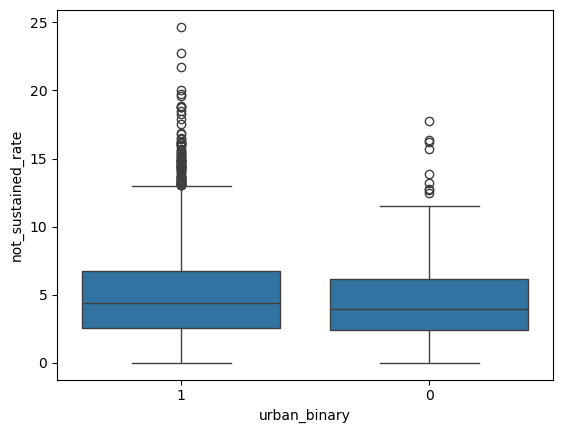

In [132]:
sns.boxplot(data=data, x='urban_binary', y='not_sustained_rate');

### Pupil characteristics

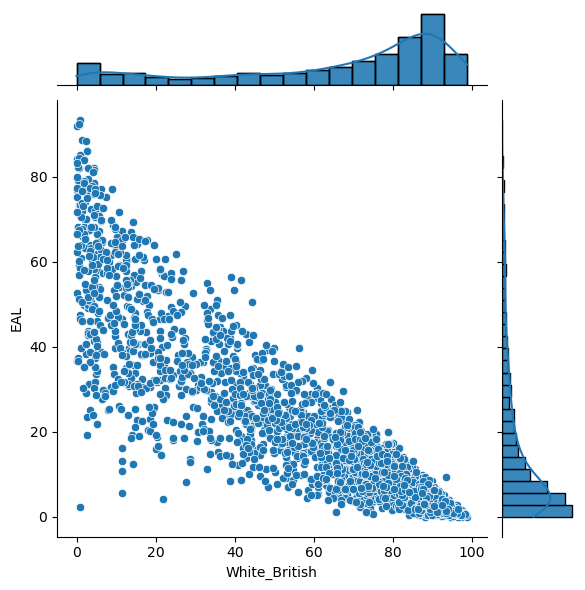

In [133]:
g = sns.jointplot(data=data, x='White_British', y='EAL')
g.plot_marginals(sns.histplot, kde=True);

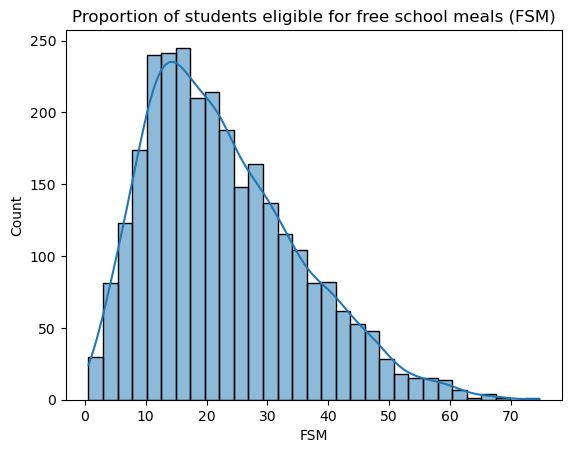

In [134]:
sns.histplot(data['FSM'], kde=True )
plt.title('Proportion of students eligible for free school meals (FSM)');

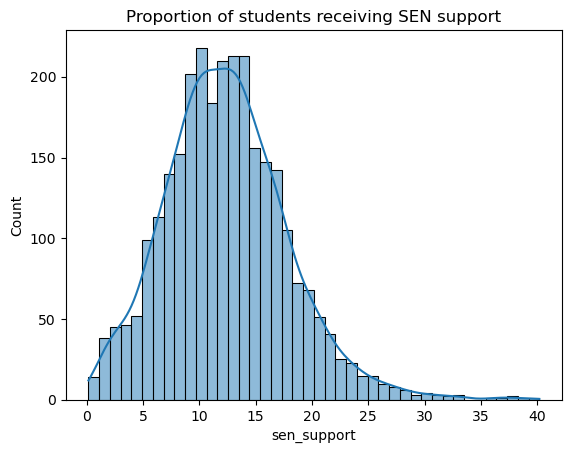

In [135]:
sns.histplot(data['sen_support'], kde=True )
plt.title('Proportion of students receiving SEN support');

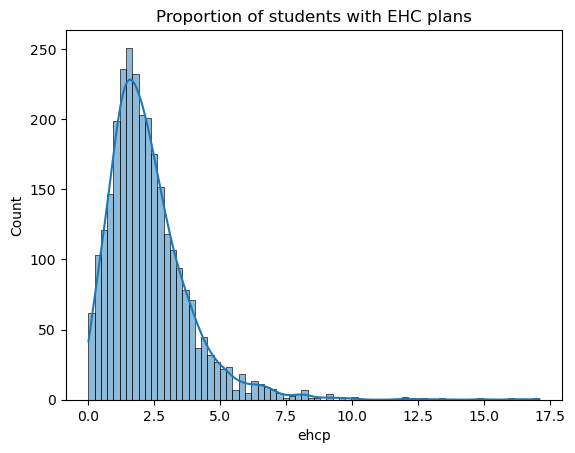

In [136]:
sns.histplot(data['ehcp'], kde=True )
plt.title('Proportion of students with EHC plans');

# Correlations

In [137]:
from copy import copy
from scipy.stats import kendalltau

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2844 entries, 1 to 3139
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   URN                             2844 non-null   int64   
 1   not_sustained_rate              2844 non-null   float64 
 2   not_sustained_rate_overalldest  2844 non-null   float64 
 3   total_absence                   2844 non-null   float64 
 4   persistent_absence              2844 non-null   float64 
 5   urban_rural                     2844 non-null   category
 6   denomination                    2844 non-null   object  
 7   FSM                             2844 non-null   float64 
 8   White_British                   2844 non-null   float64 
 9   EAL                             2844 non-null   float64 
 10  perc_boys                       2844 non-null   float64 
 11  region_name                     2844 non-null   object  
 12  school_name              

In [139]:
data['Ofsted_num'] = data['Ofsted_rating']
data['Ofsted_num'].replace('Outstanding', 4, inplace=True)
data['Ofsted_num'].replace('Good', 3, inplace=True)
data['Ofsted_num'].replace('Requires improvement', 2, inplace=True)
data['Ofsted_num'].replace('Inadequate', 1, inplace=True)

In [140]:
# convert to category 
data['denomination'] = pd.Categorical(data['denomination'])
data['school_sex'] = pd.Categorical(data['school_sex'])
data['type'] = pd.Categorical(data['type'])
data['region_new'] = pd.Categorical(data['region_new'])

# convert to int
data['urban_binary'] = data['urban_binary'].astype(int)

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2844 entries, 1 to 3139
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   URN                             2844 non-null   int64   
 1   not_sustained_rate              2844 non-null   float64 
 2   not_sustained_rate_overalldest  2844 non-null   float64 
 3   total_absence                   2844 non-null   float64 
 4   persistent_absence              2844 non-null   float64 
 5   urban_rural                     2844 non-null   category
 6   denomination                    2844 non-null   category
 7   FSM                             2844 non-null   float64 
 8   White_British                   2844 non-null   float64 
 9   EAL                             2844 non-null   float64 
 10  perc_boys                       2844 non-null   float64 
 11  region_name                     2844 non-null   object  
 12  school_name              

In [142]:
vars_for_corr = data[['not_sustained_rate', 'not_sustained_rate_overalldest',
                      'absence_rate_non_excl', 'persistent_absence', 
                      'perm_excl_rate', 'susp_rate', 'one_plus_susp_rate', 
                      'FSM', 'White_British', 'EAL', 'perc_boys', 'sen_support', 'ehcp', 
                      'headcount', 'KS4_headcount', 
                      'pupil_teacher_ratio', 'assistant_teacher_ratio', 
                      'Ofsted_num',
                      'KS2_history', 'KS4_pass_rate', 'Attainment_8', 'Progress_8', 
                      'selective', 'post16',
                      'IMD', 'urban_binary', 'single_sex_binary', 'faith_binary']]

In [143]:
vars_for_corr.columns

Index(['not_sustained_rate', 'not_sustained_rate_overalldest',
       'absence_rate_non_excl', 'persistent_absence', 'perm_excl_rate',
       'susp_rate', 'one_plus_susp_rate', 'FSM', 'White_British', 'EAL',
       'perc_boys', 'sen_support', 'ehcp', 'headcount', 'KS4_headcount',
       'pupil_teacher_ratio', 'assistant_teacher_ratio', 'Ofsted_num',
       'KS2_history', 'KS4_pass_rate', 'Attainment_8', 'Progress_8',
       'selective', 'post16', 'IMD', 'urban_binary', 'single_sex_binary',
       'faith_binary'],
      dtype='object')

In [144]:
corr_names = {
    'not_sustained_rate': 'Not sustained %',
    'not_sustained_rate_overalldest' : 'Not sustained % of known destinations',
    'absence_rate_non_excl': 'Absence %', 
    'persistent_absence': 'Persistent absence %',
    'perm_excl_rate': 'Permanent exclusion %', 
    'susp_rate': 'Suspension %', 
    'one_plus_susp_rate': 'One-plus suspension %', 
    'FSM': 'FSM %',
    'White_British': 'White British %', 
    'EAL': 'EAL %', 
    'perc_boys': 'Boys %', 
    'sen_support': 'SEN support %', 
    'ehcp': 'EHCP %', 
    'headcount': 'School headcount',
    'KS4_headcount': 'KS4 headcount', 
    'pupil_teacher_ratio': 'Pupil:Teacher ratio', 
    'assistant_teacher_ratio': 'Assistant:Teacher ratio',
    'Ofsted_num': 'Ofsted rating',
    'KS2_history': 'KS2 history', 
    'KS4_pass_rate': 'KS4 pass %', 
    'Attainment_8': 'A8', 
    'Progress_8': 'P8',
    'selective': 'Selective schools', 
    'post16': 'Post-16', 
    'IMD': 'IMD of LSOA', 
    'urban_binary': 'Urban schools', 
    'single_sex_binary': 'Single sex schools',
    'faith_binary': 'Faith schools'
}

In [145]:
vars_for_corr = vars_for_corr.rename(columns=corr_names)

In [146]:
# save variables for correlation matrix
corr = vars_for_corr.corr(method='kendall')

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
np.fill_diagonal(mask, False)

##### Positive correlations

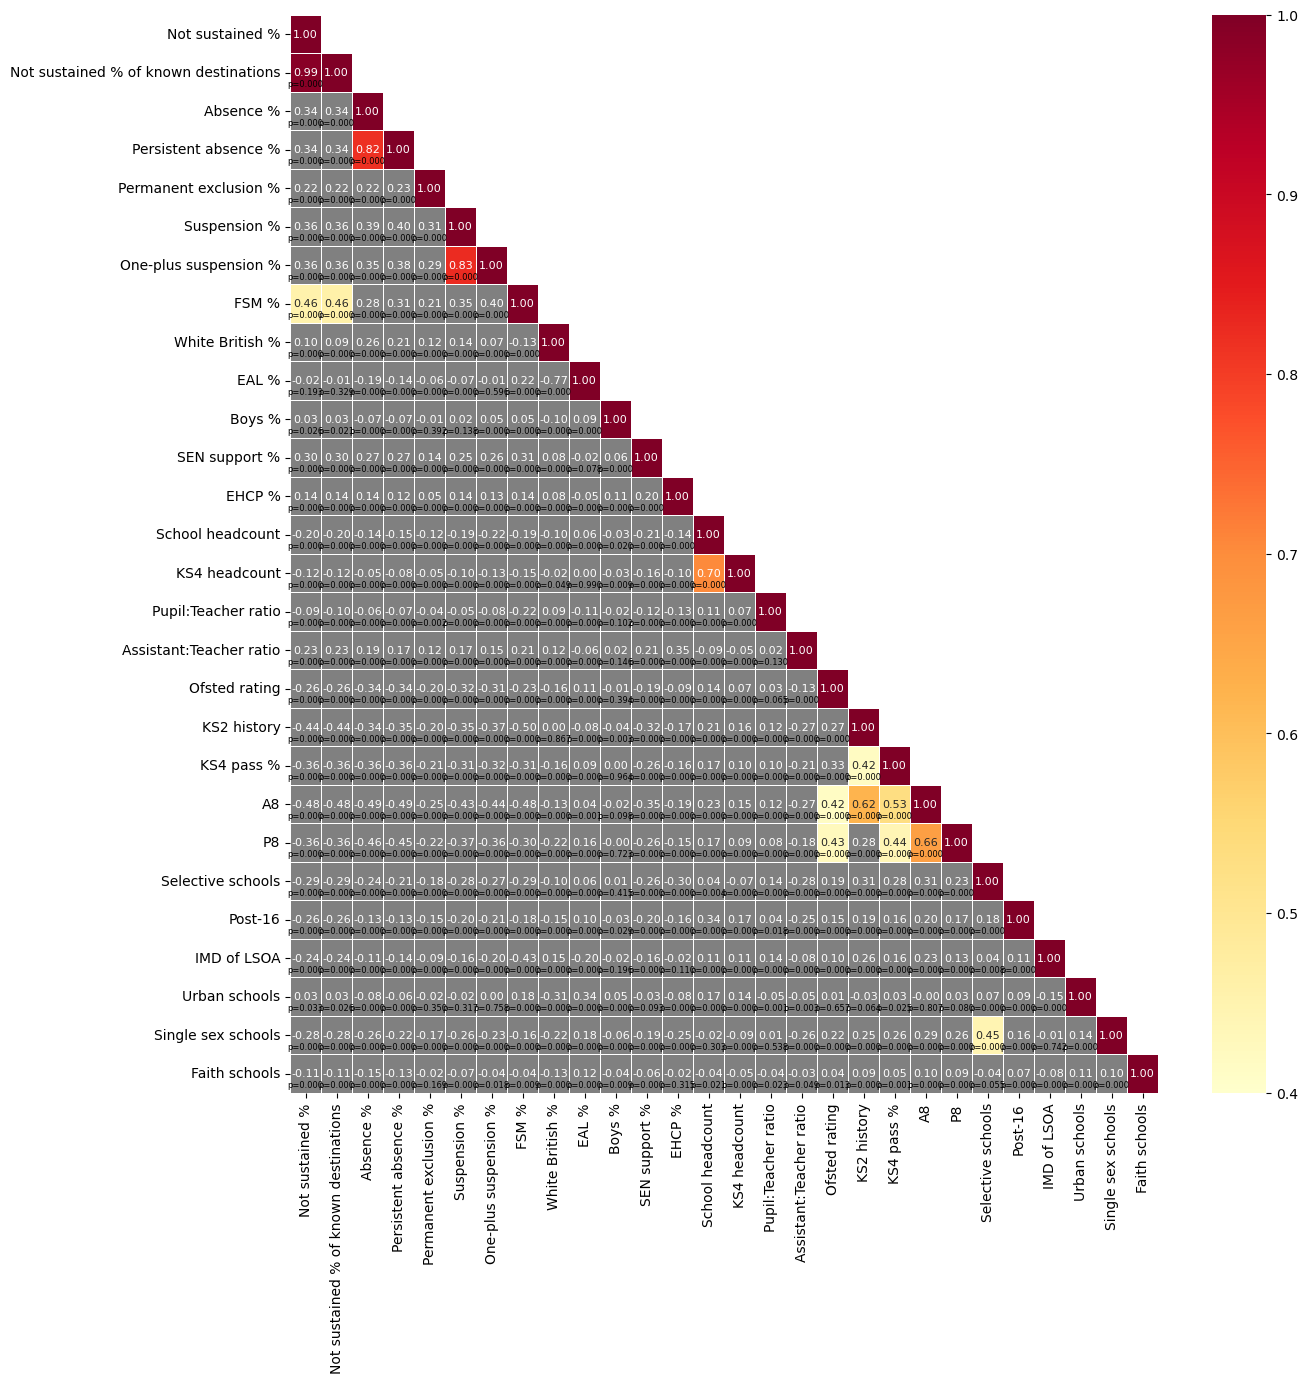

In [147]:
# set colour map for pos 
my_cmap = copy(plt.cm.YlOrRd)
my_cmap.set_over("grey")
my_cmap.set_under("grey")

# positive correlations
f, ax = plt.subplots(figsize=(14,14)) 

g = sns.heatmap(corr,
    vmin=0.4,
    vmax=1,
    cmap=my_cmap,
    linewidths=0.5,
    #linecolor="grey",
    annot = True,
    annot_kws={"fontsize": 8},
    fmt = '.2f',
    ax=ax,
    mask=mask)

# calculate p-values
p_values = np.full((corr.shape[0], corr.shape[1]), np.nan)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[1]):
        x = vars_for_corr.iloc[:, i]
        y = vars_for_corr.iloc[:, j]
        p_values[i, j] = kendalltau(x, y)[1]

p_values = pd.DataFrame(p_values, columns=corr.columns, index=corr.index)

max_corr = np.max(corr.max())
min_corr = np.min(corr.min())

for i in range (p_values.shape[0]):
    for j in range(p_values.shape[1]):
        p_value = p_values.iloc[i, j]
        if not np.isnan(p_value):
            correlation_value = corr.iloc[i, j]
            text_color = 'black' if p_value >= 0.001 else 'black'
            ax.text(i+0.5, j+0.8, f'p={p_value:.3f}',
                    horizontalalignment = 'center',
                    verticalalignment = 'center',
                    fontsize = 6,
                    color = text_color)


## Negative correlations

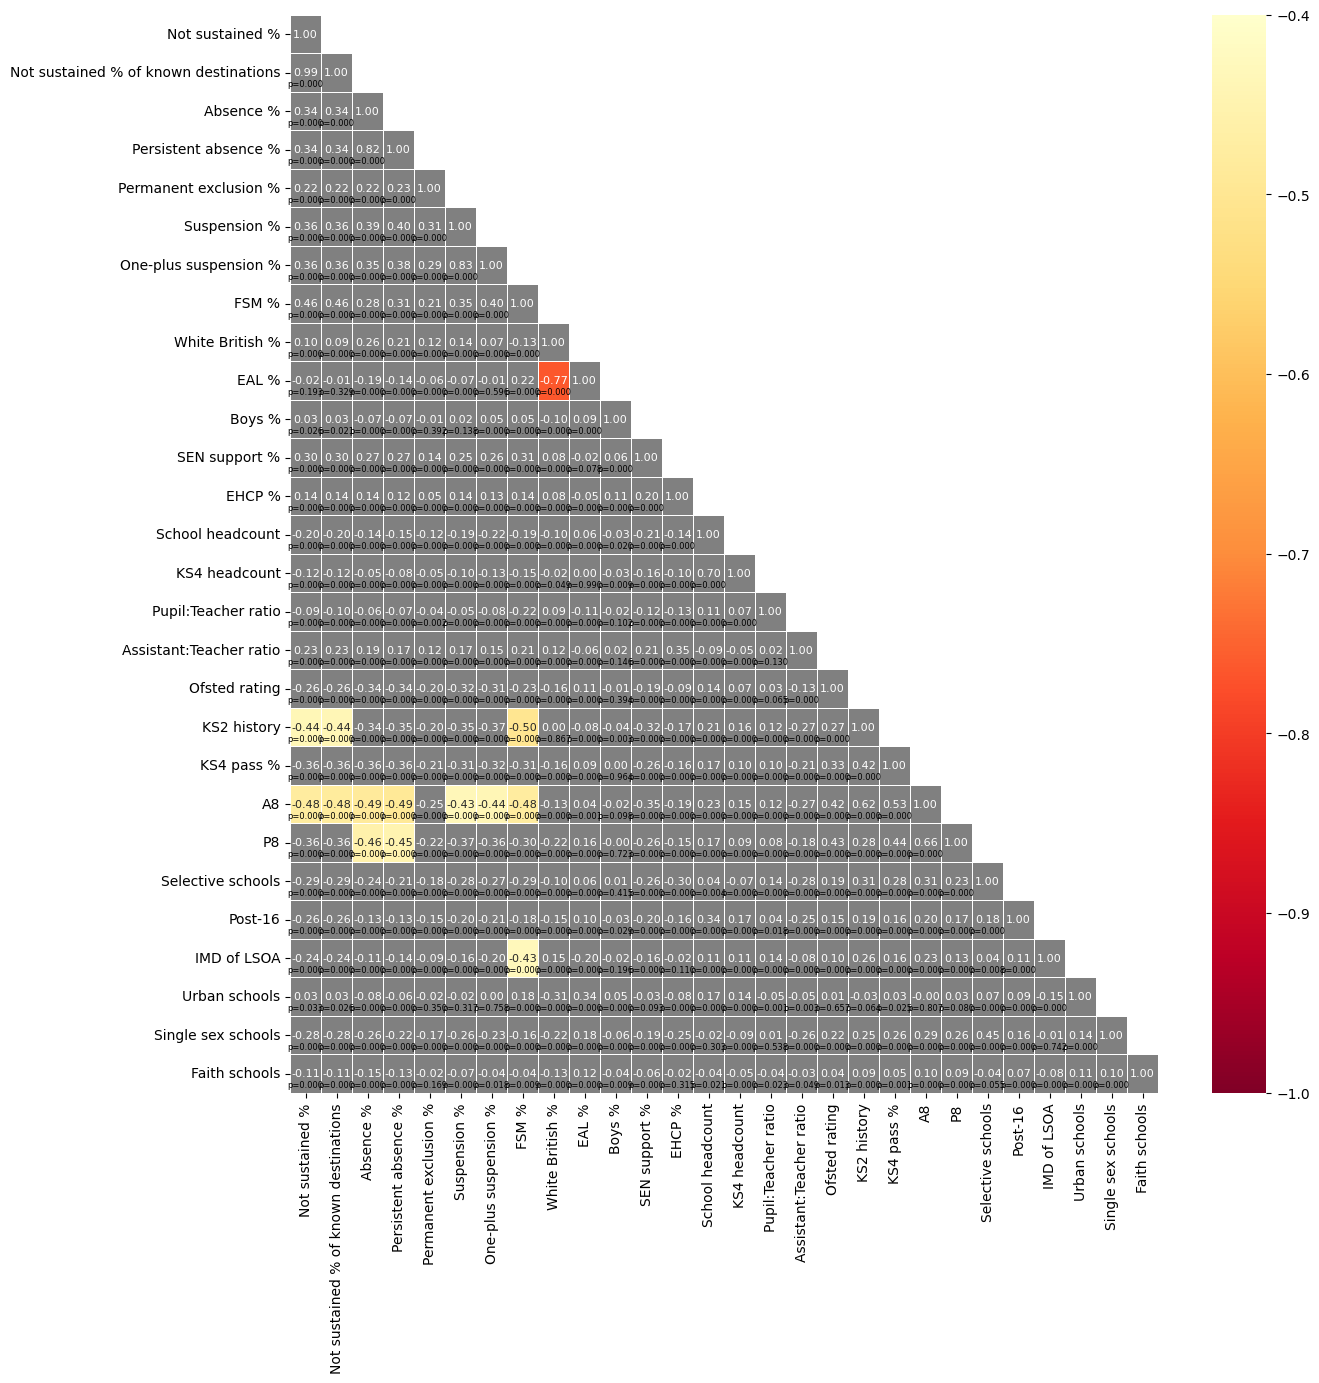

In [148]:
# set colour map for neg 
my_cmap_r = copy(plt.cm.YlOrRd_r)
my_cmap_r.set_over("grey")
my_cmap_r.set_under("grey")

# negative correlations
f, ax = plt.subplots(figsize=(14,14)) 

g = sns.heatmap(corr,
    vmin=-1,
    vmax=-0.4,
    cmap=my_cmap_r,
    linewidths=0.5,
    #linecolor="grey",
    annot = True,
    annot_kws={"fontsize": 8},
    fmt = '.2f',
    ax=ax,
    mask=mask)

# calculate p-values
p_values = np.full((corr.shape[0], corr.shape[1]), np.nan)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[1]):
        x = vars_for_corr.iloc[:, i]
        y = vars_for_corr.iloc[:, j]
        p_values[i, j] = kendalltau(x, y)[1]

p_values = pd.DataFrame(p_values, columns=corr.columns, index=corr.index)

max_corr = np.max(corr.max())
min_corr = np.min(corr.min())

for i in range (p_values.shape[0]):
    for j in range(p_values.shape[1]):
        p_value = p_values.iloc[i, j]
        if not np.isnan(p_value):
            correlation_value = corr.iloc[i, j]
            text_color = 'black' if p_value >= 0.001 else 'black'
            ax.text(i+0.5, j+0.8, f'p={p_value:.3f}',
                    horizontalalignment = 'center',
                    verticalalignment = 'center',
                    fontsize = 6,
                    color = text_color)

# Regression Models

In [149]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import PowerTransformer, OrdinalEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf

In [150]:
ord_transformer = OrdinalEncoder()

In [151]:
data[['Ofsted_rating']] = ord_transformer.fit_transform(data[['Ofsted_rating']])

In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2844 entries, 1 to 3139
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   URN                             2844 non-null   int64   
 1   not_sustained_rate              2844 non-null   float64 
 2   not_sustained_rate_overalldest  2844 non-null   float64 
 3   total_absence                   2844 non-null   float64 
 4   persistent_absence              2844 non-null   float64 
 5   urban_rural                     2844 non-null   category
 6   denomination                    2844 non-null   category
 7   FSM                             2844 non-null   float64 
 8   White_British                   2844 non-null   float64 
 9   EAL                             2844 non-null   float64 
 10  perc_boys                       2844 non-null   float64 
 11  region_name                     2844 non-null   object  
 12  school_name              

### Specify variables

In [547]:
predictors = data[[
'headcount',
'pupil_teacher_ratio',
'assistant_teacher_ratio',
'susp_rate',
'Progress_8',
'post16',
'Ofsted_rating',
'faith_binary',
'single_sex_binary',
]]

In [548]:
controls = data[[
'Attainment_8',
'absence_rate_non_excl',
'selective', 
'perc_boys',
'FSM',
'sen_support',
'White_British',
'KS2_history',
'IMD',
'urban_binary' 
]]

In [549]:
predictors_controls = data[[
'headcount',
'pupil_teacher_ratio',
'assistant_teacher_ratio',
'susp_rate',
'Progress_8',
'post16',
'Ofsted_rating',
'faith_binary',
'single_sex_binary',

# controls
'Attainment_8',
'absence_rate_non_excl',
'selective', 
'perc_boys',
'FSM',
'sen_support',
'White_British',
'KS2_history',
'IMD',
'urban_binary' 
]]

# Model 1 - OLS - IGNORE

### individual effects

In [575]:
# extract R-squared for each predictor model
individual_r2 = {}

for p in predictors_controls:
    x = data[p]
    y = data['not_sustained_rate']

    model = sm.OLS(y, x).fit()

    individual_r2[p] = model.rsquared
    

In [576]:
# round to 3 dec
individual_r2 = {predictor: round(r2, 3) for predictor, r2 in individual_r2.items()}
individual_r2

{'headcount': 0.528,
 'pupil_teacher_ratio': 0.661,
 'assistant_teacher_ratio': 0.643,
 'susp_rate': 0.535,
 'Progress_8': 0.089,
 'post16': 0.293,
 'Ofsted_rating': 0.188,
 'faith_binary': 0.086,
 'single_sex_binary': 0.013,
 'Attainment_8': 0.55,
 'absence_rate_non_excl': 0.769,
 'selective': 0.001,
 'perc_boys': 0.637,
 'FSM': 0.8,
 'sen_support': 0.734,
 'White_British': 0.613,
 'KS2_history': 0.666,
 'IMD': 0.422,
 'urban_binary': 0.601}

### predictors

In [577]:
x = sm.add_constant(predictors)

In [578]:
y = data['not_sustained_rate']

In [579]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     not_sustained_rate   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     225.9
Date:                Fri, 28 Feb 2025   Prob (F-statistic):               0.00
Time:                        12:40:07   Log-Likelihood:                -7304.6
No. Observations:                2972   AIC:                         1.463e+04
Df Residuals:                    2962   BIC:                         1.469e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       8.2141      0.425     19.337      0.000       7.381       9.047
headcount                  -0.0010      0.000     -6.516      0.000      -0.001      -0.001
pupil_teacher_ratio        -0.1347      0.023     -5.861      0.000      -0.180      -0.090
assistant_teacher_ratio     2.4224      0.463      5.234      0.000       1.515       3.330
susp_rate                   0.0391      0.002     16.044      0.000       0.034       0.044
Progress_8                 -2.1030      0.125    -16.827      0.000      -2.348      -1.858
post16                     -0.8826      0.123     -7.167      0.000      -1.124      -0.641
Ofsted_rating              -0.0504      0.047     -1.077      0.282      -0.142       0.041
faith_binary               -0.4653      0.136     -3.410      0.001      -0.733      -0.198
single_sex_binary          -1.2354      0.183     -6.745      0.000      -1.595      -0.876
==============================================================================
Omnibus:                      419.202   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              862.683
Skew:                           0.854   Prob(JB):                    4.68e-188
Kurtosis:                       5.012   Cond. No.                     1.14e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### predictors - overall dest

In [580]:
x = sm.add_constant(predictors)

In [581]:
y = data['not_sustained_rate_overalldest']

In [582]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     not_sustained_rate_overalldest   R-squared:                       0.393
Model:                                        OLS   Adj. R-squared:                  0.391
Method:                             Least Squares   F-statistic:                     213.2
Date:                            Fri, 28 Feb 2025   Prob (F-statistic):          2.62e-313
Time:                                    12:40:08   Log-Likelihood:                -7893.0
No. Observations:                            2972   AIC:                         1.581e+04
Df Residuals:                                2962   BIC:                         1.587e+04
Df Model:                                       9                                         
Covariance Type:                        nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       9.2657      0.518     17.894      0.000       8.250      10.281
headcount                  -0.0012      0.000     -6.520      0.000      -0.002      -0.001
pupil_teacher_ratio        -0.1601      0.028     -5.718      0.000      -0.215      -0.105
assistant_teacher_ratio     2.7863      0.564      4.939      0.000       1.680       3.892
susp_rate                   0.0488      0.003     16.407      0.000       0.043       0.055
Progress_8                 -2.4652      0.152    -16.183      0.000      -2.764      -2.167
post16                     -1.0164      0.150     -6.772      0.000      -1.311      -0.722
Ofsted_rating              -0.0515      0.057     -0.903      0.366      -0.163       0.060
faith_binary               -0.5323      0.166     -3.200      0.001      -0.859      -0.206
single_sex_binary          -1.2726      0.223     -5.700      0.000      -1.710      -0.835
==============================================================================
Omnibus:                      719.060   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2351.480
Skew:                           1.203   Prob(JB):                         0.00
Kurtosis:                       6.633   Cond. No.                     1.14e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### predictors and controls

In [583]:
x = sm.add_constant(predictors_controls)

In [584]:
y = data['not_sustained_rate']

In [585]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     not_sustained_rate   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     200.3
Date:                Fri, 28 Feb 2025   Prob (F-statistic):               0.00
Time:                        12:40:08   Log-Likelihood:                -6850.3
No. Observations:                2972   AIC:                         1.374e+04
Df Residuals:                    2952   BIC:                         1.386e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      84.6346     10.177      8.317      0.000      64.680     104.589
headcount                  -0.0003      0.000     -1.770      0.077      -0.001    2.75e-05
pupil_teacher_ratio        -0.0101      0.020     -0.494      0.622      -0.050       0.030
assistant_teacher_ratio    -0.0952      0.413     -0.231      0.817      -0.904       0.714
susp_rate                   0.0155      0.002      6.739      0.000       0.011       0.020
Progress_8                 -3.8124      0.616     -6.190      0.000      -5.020      -2.605
post16                     -0.7750      0.108     -7.206      0.000      -0.986      -0.564
Ofsted_rating              -0.0180      0.040     -0.445      0.656      -0.097       0.061
faith_binary               -0.2395      0.123     -1.952      0.051      -0.480       0.001
single_sex_binary          -0.5466      0.177     -3.092      0.002      -0.893      -0.200
Attainment_8                0.3366      0.060      5.626      0.000       0.219       0.454
absence_rate_non_excl       0.1132      0.032      3.532      0.000       0.050       0.176
selective                   0.8411      0.346      2.430      0.015       0.163       1.520
perc_boys                   0.0058      0.003      2.056      0.040       0.000       0.011
FSM                         0.1003      0.007     15.409      0.000       0.088       0.113
sen_support                 0.0239      0.010      2.351      0.019       0.004       0.044
White_British               0.0208      0.002      9.725      0.000       0.017       0.025
KS2_history                -0.9571      0.123     -7.791      0.000      -1.198      -0.716
IMD                        -0.0667      0.020     -3.291      0.001      -0.107      -0.027
urban_binary                0.5597      0.143      3.908      0.000       0.279       0.840
==============================================================================
Omnibus:                      385.218   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              944.292
Skew:                           0.737   Prob(JB):                    8.90e-206
Kurtosis:                       5.335   Cond. No.                     2.71e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [586]:
vif_values = pd.DataFrame()
vif_values['predictor'] = x.columns

vif_values['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif_values = vif_values.sort_values(by='VIF')
vif_values

predictor           VIF
7             Ofsted_rating      1.039184
13                perc_boys      1.087237
2       pupil_teacher_ratio      1.098516
8              faith_binary      1.134846
3   assistant_teacher_ratio      1.243817
19             urban_binary      1.258882
6                    post16      1.359158
1                 headcount      1.556779
15              sen_support      1.568536
9         single_sex_binary      1.576635
4                 susp_rate      1.581988
18                      IMD      1.639590
16            White_British      1.924669
11    absence_rate_non_excl      2.641287
12                selective      3.043762
14                      FSM      3.553699
5                Progress_8     48.642715
17              KS2_history     57.058512
10             Attainment_8    154.004165
0                     const  51968.785043

### predictors and controls - drop high VIF

In [587]:
predictors_controls_low_vif = predictors_controls.drop(columns=[ 'Attainment_8']).copy()

In [588]:
x = sm.add_constant(predictors_controls_low_vif)

In [589]:
y = data['not_sustained_rate']

In [590]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     not_sustained_rate   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     207.5
Date:                Fri, 28 Feb 2025   Prob (F-statistic):               0.00
Time:                        12:40:10   Log-Likelihood:                -6866.2
No. Observations:                2972   AIC:                         1.377e+04
Df Residuals:                    2953   BIC:                         1.388e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      30.7427      3.455      8.899      0.000      23.969      37.516
headcount                  -0.0003      0.000     -1.750      0.080      -0.001    3.06e-05
pupil_teacher_ratio        -0.0151      0.020     -0.737      0.461      -0.055       0.025
assistant_teacher_ratio    -0.0186      0.414     -0.045      0.964      -0.831       0.794
susp_rate                   0.0161      0.002      6.990      0.000       0.012       0.021
Progress_8                 -0.4320      0.136     -3.174      0.002      -0.699      -0.165
post16                     -0.7818      0.108     -7.232      0.000      -0.994      -0.570
Ofsted_rating              -0.0155      0.041     -0.380      0.704      -0.095       0.064
faith_binary               -0.2382      0.123     -1.931      0.054      -0.480       0.004
single_sex_binary          -0.6022      0.177     -3.394      0.001      -0.950      -0.254
absence_rate_non_excl       0.1051      0.032      3.265      0.001       0.042       0.168
selective                   1.6308      0.318      5.128      0.000       1.007       2.254
perc_boys                   0.0060      0.003      2.148      0.032       0.001       0.012
FSM                         0.1037      0.007     15.912      0.000       0.091       0.116
sen_support                 0.0254      0.010      2.479      0.013       0.005       0.045
White_British               0.0202      0.002      9.415      0.000       0.016       0.024
KS2_history                -0.2891      0.032     -9.122      0.000      -0.351      -0.227
IMD                        -0.0585      0.020     -2.878      0.004      -0.098      -0.019
urban_binary                0.5667      0.144      3.937      0.000       0.284       0.849
==============================================================================
Omnibus:                      400.545   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              998.030
Skew:                           0.759   Prob(JB):                    1.91e-217
Kurtosis:                       5.400   Cond. No.                     9.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [591]:
vif_values = pd.DataFrame()
vif_values['predictor'] = x.columns

vif_values['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif_values = vif_values.sort_values(by='VIF')
vif_values

predictor          VIF
7             Ofsted_rating     1.039053
12                perc_boys     1.086870
2       pupil_teacher_ratio     1.096413
8              faith_binary     1.134842
3   assistant_teacher_ratio     1.242461
18             urban_binary     1.258785
6                    post16     1.358986
1                 headcount     1.556773
14              sen_support     1.567564
9         single_sex_binary     1.571700
4                 susp_rate     1.578122
17                      IMD     1.631065
15            White_British     1.920147
5                Progress_8     2.351170
11                selective     2.543240
10    absence_rate_non_excl     2.635905
13                      FSM     3.523677
16              KS2_history     3.758086
0                     const  5927.236736

In [592]:
model.aic

13770.377957862918

### predictors and controls - overall dest

In [593]:
x = sm.add_constant(predictors_controls)

In [594]:
y = data['not_sustained_rate_overalldest']

In [595]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     not_sustained_rate_overalldest   R-squared:                       0.546
Model:                                        OLS   Adj. R-squared:                  0.543
Method:                             Least Squares   F-statistic:                     186.6
Date:                            Fri, 28 Feb 2025   Prob (F-statistic):               0.00
Time:                                    12:40:11   Log-Likelihood:                -7462.5
No. Observations:                            2972   AIC:                         1.497e+04
Df Residuals:                                2952   BIC:                         1.509e+04
Df Model:                                      19                                         
Covariance Type:                        nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     110.8597     12.505      8.866      0.000      86.341     135.378
headcount                  -0.0003      0.000     -1.805      0.071      -0.001    2.78e-05
pupil_teacher_ratio        -0.0133      0.025     -0.532      0.595      -0.062       0.036
assistant_teacher_ratio    -0.1413      0.507     -0.279      0.780      -1.135       0.853
susp_rate                   0.0206      0.003      7.313      0.000       0.015       0.026
Progress_8                 -5.2389      0.757     -6.923      0.000      -6.723      -3.755
post16                     -0.9063      0.132     -6.858      0.000      -1.165      -0.647
Ofsted_rating              -0.0176      0.050     -0.353      0.724      -0.115       0.080
faith_binary               -0.2439      0.151     -1.618      0.106      -0.540       0.052
single_sex_binary          -0.5504      0.217     -2.534      0.011      -0.976      -0.124
Attainment_8                0.4707      0.074      6.403      0.000       0.327       0.615
absence_rate_non_excl       0.1402      0.039      3.559      0.000       0.063       0.217
selective                   1.1559      0.425      2.718      0.007       0.322       1.990
perc_boys                   0.0062      0.003      1.790      0.074      -0.001       0.013
FSM                         0.1191      0.008     14.895      0.000       0.103       0.135
sen_support                 0.0313      0.013      2.498      0.013       0.007       0.056
White_British               0.0232      0.003      8.832      0.000       0.018       0.028
KS2_history                -1.2720      0.151     -8.427      0.000      -1.568      -0.976
IMD                        -0.0753      0.025     -3.021      0.003      -0.124      -0.026
urban_binary                0.6339      0.176      3.602      0.000       0.289       0.979
==============================================================================
Omnibus:                      722.939   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3025.401
Skew:                           1.127   Prob(JB):                         0.00
Kurtosis:                       7.399   Cond. No.                     2.71e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [596]:
vif_values = pd.DataFrame()
vif_values['predictor'] = x.columns

vif_values['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif_values = vif_values.sort_values(by='VIF')
vif_values

predictor           VIF
7             Ofsted_rating      1.039184
13                perc_boys      1.087237
2       pupil_teacher_ratio      1.098516
8              faith_binary      1.134846
3   assistant_teacher_ratio      1.243817
19             urban_binary      1.258882
6                    post16      1.359158
1                 headcount      1.556779
15              sen_support      1.568536
9         single_sex_binary      1.576635
4                 susp_rate      1.581988
18                      IMD      1.639590
16            White_British      1.924669
11    absence_rate_non_excl      2.641287
12                selective      3.043762
14                      FSM      3.553699
5                Progress_8     48.642715
17              KS2_history     57.058512
10             Attainment_8    154.004165
0                     const  51968.785043

### predictors and controls - overall dest - drop high VIF

In [597]:
predictors_controls_low_vif = predictors_controls.drop(columns=['Attainment_8']).copy()

In [598]:
x = sm.add_constant(predictors_controls_low_vif)

In [599]:
y = data['not_sustained_rate_overalldest']

In [600]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     not_sustained_rate_overalldest   R-squared:                       0.539
Model:                                        OLS   Adj. R-squared:                  0.537
Method:                             Least Squares   F-statistic:                     192.1
Date:                            Fri, 28 Feb 2025   Prob (F-statistic):               0.00
Time:                                    12:40:12   Log-Likelihood:                -7483.0
No. Observations:                            2972   AIC:                         1.500e+04
Df Residuals:                                2953   BIC:                         1.512e+04
Df Model:                                      18                                         
Covariance Type:                        nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      35.5013      4.252      8.350      0.000      27.165      43.838
headcount                  -0.0003      0.000     -1.780      0.075      -0.001    3.23e-05
pupil_teacher_ratio        -0.0203      0.025     -0.808      0.419      -0.070       0.029
assistant_teacher_ratio    -0.0342      0.510     -0.067      0.947      -1.034       0.966
susp_rate                   0.0215      0.003      7.587      0.000       0.016       0.027
Progress_8                 -0.5121      0.168     -3.057      0.002      -0.841      -0.184
post16                     -0.9158      0.133     -6.884      0.000      -1.177      -0.655
Ofsted_rating              -0.0140      0.050     -0.280      0.780      -0.112       0.084
faith_binary               -0.2420      0.152     -1.594      0.111      -0.540       0.056
single_sex_binary          -0.6282      0.218     -2.877      0.004      -1.056      -0.200
absence_rate_non_excl       0.1288      0.040      3.252      0.001       0.051       0.207
selective                   2.2601      0.391      5.775      0.000       1.493       3.027
perc_boys                   0.0066      0.003      1.895      0.058      -0.000       0.013
FSM                         0.1238      0.008     15.445      0.000       0.108       0.140
sen_support                 0.0332      0.013      2.641      0.008       0.009       0.058
White_British               0.0224      0.003      8.474      0.000       0.017       0.028
KS2_history                -0.3379      0.039     -8.665      0.000      -0.414      -0.261
IMD                        -0.0638      0.025     -2.549      0.011      -0.113      -0.015
urban_binary                0.6438      0.177      3.634      0.000       0.296       0.991
==============================================================================
Omnibus:                      754.798   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3276.862
Skew:                           1.167   Prob(JB):                         0.00
Kurtosis:                       7.584   Cond. No.                     9.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [601]:
vif_values = pd.DataFrame()
vif_values['predictor'] = x.columns

vif_values['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif_values = vif_values.sort_values(by='VIF')
vif_values

predictor          VIF
7             Ofsted_rating     1.039053
12                perc_boys     1.086870
2       pupil_teacher_ratio     1.096413
8              faith_binary     1.134842
3   assistant_teacher_ratio     1.242461
18             urban_binary     1.258785
6                    post16     1.358986
1                 headcount     1.556773
14              sen_support     1.567564
9         single_sex_binary     1.571700
4                 susp_rate     1.578122
17                      IMD     1.631065
15            White_British     1.920147
5                Progress_8     2.351170
11                selective     2.543240
10    absence_rate_non_excl     2.635905
13                      FSM     3.523677
16              KS2_history     3.758086
0                     const  5927.236736

In [602]:
model.aic

15004.074893996349

## Visualisations

#### Residuals

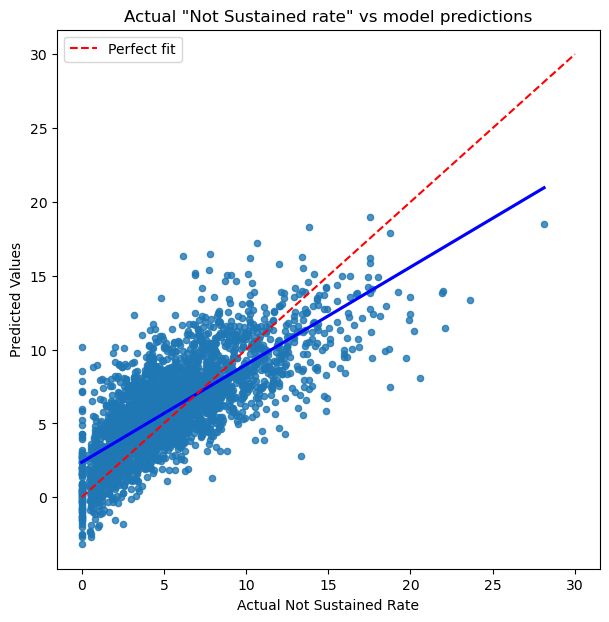

In [603]:
fig, ax = plt.subplots(figsize=(7,7))
sns.regplot(x=data['not_sustained_rate'], 
            y=model.fittedvalues, 
            ax=ax, 
            scatter_kws={'s': 20}, 
            line_kws={'color': 'blue'}, 
            ci=None
           )

plt.plot([0, 30], 
         [0, 30], 
         color='red', linestyle='--', label='Perfect fit')


plt.title('Actual "Not Sustained rate" vs model predictions')
plt.xlabel('Actual Not Sustained Rate')
plt.ylabel('Predicted Values')
plt.legend();

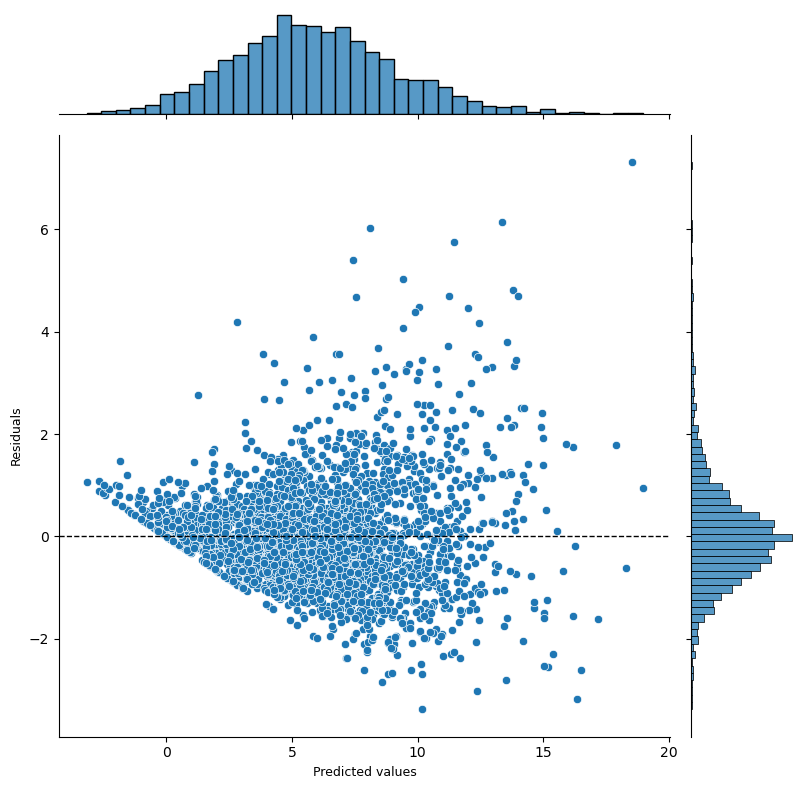

In [604]:
# create jointplot
g = sns.jointplot(x=model.fittedvalues, y=model.resid_pearson, kind='scatter', height=8)

# access the scatter plot part of the jointplot
ax = g.ax_joint

# add a horizontal line at y=0
ax.axhline(0, color='black', linestyle='--', linewidth=1)

g.set_axis_labels('Predicted values', 'Residuals', fontsize=9);

#### Correlation matrix

In [605]:
vars = x.columns.tolist()
vars = vars[1:]
vars

['headcount',
 'pupil_teacher_ratio',
 'assistant_teacher_ratio',
 'susp_rate',
 'Progress_8',
 'post16',
 'Ofsted_rating',
 'faith_binary',
 'single_sex_binary',
 'absence_rate_non_excl',
 'selective',
 'perc_boys',
 'FSM',
 'sen_support',
 'White_British',
 'KS2_history',
 'IMD',
 'urban_binary']

In [606]:
vars_for_corr = data[vars]


In [607]:
# save variables for correlation matrix
corr = vars_for_corr.corr(method='kendall')

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
np.fill_diagonal(mask, False)

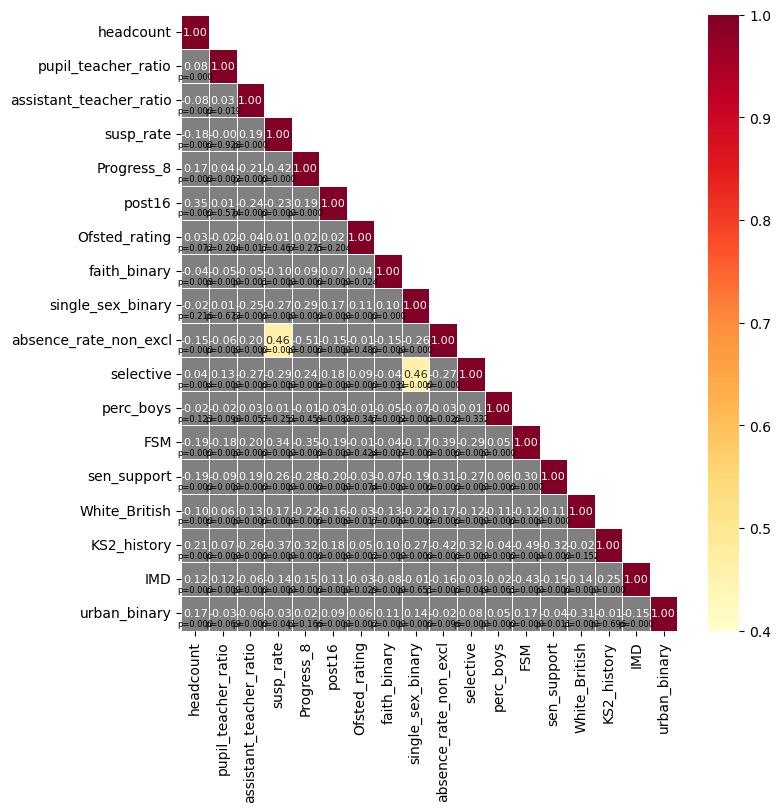

In [608]:
# set colour map for pos 
my_cmap = copy(plt.cm.YlOrRd)
my_cmap.set_over("grey")
my_cmap.set_under("grey")

# positive correlations
f, ax = plt.subplots(figsize=(8,8)) 

g = sns.heatmap(corr,
    vmin=0.4,
    vmax=1,
    cmap=my_cmap,
    linewidths=0.5,
    #linecolor="grey",
    annot = True,
    annot_kws={"fontsize": 8},
    fmt = '.2f',
    ax=ax,
    mask=mask)

# calculate p-values
p_values = np.full((corr.shape[0], corr.shape[1]), np.nan)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[1]):
        x = vars_for_corr.iloc[:, i]
        y = vars_for_corr.iloc[:, j]
        p_values[i, j] = kendalltau(x, y)[1]

p_values = pd.DataFrame(p_values, columns=corr.columns, index=corr.index)

max_corr = np.max(corr.max())
min_corr = np.min(corr.min())

for i in range (p_values.shape[0]):
    for j in range(p_values.shape[1]):
        p_value = p_values.iloc[i, j]
        if not np.isnan(p_value):
            correlation_value = corr.iloc[i, j]
            text_color = 'black' if p_value >= 0.001 else 'black'
            ax.text(i+0.5, j+0.8, f'p={p_value:.3f}',
                    horizontalalignment = 'center',
                    verticalalignment = 'center',
                    fontsize = 6,
                    color = text_color)


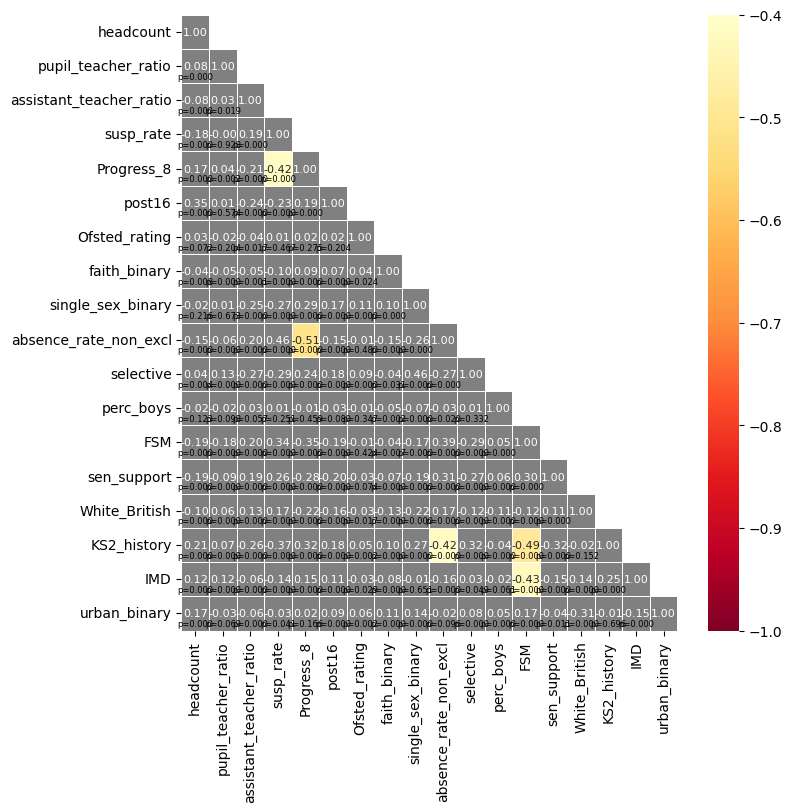

In [609]:
# set colour map for neg 
my_cmap_r = copy(plt.cm.YlOrRd_r)
my_cmap_r.set_over("grey")
my_cmap_r.set_under("grey")

# negative correlations
f, ax = plt.subplots(figsize=(8,8)) 

g = sns.heatmap(corr,
    vmin=-1,
    vmax=-0.4,
    cmap=my_cmap_r,
    linewidths=0.5,
    #linecolor="grey",
    annot = True,
    annot_kws={"fontsize": 8},
    fmt = '.2f',
    ax=ax,
    mask=mask)

# calculate p-values
p_values = np.full((corr.shape[0], corr.shape[1]), np.nan)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[1]):
        x = vars_for_corr.iloc[:, i]
        y = vars_for_corr.iloc[:, j]
        p_values[i, j] = kendalltau(x, y)[1]

p_values = pd.DataFrame(p_values, columns=corr.columns, index=corr.index)

max_corr = np.max(corr.max())
min_corr = np.min(corr.min())

for i in range (p_values.shape[0]):
    for j in range(p_values.shape[1]):
        p_value = p_values.iloc[i, j]
        if not np.isnan(p_value):
            correlation_value = corr.iloc[i, j]
            text_color = 'black' if p_value >= 0.001 else 'black'
            ax.text(i+0.5, j+0.8, f'p={p_value:.3f}',
                    horizontalalignment = 'center',
                    verticalalignment = 'center',
                    fontsize = 6,
                    color = text_color)

#### Coefficient plot

In [610]:
# extract coefficients and confidence intervals
coef = model.params
conf = model.conf_int()
sig = model.pvalues

# df for plotting
coef_df = pd.DataFrame({
    'Coefficient': coef,
    'Lower CI': conf[0],
    'Upper CI': conf[1],
    'p-value': sig
}).reset_index().rename(columns={'index': 'Predictor'})

coef_df = coef_df[coef_df['Predictor'] != 'const']

# sort values
coef_df = coef_df.sort_values(by='Coefficient')

# rename labels using dictionary
#coef_df['Predictor'] = coef_df['Predictor'].map(corr_names)
coef_df

Predictor  Coefficient  Lower CI  Upper CI       p-value
6                    post16    -0.915802 -1.176653 -0.654952  7.082862e-12
9         single_sex_binary    -0.628212 -1.056338 -0.200085  4.041855e-03
5                Progress_8    -0.512093 -0.840525 -0.183661  2.253887e-03
16              KS2_history    -0.337947 -0.414417 -0.261476  7.293812e-18
8              faith_binary    -0.242029 -0.539682  0.055625  1.109659e-01
17                      IMD    -0.063784 -0.112843 -0.014725  1.084509e-02
3   assistant_teacher_ratio    -0.034163 -1.034202  0.965876  9.465997e-01
2       pupil_teacher_ratio    -0.020342 -0.069733  0.029049  4.194133e-01
7             Ofsted_rating    -0.013987 -0.112076  0.084101  7.797989e-01
1                 headcount    -0.000318 -0.000669  0.000032  7.516487e-02
12                perc_boys     0.006560 -0.000226  0.013346  5.814242e-02
4                 susp_rate     0.021531  0.015967  0.027096  4.354606e-14
15            White_British     0.022394  0.017213  0.027576  3.675564e-17
14              sen_support     0.033245  0.008561  0.057929  8.313899e-03
13                      FSM     0.123837  0.108116  0.139559  8.214899e-52
10    absence_rate_non_excl     0.128828  0.051142  0.206515  1.160650e-03
18             urban_binary     0.643779  0.296415  0.991144  2.838853e-04
11                selective     2.260100  1.492733  3.027466  8.496886e-09

In [611]:
coef_df_sig = coef_df.loc[coef_df['p-value'] <0.05].copy()
coef_df_sig

Predictor  Coefficient  Lower CI  Upper CI       p-value
6                  post16    -0.915802 -1.176653 -0.654952  7.082862e-12
9       single_sex_binary    -0.628212 -1.056338 -0.200085  4.041855e-03
5              Progress_8    -0.512093 -0.840525 -0.183661  2.253887e-03
16            KS2_history    -0.337947 -0.414417 -0.261476  7.293812e-18
17                    IMD    -0.063784 -0.112843 -0.014725  1.084509e-02
4               susp_rate     0.021531  0.015967  0.027096  4.354606e-14
15          White_British     0.022394  0.017213  0.027576  3.675564e-17
14            sen_support     0.033245  0.008561  0.057929  8.313899e-03
13                    FSM     0.123837  0.108116  0.139559  8.214899e-52
10  absence_rate_non_excl     0.128828  0.051142  0.206515  1.160650e-03
18           urban_binary     0.643779  0.296415  0.991144  2.838853e-04
11              selective     2.260100  1.492733  3.027466  8.496886e-09

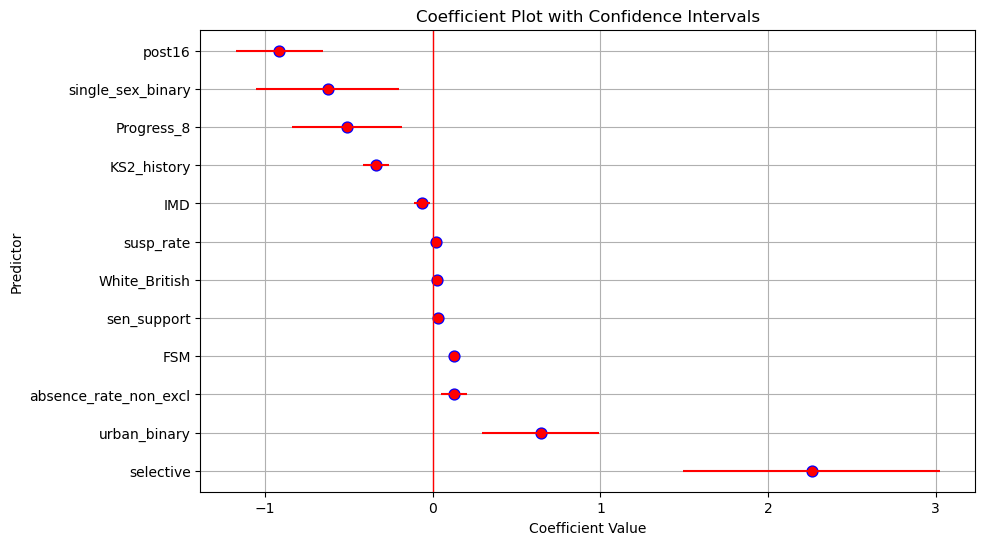

In [612]:
# rename labels using dictionary
#coef_df_sig['Predictor'] = coef_df_sig['Predictor'].map(corr_names)

# plot
plt.figure(figsize=(10, 6))
sns.pointplot(x='Coefficient', y='Predictor', data=coef_df_sig, linestyle='none', markers='o', color='blue')
plt.errorbar(coef_df_sig['Coefficient'], coef_df_sig['Predictor'], 
             xerr=[coef_df_sig['Coefficient'] - coef_df_sig['Lower CI'], coef_df_sig['Upper CI'] - coef_df_sig['Coefficient']], 
             fmt='o', color='red')

# add a vertical line at x=0
ax = plt.gca() # get current axis
ax.axvline(0, color='red', linestyle='-', linewidth=1)

plt.title('Coefficient Plot with Confidence Intervals')
plt.xlabel('Coefficient Value')
plt.ylabel('Predictor')
plt.grid(True)
plt.show()

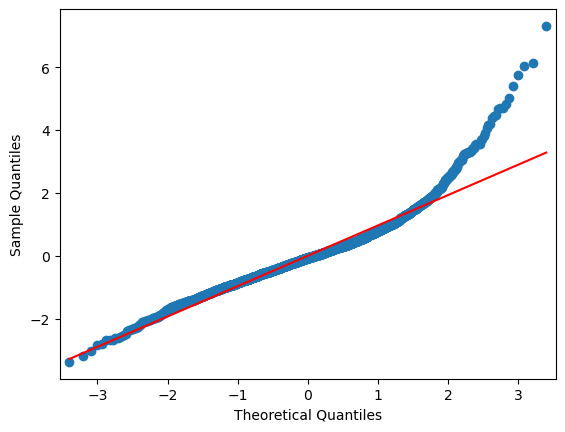

In [613]:
qqplot(model.resid_pearson, line='r');

# Model 2 - GLM - IGNORE

- used when residuals / data not normally distributed (NEET outcome)
- does not assume linear relationship
- capacity to handle a more comprehensive array of data types

in this case, response variable is always positive, does not meet the assumption that constant change in a predictor leads to a constant change in the response variable

Gamma distribution: skewed positive continuous distribution 

In [614]:
glm_data = data.drop(columns=['total_absence', 'persistent_absence', 'urban_rural',
                              'denomination', 'type',
                             'EAL', 'region_name', 'school_name', 'perm_excl_rate', 
                             'one_plus_susp_rate', 'KS4_headcount', 'KS4_pass_rate',
                             'POSTCODE', 'school_sex', 'ehcp', 'LSOA11', 'region_new'])

In [615]:
glm_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2972 entries, 1 to 3146
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   URN                             2972 non-null   int64   
 1   not_sustained_rate              2972 non-null   float64 
 2   not_sustained_rate_overalldest  2972 non-null   float64 
 3   FSM                             2972 non-null   float64 
 4   White_British                   2972 non-null   float64 
 5   perc_boys                       2972 non-null   float64 
 6   headcount                       2972 non-null   float64 
 7   susp_rate                       2972 non-null   float64 
 8   KS2_history                     2972 non-null   float64 
 9   Attainment_8                    2972 non-null   float64 
 10  Progress_8                      2972 non-null   float64 
 11  selective                       2972 non-null   int64   
 12  post16                   

In [616]:
glm_data['selective'].replace(0, 'Non-selective', inplace=True)
glm_data['selective'].replace(1, 'Selective', inplace=True)

In [617]:
glm_data['post16'].replace(0, 'No Post-16', inplace=True)
glm_data['post16'].replace(1, 'Post-16', inplace=True)

In [618]:
glm_data['single_sex_binary'].replace(0, 'Mixed', inplace=True)
glm_data['single_sex_binary'].replace(1, 'Single-sex', inplace=True)

In [619]:
glm_data['faith_binary'].replace(0, 'No faith', inplace=True)
glm_data['faith_binary'].replace(1, 'Faith', inplace=True)

In [620]:
glm_data['urban_binary'].replace(0, 'Rural', inplace=True)
glm_data['urban_binary'].replace(1, 'Urban', inplace=True)

In [621]:
glm_data.head()

URN  not_sustained_rate  not_sustained_rate_overalldest   FSM  \
1  137181            5.172414                        5.660377  41.2   
3  100050            2.824859                        2.906977  35.6   
4  100051            5.464481                        5.988024  61.8   
5  100052            1.932367                        1.980198  41.8   
6  100053            4.469274                        4.705882  34.3   

   White_British  perc_boys  headcount  susp_rate  KS2_history  Attainment_8  \
1           10.8  56.874466     1171.0   14.51751        105.1          47.4   
3           38.8   4.963971     1249.0    9.12730        107.1          59.1   
4            3.9  56.163114     1079.0    5.37535        103.5          43.8   
5           11.4  51.630023     1319.0    3.26005        103.2          44.6   
6           46.3  65.778160     1163.0    8.25451        106.0          50.3   

   Progress_8      selective   post16  Ofsted_rating  sen_support  IMD  \
1       -0.18  Non-selective  Post-16            3.0    10.247652  8.0   
3        0.61  Non-selective  Post-16            0.0    13.370697  4.0   
4       -0.06  Non-selective  Post-16            0.0    17.886932  2.0   
5       -0.04  Non-selective  Post-16            0.0     9.628506  7.0   
6       -0.17  Non-selective  Post-16            0.0    11.951849  5.0   

   pupil_teacher_ratio  assistant_teacher_ratio  absence_rate_non_excl  \
1                 13.0                      0.2              10.803701   
3                 14.7                      0.1               7.769210   
4                 11.9                      0.2              11.246731   
5                 14.9                      0.2               8.103096   
6                 12.2                      0.3               7.963311   

  single_sex_binary faith_binary urban_binary Ofsted_num  
1             Mixed     No faith        Urban          2  
3        Single-sex     No faith        Urban          3  
4             Mixed     No faith        Urban          3  
5             Mixed     No faith        Urban          3  
6             Mixed     No faith        Urban          3

In [622]:
# convert to category 
glm_data['selective'] = pd.Categorical(glm_data['selective'])
glm_data['single_sex_binary'] = pd.Categorical(glm_data['single_sex_binary'])
glm_data['faith_binary'] = pd.Categorical(glm_data['faith_binary'])
glm_data['post16'] = pd.Categorical(glm_data['post16'])
glm_data['urban_binary'] = pd.Categorical(glm_data['urban_binary'])

glm_data[['Ofsted_rating']] = ord_transformer.fit_transform(glm_data[['Ofsted_rating']])

In [623]:
glm_data.describe()

URN  not_sustained_rate  not_sustained_rate_overalldest  \
count    2972.000000         2972.000000                     2972.000000   
mean   133863.203567            5.354765                        5.907684   
std     12011.537035            3.670508                        4.422501   
min    100050.000000            0.000000                        0.000000   
25%    135760.750000            2.720164                        2.824859   
50%    137338.500000            4.591837                        4.851427   
75%    140412.750000            7.272727                        7.926829   
max    148866.000000           28.125000                       40.540541   

               FSM  White_British    perc_boys    headcount    susp_rate  \
count  2972.000000    2972.000000  2972.000000  2972.000000  2972.000000   
mean     24.482470      63.886137    50.348293  1115.075034    20.286441   
std      12.930734      28.961852    16.637625   385.419425    24.449683   
min       1.300000       0.000000     0.000000    81.000000     0.000000   
25%      14.700000      44.400000    49.178838   847.000000     6.619397   
50%      22.500000      75.300000    50.977719  1082.000000    13.096390   
75%      32.725000      87.300000    53.044672  1359.000000    24.544380   
max      75.400000      99.300000   100.000000  2990.000000   358.064520   

       KS2_history  Attainment_8   Progress_8  Ofsted_rating  sen_support  \
count  2972.000000   2972.000000  2972.000000    2972.000000  2972.000000   
mean    104.437248     47.261137    -0.001413       0.704240    12.866762   
std       2.745410      9.261298     0.505607       1.125427     5.493081   
min      92.100000     18.800000    -3.380000       0.000000     0.403226   
25%     102.800000     41.300000    -0.330000       0.000000     9.227085   
50%     104.200000     46.100000    -0.010000       0.000000    12.608697   
75%     105.500000     51.500000     0.330000       2.000000    16.039934   
max     117.400000     87.600000     2.370000       3.000000    48.316252   

              IMD  pupil_teacher_ratio  assistant_teacher_ratio  \
count  2972.00000          2972.000000              2972.000000   
mean      5.66319            16.897241                 0.230585   
std       2.81924             2.295918                 0.120709   
min       1.00000             5.300000                 0.000000   
25%       3.00000            15.600000                 0.100000   
50%       6.00000            16.800000                 0.200000   
75%       8.00000            18.000000                 0.300000   
max      10.00000            43.400000                 1.000000   

       absence_rate_non_excl  
count            2972.000000  
mean                8.819434  
std                 2.263271  
min                 3.034038  
25%                 7.330413  
50%                 8.653188  
75%                10.098754  
max                32.617429

In [624]:
columns_with_zeros = ['not_sustained_rate', 'White_British', 'perc_boys', 'susp_rate', 
                       'assistant_teacher_ratio', 'Ofsted_rating']

In [625]:
glm_data[columns_with_zeros] = glm_data[columns_with_zeros] + 1

In [626]:
glm_data['Progress_8'] = glm_data['Progress_8'] +4

### Predictors

In [627]:
model_glm = smf.glm(formula = ('not_sustained_rate ~ headcount + pupil_teacher_ratio + assistant_teacher_ratio +'
                               'susp_rate + Progress_8 + Ofsted_rating +'
                               'C(post16, Treatment(reference="Post-16")) +'
                               'C(faith_binary, Treatment(reference="No faith")) +'
                               'C(single_sex_binary, Treatment(reference="Mixed"))'
                              ), 
                    data=glm_data, 
                    family=sm.families.Gamma(link=sm.families.links.Log())).fit()

In [628]:
model_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     not_sustained_rate   No. Observations:                 2972
Model:                            GLM   Df Residuals:                     2962
Model Family:                   Gamma   Df Model:                            9
Link Function:                    Log   Scale:                         0.20462
Method:                          IRLS   Log-Likelihood:                -6885.5
Date:                Fri, 28 Feb 2025   Deviance:                       608.16
Time:                        12:40:18   Pearson chi2:                     606.
No. Iterations:                    14   Pseudo R-squ. (CS):             0.5091
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                            3.1219      0.141     22.148      0.000       2.846       3.398
C(post16, Treatment(reference="Post-16"))[T.No Post-16]              0.1422      0.020      7.228      0.000       0.104       0.181
C(faith_binary, Treatment(reference="No faith"))[T.Faith]           -0.0912      0.022     -4.180      0.000      -0.134      -0.048
C(single_sex_binary, Treatment(reference="Mixed"))[T.Single-sex]    -0.3856      0.029    -13.175      0.000      -0.443      -0.328
headcount                                                           -0.0002   2.48e-05     -6.991      0.000      -0.000      -0.000
pupil_teacher_ratio                                                 -0.0233      0.004     -6.346      0.000      -0.030      -0.016
assistant_teacher_ratio                                              0.4867      0.074      6.581      0.000       0.342       0.632
susp_rate                                                            0.0048      0.000     12.368      0.000       0.004       0.006
Progress_8                                                          -0.3550      0.020    -17.779      0.000      -0.394      -0.316
Ofsted_rating                                                       -0.0196      0.007     -2.622      0.009      -0.034      -0.005
====================================================================================================================================
"""

In [629]:
aic_value = model_glm.aic
print(f"AIC: {aic_value}")

AIC: 13790.964016782822


The Log link function means that the model is predicting the logarithm of the not_sustained_rate as a linear function of the predictors. When interpreting the coefficients, we often exponentiate them to understand their multiplicative effect on the original (non-log-transformed) scale of the dependent variable. For example:

An exponentiated coefficient of -0.091155 for C(denomination, Treatment(reference="No faith"))[T.Faith] means that being a faith school is associated with a multiplicative change of exp(-0.091155)≈0.91, or roughly a 9% decrease in the not_sustained_rate compared to "No faith" schools.

#### Exp coefficients to get log ratios

In [630]:
coefficients = model_glm.params
exp_coefficients = np.exp(coefficients)
p_values = model_glm.pvalues.round(4)

coef_df = pd.DataFrame({
    'Original Coefficients': coefficients,
    'Log Ratios': exp_coefficients,
    'p-value': p_values
})
coef_df

Original Coefficients  \
Intercept                                                        3.121926   
C(post16, Treatment(reference="Post-16"))[T.No ...               0.142236   
C(faith_binary, Treatment(reference="No faith")...              -0.091155   
C(single_sex_binary, Treatment(reference="Mixed...              -0.385632   
headcount                                                       -0.000173   
pupil_teacher_ratio                                             -0.023300   
assistant_teacher_ratio                                          0.486720   
susp_rate                                                        0.004822   
Progress_8                                                      -0.355047   
Ofsted_rating                                                   -0.019606   

                                                    Log Ratios  p-value  
Intercept                                            22.690044   0.0000  
C(post16, Treatment(reference="Post-16"))[T.No ...    1.152849   0.0000  
C(faith_binary, Treatment(reference="No faith")...    0.912877   0.0000  
C(single_sex_binary, Treatment(reference="Mixed...    0.680021   0.0000  
headcount                                             0.999827   0.0000  
pupil_teacher_ratio                                   0.976969   0.0000  
assistant_teacher_ratio                               1.626971   0.0000  
susp_rate                                             1.004833   0.0000  
Progress_8                                            0.701140   0.0000  
Ofsted_rating                                         0.980585   0.0087

### Predictors and controls

In [631]:
control_glm = smf.glm(formula = ('not_sustained_rate ~ headcount + pupil_teacher_ratio + assistant_teacher_ratio +'
                               'susp_rate + Progress_8 + Ofsted_rating +'
                               'C(post16, Treatment(reference="Post-16")) +'
                               'C(faith_binary, Treatment(reference="No faith")) +'
                               'C(single_sex_binary, Treatment(reference="Mixed")) +'
                               # controls
                               'FSM + sen_support + perc_boys + White_British + Attainment_8 + ' 
                               'KS2_history + absence_rate_non_excl + IMD +' 
                               'C(selective, Treatment(reference="Non-selective")) + ' 
                               'C(urban_binary, Treatment(reference="Urban"))'), 
                    data=glm_data, 
                    family=sm.families.Gamma(link=sm.families.links.Log())).fit()

In [632]:
control_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     not_sustained_rate   No. Observations:                 2972
Model:                            GLM   Df Residuals:                     2952
Model Family:                   Gamma   Df Model:                           19
Link Function:                    Log   Scale:                         0.13656
Method:                          IRLS   Log-Likelihood:                -6316.4
Date:                Fri, 28 Feb 2025   Deviance:                       419.16
Time:                        12:40:19   Pearson chi2:                     403.
No. Iterations:                    13   Pseudo R-squ. (CS):             0.7839
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                            9.9473      1.903      5.228      0.000       6.218      13.677
C(post16, Treatment(reference="Post-16"))[T.No Post-16]              0.1122      0.016      6.867      0.000       0.080       0.144
C(faith_binary, Treatment(reference="No faith"))[T.Faith]           -0.0795      0.019     -4.265      0.000      -0.116      -0.043
C(single_sex_binary, Treatment(reference="Mixed"))[T.Single-sex]    -0.1615      0.027     -6.014      0.000      -0.214      -0.109
C(selective, Treatment(reference="Non-selective"))[T.Selective]     -0.2137      0.053     -4.066      0.000      -0.317      -0.111
C(urban_binary, Treatment(reference="Urban"))[T.Rural]              -0.0856      0.022     -3.936      0.000      -0.128      -0.043
headcount                                                        -6.274e-05   2.19e-05     -2.859      0.004      -0.000   -1.97e-05
pupil_teacher_ratio                                                 -0.0031      0.003     -1.013      0.311      -0.009       0.003
assistant_teacher_ratio                                              0.0041      0.063      0.065      0.948      -0.119       0.127
susp_rate                                                            0.0012      0.000      3.356      0.001       0.000       0.002
Progress_8                                                          -0.2193      0.094     -2.345      0.019      -0.403      -0.036
Ofsted_rating                                                       -0.0096      0.006     -1.571      0.116      -0.022       0.002
FSM                                                                  0.0139      0.001     14.024      0.000       0.012       0.016
sen_support                                                          0.0025      0.002      1.587      0.113      -0.001       0.005
perc_boys                                                            0.0010      0.000      2.360      0.018       0.000       0.002
White_British                                                        0.0033      0.000     10.017      0.000       0.003       0.004
Attainment_8                                                         0.0120      0.009      1.322      0.186      -0.006       0.030
KS2_history                                                         -0.0808      0.019     -4.331      0.000      -0.117      -0.044
absence_rate_non_excl                                                0.0123      0.005      2.518      0.012       0.003       0.022
IMD                                                                 -0.0128      0.003     -4.146      0.000      -0.019      -0.007
========================

In [633]:
aic_value = control_glm.aic
print(f"AIC: {aic_value}")

AIC: 12672.76262989358


#### Exp coefficients to get log ratios

In [634]:
coefficients = control_glm.params
exp_coefficients = np.exp(coefficients)
p_values = control_glm.pvalues.round(4)

coef_df = pd.DataFrame({
    'Original Coefficients': coefficients,
    'Log Ratios': exp_coefficients,
    'p-value': p_values
})
coef_df

Original Coefficients  \
Intercept                                                        9.947303   
C(post16, Treatment(reference="Post-16"))[T.No ...               0.112154   
C(faith_binary, Treatment(reference="No faith")...              -0.079477   
C(single_sex_binary, Treatment(reference="Mixed...              -0.161455   
C(selective, Treatment(reference="Non-selective...              -0.213705   
C(urban_binary, Treatment(reference="Urban"))[T...              -0.085604   
headcount                                                       -0.000063   
pupil_teacher_ratio                                             -0.003136   
assistant_teacher_ratio                                          0.004058   
susp_rate                                                        0.001171   
Progress_8                                                      -0.219325   
Ofsted_rating                                                   -0.009645   
FSM                                                              0.013861   
sen_support                                                      0.002453   
perc_boys                                                        0.001003   
White_British                                                    0.003253   
Attainment_8                                                     0.012008   
KS2_history                                                     -0.080799   
absence_rate_non_excl                                            0.012259   
IMD                                                             -0.012768   

                                                      Log Ratios  p-value  
Intercept                                           20895.790466   0.0000  
C(post16, Treatment(reference="Post-16"))[T.No ...      1.118686   0.0000  
C(faith_binary, Treatment(reference="No faith")...      0.923600   0.0000  
C(single_sex_binary, Treatment(reference="Mixed...      0.850905   0.0000  
C(selective, Treatment(reference="Non-selective...      0.807587   0.0000  
C(urban_binary, Treatment(reference="Urban"))[T...      0.917958   0.0001  
headcount                                               0.999937   0.0043  
pupil_teacher_ratio                                     0.996869   0.3109  
assistant_teacher_ratio                                 1.004067   0.9483  
susp_rate                                               1.001171   0.0008  
Progress_8                                              0.803060   0.0190  
Ofsted_rating                                           0.990402   0.1163  
FSM                                                     1.013958   0.0000  
sen_support                                             1.002456   0.1125  
perc_boys                                               1.001003   0.0183  
White_British                                           1.003259   0.0000  
Attainment_8                                            1.012080   0.1862  
KS2_history                                             0.922379   0.0000  
absence_rate_non_excl                                   1.012334   0.0118  
IMD                                                     0.987313   0.0000

#### calculate VIFs

In [635]:
x = glm_data[['headcount',
'pupil_teacher_ratio',
'assistant_teacher_ratio',
'susp_rate',
'Progress_8',
'post16',
'Ofsted_rating',
'faith_binary',
'single_sex_binary',

# controls
'Attainment_8',
'absence_rate_non_excl',
'selective', 
'perc_boys',
'FSM',
'sen_support',
'White_British',
'KS2_history',
'IMD',
'urban_binary' ]]
x

headcount  pupil_teacher_ratio  assistant_teacher_ratio  susp_rate  \
1        1171.0                 13.0                      1.2   15.51751   
3        1249.0                 14.7                      1.1   10.12730   
4        1079.0                 11.9                      1.2    6.37535   
5        1319.0                 14.9                      1.2    4.26005   
6        1163.0                 12.2                      1.3    9.25451   
...         ...                  ...                      ...        ...   
3141      352.0                 16.1                      1.2    5.82955   
3142      370.0                 19.3                      1.2    6.67568   
3143      340.0                 17.3                      1.6    6.88235   
3144     1174.0                 12.7                      1.2    4.40716   
3146     1159.0                 16.6                      1.5   10.57722   

      Progress_8      post16  Ofsted_rating faith_binary single_sex_binary  \
1           3.82     Post-16            4.0     No faith             Mixed   
3           4.61     Post-16            1.0     No faith        Single-sex   
4           3.94     Post-16            1.0     No faith             Mixed   
5           3.96     Post-16            1.0     No faith             Mixed   
6           3.83     Post-16            1.0     No faith             Mixed   
...          ...         ...            ...          ...               ...   
3141        4.01     Post-16            1.0     No faith             Mixed   
3142        3.85     Post-16            1.0     No faith             Mixed   
3143        4.28  No Post-16            1.0        Faith             Mixed   
3144        4.43     Post-16            1.0     No faith             Mixed   
3146        3.73  No Post-16            1.0     No faith             Mixed   

      Attainment_8  absence_rate_non_excl      selective  perc_boys   FSM  \
1             47.4              10.803701  Non-selective  57.874466  41.2   
3             59.1               7.769210  Non-selective   5.963971  35.6   
4             43.8              11.246731  Non-selective  57.163114  61.8   
5             44.6               8.103096  Non-selective  52.630023  41.8   
6             50.3               7.963311  Non-selective  66.778160  34.3   
...            ...                    ...            ...        ...   ...   
3141          44.8               6.451853  Non-selective  49.863636  15.8   
3142          40.8               9.315132  Non-selective  51.270270  13.5   
3143          52.0               9.502841  Non-selective  52.176471  12.6   
3144          57.9               6.724354  Non-selective  50.659284   6.9   
3146          41.2               8.713654  Non-selective  51.819672  28.6   

      sen_support  White_British  KS2_history  IMD urban_binary  
1       10.247652           11.8        105.1  8.0        Urban  
3       13.370697           39.8        107.1  4.0        Urban  
4       17.886932            4.9        103.5  2.0        Urban  
5        9.628506           12.4        103.2  7.0        Urban  
6       11.951849           47.3        106.0  5.0        Urban  
...           ...            ...          ...  ...          ...  
3141    18.465909           93.9        103.2  4.0        Rural  
3142    14.864865           91.0        102.1  8.0        Rural  
3143     8.823529           91.9        105.4  9.0        Rural  
3144    16.269165           93.7        107.6  8.0        Rural  
3146    10.871441           97.6        102.6  4.0        Urban  

[2972 rows x 19 columns]

In [636]:
# get dummies for cat vars
x = pd.get_dummies(x, drop_first=True)
# convert bool to numberic
x = x.astype({col: 'int' for col in x.select_dtypes(include='bool').columns})

In [637]:
vif_values = pd.DataFrame()
vif_values['predictor'] = x.columns

vif_values['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif_values = vif_values.sort_values(by='VIF')
vif_values

predictor         VIF
16  single_sex_binary_Single-sex    1.766965
3                      susp_rate    2.775100
17           selective_Selective    3.040530
5                  Ofsted_rating    3.422923
14                post16_Post-16    3.631997
15         faith_binary_No faith    6.162837
13                           IMD    8.232024
18            urban_binary_Urban    8.822371
10                   sen_support   10.151450
8                      perc_boys   11.415771
11                 White_British   11.582843
0                      headcount   14.567754
9                            FSM   15.754989
7          absence_rate_non_excl   42.659001
1            pupil_teacher_ratio   60.618284
2        assistant_teacher_ratio  129.085021
4                     Progress_8  295.192671
6                   Attainment_8  350.773246
12                   KS2_history  599.029197

started by removing highest VIF factors that were non-significant (a8 and staffing ratios) then one a time removing highest VIF factor until all under 10

In [638]:
x_clean = x.drop(columns=[ 'Attainment_8', 'assistant_teacher_ratio', 'pupil_teacher_ratio', 
                          'KS2_history', 'Progress_8', 'absence_rate_non_excl', 'headcount'])

In [639]:
vif_values = pd.DataFrame()
vif_values['predictor'] = x_clean.columns

vif_values['VIF'] = [variance_inflation_factor(x_clean.values, i) for i in range(x_clean.shape[1])]

vif_values = vif_values.sort_values(by='VIF')
vif_values

predictor       VIF
9   single_sex_binary_Single-sex  1.561687
10           selective_Selective  1.563419
0                      susp_rate  2.366412
7                 post16_Post-16  2.846257
1                  Ofsted_rating  3.242757
8          faith_binary_No faith  5.678655
6                            IMD  6.540125
11            urban_binary_Urban  7.105439
5                  White_British  7.512551
3                            FSM  9.154098
2                      perc_boys  9.254213
4                    sen_support  9.471085

### Predictors and controls - drop high VIF

In [640]:
low_vif_glm = smf.glm(formula = ('not_sustained_rate ~ '
                               'susp_rate + Ofsted_rating +'
                               'C(post16, Treatment(reference="Post-16")) +'
                               'C(faith_binary, Treatment(reference="No faith")) +'
                               'C(single_sex_binary, Treatment(reference="Mixed")) +'
                               # controls
                               'FSM + sen_support + perc_boys + White_British + ' 
                               'IMD +' 
                               'C(selective, Treatment(reference="Non-selective")) + ' 
                               'C(urban_binary, Treatment(reference="Urban"))'), 
                    data=glm_data, 
                    family=sm.families.Gamma(link=sm.families.links.Log())).fit()

In [641]:
low_vif_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:     not_sustained_rate   No. Observations:                 2972
Model:                            GLM   Df Residuals:                     2959
Model Family:                   Gamma   Df Model:                           12
Link Function:                    Log   Scale:                         0.15151
Method:                          IRLS   Log-Likelihood:                -6435.1
Date:                Fri, 28 Feb 2025   Deviance:                       453.12
Time:                        12:40:21   Pearson chi2:                     448.
No. Iterations:                    13   Pseudo R-squ. (CS):             0.7289
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                            0.8723      0.049     17.645      0.000       0.775       0.969
C(post16, Treatment(reference="Post-16"))[T.No Post-16]              0.1234      0.016      7.828      0.000       0.093       0.154
C(faith_binary, Treatment(reference="No faith"))[T.Faith]           -0.0960      0.019     -5.013      0.000      -0.133      -0.058
C(single_sex_binary, Treatment(reference="Mixed"))[T.Single-sex]    -0.2007      0.027     -7.361      0.000      -0.254      -0.147
C(selective, Treatment(reference="Non-selective"))[T.Selective]     -0.5443      0.039    -14.029      0.000      -0.620      -0.468
C(urban_binary, Treatment(reference="Urban"))[T.Rural]              -0.0461      0.022     -2.090      0.037      -0.089      -0.003
susp_rate                                                            0.0024      0.000      6.924      0.000       0.002       0.003
Ofsted_rating                                                       -0.0150      0.006     -2.339      0.019      -0.028      -0.002
FSM                                                                  0.0216      0.001     24.461      0.000       0.020       0.023
sen_support                                                          0.0071      0.002      4.499      0.000       0.004       0.010
perc_boys                                                            0.0013      0.000      2.939      0.003       0.000       0.002
White_British                                                        0.0043      0.000     13.932      0.000       0.004       0.005
IMD                                                                 -0.0146      0.003     -4.549      0.000      -0.021      -0.008
====================================================================================================================================
"""

In [642]:
aic_value = low_vif_glm.aic
print(f"AIC: {aic_value}")

AIC: 12896.182811127948


#### Exp coefficients to get log ratios

In [643]:
coefficients = low_vif_glm.params
exp_coefficients = np.exp(coefficients)
p_values = low_vif_glm.pvalues.round(4)

coef_df = pd.DataFrame({
    'Original Coefficients': coefficients,
    'Log Ratios': exp_coefficients,
    'p-value': p_values
})
coef_df

Original Coefficients  \
Intercept                                                        0.872332   
C(post16, Treatment(reference="Post-16"))[T.No ...               0.123425   
C(faith_binary, Treatment(reference="No faith")...              -0.095968   
C(single_sex_binary, Treatment(reference="Mixed...              -0.200711   
C(selective, Treatment(reference="Non-selective...              -0.544332   
C(urban_binary, Treatment(reference="Urban"))[T...              -0.046113   
susp_rate                                                        0.002364   
Ofsted_rating                                                   -0.015047   
FSM                                                              0.021607   
sen_support                                                      0.007145   
perc_boys                                                        0.001296   
White_British                                                    0.004296   
IMD                                                             -0.014645   

                                                    Log Ratios  p-value  
Intercept                                             2.392483   0.0000  
C(post16, Treatment(reference="Post-16"))[T.No ...    1.131366   0.0000  
C(faith_binary, Treatment(reference="No faith")...    0.908493   0.0000  
C(single_sex_binary, Treatment(reference="Mixed...    0.818149   0.0000  
C(selective, Treatment(reference="Non-selective...    0.580229   0.0000  
C(urban_binary, Treatment(reference="Urban"))[T...    0.954934   0.0366  
susp_rate                                             1.002367   0.0000  
Ofsted_rating                                         0.985066   0.0194  
FSM                                                   1.021842   0.0000  
sen_support                                           1.007170   0.0000  
perc_boys                                             1.001297   0.0033  
White_British                                         1.004305   0.0000  
IMD                                                   0.985462   0.0000

## Visualisations

#### Residuals

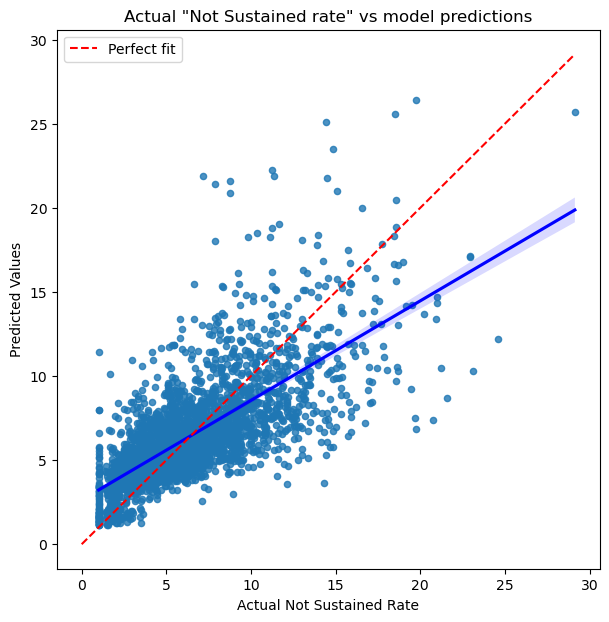

In [644]:
fig, ax = plt.subplots(figsize=(7,7))
sns.regplot(x=glm_data['not_sustained_rate'], 
            y=low_vif_glm.fittedvalues, 
            ax=ax, 
            scatter_kws={'s': 20}, 
            line_kws={'color': 'blue'}, 
            #ci=None
           )

plt.plot([0, glm_data['not_sustained_rate'].max()], 
         [0, glm_data['not_sustained_rate'].max()], 
         color='red', linestyle='--', label='Perfect fit')


plt.title('Actual "Not Sustained rate" vs model predictions')
plt.xlabel('Actual Not Sustained Rate')
plt.ylabel('Predicted Values')
plt.legend();

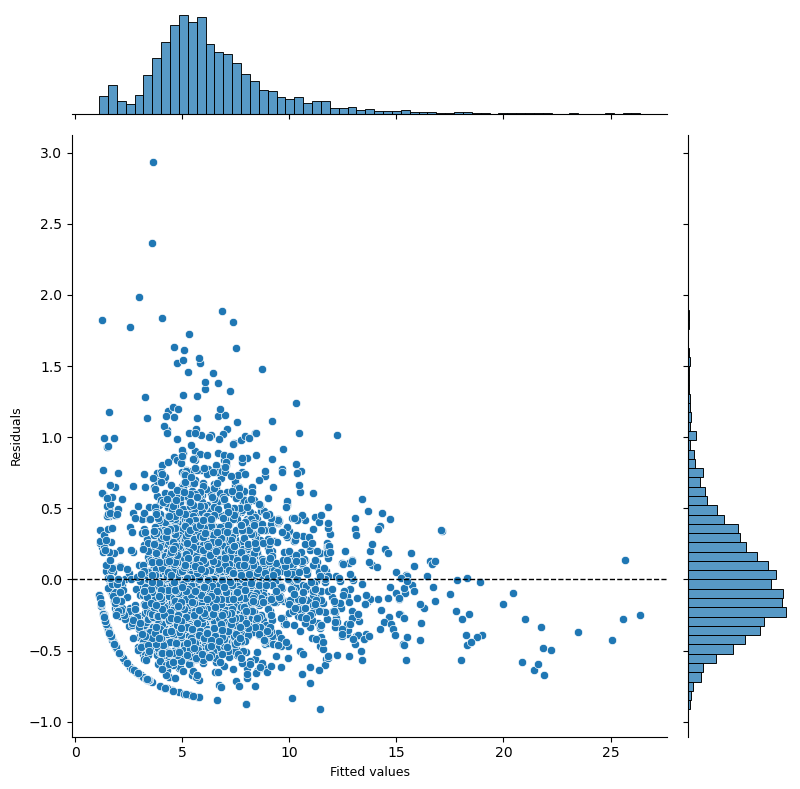

In [645]:
# create jointplot
g = sns.jointplot(x=low_vif_glm.fittedvalues, y=low_vif_glm.resid_pearson, kind='scatter', height=8)

# access the scatter plot part of the jointplot
ax = g.ax_joint

# add a horizontal line at y=0
ax.axhline(0, color='black', linestyle='--', linewidth=1)

g.set_axis_labels('Fitted values', 'Residuals', fontsize=9);

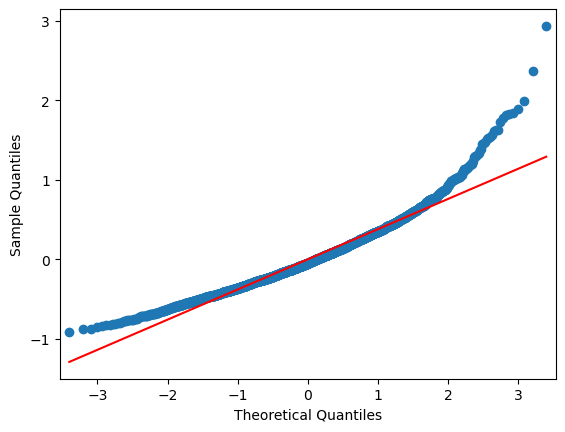

In [646]:
from statsmodels import graphics
graphics.gofplots.qqplot(residuals, line='r');

#### Coefficient Plot

In [719]:
reg_names = {
    'C(post16, Treatment(reference="Post-16"))[T.No Post-16]': 'No Post-16', 
    'C(faith_binary, Treatment(reference="No faith"))[T.Faith]': 'Faith', 
    'C(single_sex_binary, Treatment(reference="Mixed"))[T.Single-sex]': 'Single-sex', 
    'C(selective, Treatment(reference="Non-selective"))[T.Selective]': 'Selective',
    'C(urban_binary, Treatment(reference="Urban"))[T.Rural]': 'Rural', 
    'susp_rate': 'Suspension %', 
    'Ofsted_rating' : 'Ofsted rating',
    'FSM': 'FSM %', 
    'sen_support': 'SEN support %',
    'perc_boys' : 'Boys %',
    'White_British': 'White British %', 
    'IMD': 'IMD of LSOA',
    'Intercept' : 'Intercept'
}

In [720]:
# extract coefficients and confidence intervals
coef = low_vif_glm.params
conf = low_vif_glm.conf_int()

In [721]:
# df for plotting
coef_df = pd.DataFrame({
    'Coefficient': coef,
    'Lower CI': conf[0],
    'Upper CI': conf[1]
}).reset_index().rename(columns={'index': 'Predictor'})

In [722]:
# rename labels using dictionary
coef_df['Predictor'] = coef_df['Predictor'].map(reg_names)

In [723]:
coef_df

Predictor   Coefficient      Lower CI      Upper CI
0         Intercept  0.8723318335  0.7754329388  0.9692307281
1        No Post-16  0.1234253452  0.0925206486  0.1543300419
2             Faith -0.0959684533 -0.1334889042 -0.0584480024
3        Single-sex -0.2007106235 -0.2541514317 -0.1472698152
4         Selective -0.5443322170 -0.6203801940 -0.4682842400
5             Rural -0.0461129244 -0.0893616810 -0.0028641678
6      Suspension %  0.0023639476  0.0016947507  0.0030331446
7     Ofsted rating -0.0150467516 -0.0276567282 -0.0024367749
8             FSM %  0.0216066361  0.0198753814  0.0233378908
9     SEN support %  0.0071447133  0.0040324177  0.0102570090
10           Boys %  0.0012959568  0.0004316344  0.0021602792
11  White British %  0.0042956996  0.0036913578  0.0049000414
12      IMD of LSOA -0.0146446304 -0.0209549104 -0.0083343504

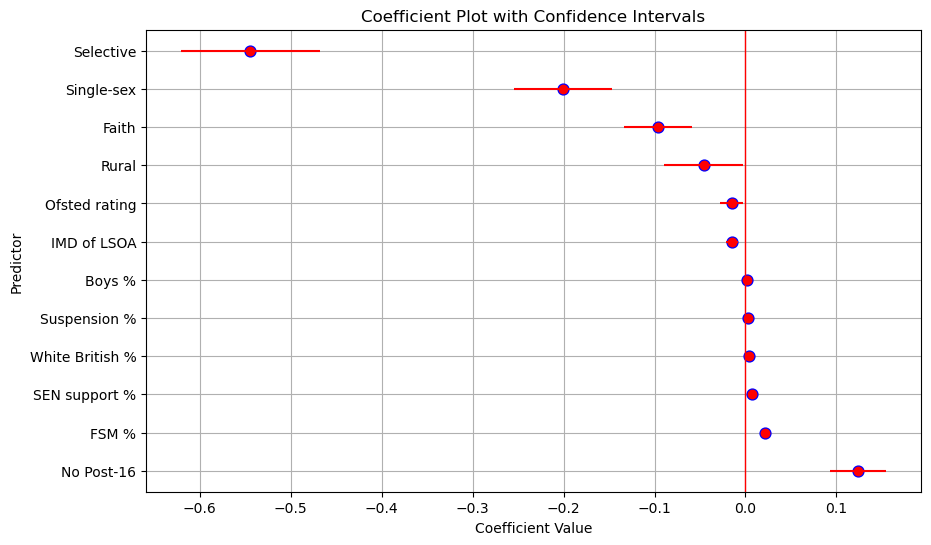

In [724]:
# drop intercept
coef_df = coef_df[coef_df['Predictor'] != 'Intercept']

# sort values
coef_df = coef_df.sort_values(by='Coefficient')


# plot
plt.figure(figsize=(10, 6))
sns.pointplot(x='Coefficient', y='Predictor', data=coef_df, linestyle='none', markers='o', color='blue')
plt.errorbar(coef_df['Coefficient'], coef_df['Predictor'], 
             xerr=[coef_df['Coefficient'] - coef_df['Lower CI'], coef_df['Upper CI'] - coef_df['Coefficient']], 
             fmt='o', color='red')

# add a vertical line at x=0
ax = plt.gca() # get current axis
ax.axvline(0, color='red', linestyle='-', linewidth=1)

plt.title('Coefficient Plot with Confidence Intervals')
plt.xlabel('Coefficient Value')
plt.ylabel('Predictor')
plt.grid(True)
plt.show()

# Model 3 - OLS (transformed variables)

## Data Transformation

In [153]:
from sklearn.preprocessing import PowerTransformer, OrdinalEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [154]:
# transformer to convert quadratic variables
# include bias=false as using linear regression which automatically includes an intercept
poly = Pipeline(steps=[
    ('encoder', PolynomialFeatures(include_bias=False))])

# transformer to convert categorical variables 
cat_transformer_onehot = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False, drop=None))])

# set order of values for ordinal variable
cat_transformer_ordinal = Pipeline(steps=[
    ('encoder', OrdinalEncoder(categories='auto'))])

# transformer to move towards normal distribution of numerical variables
num = Pipeline(steps=[
    ('encoder', PowerTransformer())])      

In [155]:
# classify columns for transformation
preprocessor  = ColumnTransformer(transformers = [
    ('cat_onehot', cat_transformer_onehot, 
     ['post16', 'faith_binary', 'single_sex_binary', 'urban_binary', 'selective'
     ]), 
    
    ('poly', poly, 
     ['KS2_history', 'Attainment_8', 'Progress_8', 'headcount'
     ]),
    
    ('cat_ordinal', cat_transformer_ordinal,
     ['Ofsted_rating', 'IMD'
     ]),
    
    ('num', num,
     ['pupil_teacher_ratio', 'assistant_teacher_ratio', 'susp_rate', 'FSM', 'sen_support', 'perc_boys', 'White_British', 'total_absence'
    ])
])

In [156]:
# transform the data
pipeline = Pipeline(steps=[("preprocessor", preprocessor)])
pipe_fit = pipeline.fit(data)

data_transformed = pd.DataFrame(
    pipe_fit.transform(data), 
    columns = pipe_fit.get_feature_names_out().tolist())

data_transformed.head()

/Users/gysd/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


cat_onehot__post16_0  cat_onehot__post16_1  cat_onehot__faith_binary_0  \
0              0.000000              1.000000                    1.000000   
1              1.000000              0.000000                    1.000000   
2              1.000000              0.000000                    1.000000   
3              0.000000              1.000000                    1.000000   
4              0.000000              1.000000                    0.000000   

   cat_onehot__faith_binary_1  cat_onehot__single_sex_binary_0  \
0                    0.000000                         1.000000   
1                    0.000000                         1.000000   
2                    0.000000                         1.000000   
3                    0.000000                         1.000000   
4                    1.000000                         1.000000   

   cat_onehot__single_sex_binary_1  cat_onehot__urban_binary_0  \
0                         0.000000                    1.000000   
1                         0.000000                    0.000000   
2                         0.000000                    0.000000   
3                         0.000000                    0.000000   
4                         0.000000                    0.000000   

   cat_onehot__urban_binary_1  cat_onehot__selective_0  \
0                    0.000000                 1.000000   
1                    1.000000                 1.000000   
2                    1.000000                 1.000000   
3                    1.000000                 1.000000   
4                    1.000000                 1.000000   

   cat_onehot__selective_1  poly__KS2_history  poly__Attainment_8  \
0                 0.000000         102.100000           37.500000   
1                 0.000000         103.000000           51.100000   
2                 0.000000         101.000000           45.800000   
3                 0.000000         104.600000           48.600000   
4                 0.000000         102.900000           45.500000   

   poly__Progress_8  poly__headcount  poly__KS2_history^2  \
0         -0.900000       788.000000         10424.410000   
1          0.330000      1206.000000         10609.000000   
2          0.160000       644.000000         10201.000000   
3         -0.270000      1396.000000         10941.160000   
4         -0.180000      1477.000000         10588.410000   

   poly__KS2_history Attainment_8  poly__KS2_history Progress_8  \
0                     3828.750000                    -91.890000   
1                     5263.300000                     33.990000   
2                     4625.800000                     16.160000   
3                     5083.560000                    -28.242000   
4                     4681.950000                    -18.522000   

   poly__KS2_history headcount  poly__Attainment_8^2  \
0                 80454.800000           1406.250000   
1                124218.000000           2611.210000   
2                 65044.000000           2097.640000   
3                146021.600000           2361.960000   
4                151983.300000           2070.250000   

   poly__Attainment_8 Progress_8  poly__Attainment_8 headcount  \
0                     -33.750000                  29550.000000   
1                      16.863000                  61626.600000   
2                       7.328000                  29495.200000   
3                     -13.122000                  67845.600000   
4                      -8.190000                  67203.500000   

   poly__Progress_8^2  poly__Progress_8 headcount  poly__headcount^2  \
0            0.810000                 -709.200000      620944.000000   
1            0.108900                  397.980000     1454436.000000   
2            0.025600                  103.040000      414736.000000   
3            0.072900                 -376.920000     1948816.000000   
4            0.032400                 -265.860000     2181529.000000   

   cat_ordinal__Ofsted_rating  cat_ordinal__I

In [157]:
y_transformer = PowerTransformer()
Not_Sustained_transformed = y_transformer.fit_transform(data[['not_sustained_rate']])
Not_Sustained_Overalldest_transformed = y_transformer.fit_transform(data[['not_sustained_rate_overalldest']])

In [158]:
Not_Sustained_transformed

array([[-0.07999734],
       [-1.01184184],
       [ 1.72625954],
       ...,
       [-0.62548047],
       [ 1.09865624],
       [-0.27774371]])

In [159]:
Not_Sustained_Overalldest_transformed

array([[-0.07116357],
       [-1.00579353],
       [ 1.68325637],
       ...,
       [-0.61799226],
       [ 1.05931331],
       [-0.27161894]])

In [160]:
data_transformed['Not_Sustained_transformed'] = Not_Sustained_transformed
data_transformed['Not_Sustained_overalldest_transformed'] = Not_Sustained_Overalldest_transformed

In [161]:
data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2844 entries, 0 to 2843
Data columns (total 36 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   cat_onehot__post16_0                   2844 non-null   float64
 1   cat_onehot__post16_1                   2844 non-null   float64
 2   cat_onehot__faith_binary_0             2844 non-null   float64
 3   cat_onehot__faith_binary_1             2844 non-null   float64
 4   cat_onehot__single_sex_binary_0        2844 non-null   float64
 5   cat_onehot__single_sex_binary_1        2844 non-null   float64
 6   cat_onehot__urban_binary_0             2844 non-null   float64
 7   cat_onehot__urban_binary_1             2844 non-null   float64
 8   cat_onehot__selective_0                2844 non-null   float64
 9   cat_onehot__selective_1                2844 non-null   float64
 10  poly__KS2_history                      2844 non-null   float64
 11  poly

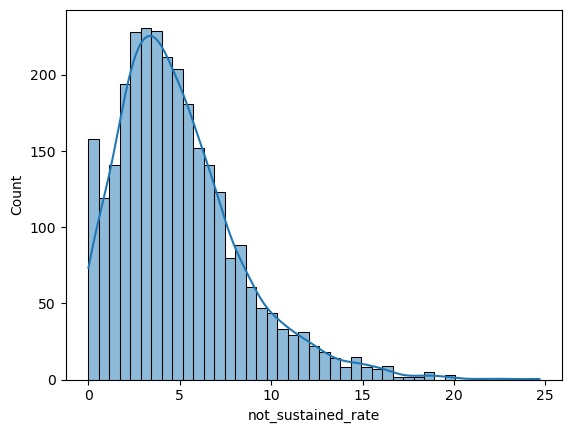

In [162]:
sns.histplot(data['not_sustained_rate'], kde=True );

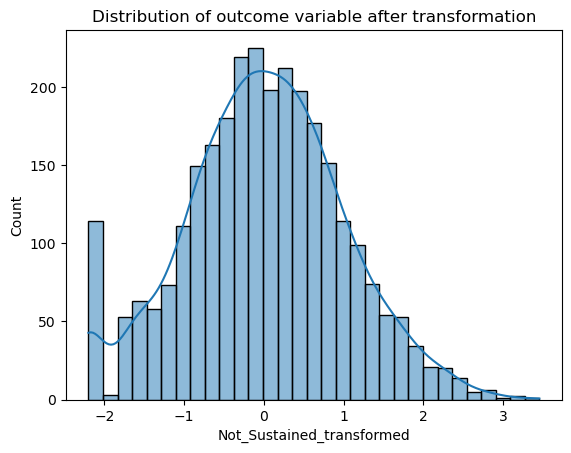

In [163]:
sns.histplot(data_transformed['Not_Sustained_transformed'], kde=True )
plt.title('Distribution of outcome variable after transformation');

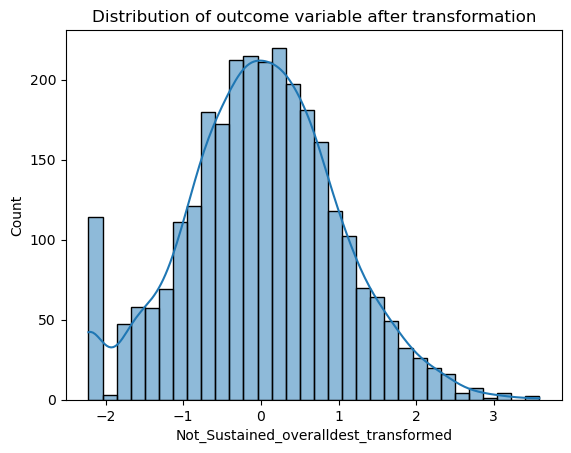

In [164]:
sns.histplot(data_transformed['Not_Sustained_overalldest_transformed'], kde=True )
plt.title('Distribution of outcome variable after transformation');

## Specify transformed variables

In [165]:
predictors = data_transformed[[
    'poly__headcount',
    'poly__headcount^2',
    'num__pupil_teacher_ratio',
    'num__assistant_teacher_ratio',
    'num__susp_rate',
    'poly__Progress_8',
    'poly__Progress_8^2',
    'cat_onehot__post16_0',
    'cat_onehot__faith_binary_1',
    'cat_onehot__single_sex_binary_1',
    'cat_ordinal__Ofsted_rating'
]]

In [166]:
predictors_controls = data_transformed[[
    'poly__headcount',
    'poly__headcount^2',
    'num__pupil_teacher_ratio',
    'num__assistant_teacher_ratio',
    'num__susp_rate',
    'poly__Progress_8',
    'poly__Progress_8^2',
    'cat_onehot__post16_0',
    'cat_onehot__faith_binary_1',
    'cat_onehot__single_sex_binary_1',
    'cat_ordinal__Ofsted_rating',

    # controls
    'num__FSM',
    'num__sen_support',
    'num__perc_boys',
    'num__White_British',
    'poly__Attainment_8',
    'poly__Attainment_8^2',
    'poly__KS2_history',
    'poly__KS2_history^2',
    'num__total_absence',
    'cat_ordinal__IMD',
    'cat_onehot__selective_1',
    'cat_onehot__urban_binary_0'
]]

## Predictors

In [167]:
x = sm.add_constant(predictors)

In [168]:
y = data_transformed['Not_Sustained_transformed']

In [169]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared:                       0.436
Model:                                   OLS   Adj. R-squared:                  0.434
Method:                        Least Squares   F-statistic:                     199.2
Date:                       Fri, 28 Feb 2025   Prob (F-statistic):               0.00
Time:                               14:08:31   Log-Likelihood:                -3220.4
No. Observations:                       2844   AIC:                             6465.
Df Residuals:                           2832   BIC:                             6536.
Df Model:                                 11                                         
Covariance Type:                   nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.2563      0.102      2.518      0.012       0.057       0.456
poly__headcount                    -0.0002      0.000     -1.540      0.124      -0.001    6.73e-05
poly__headcount^2                2.542e-08   6.39e-08      0.398      0.691   -9.99e-08    1.51e-07
num__pupil_teacher_ratio           -0.0804      0.014     -5.573      0.000      -0.109      -0.052
num__assistant_teacher_ratio        0.1249      0.015      8.089      0.000       0.095       0.155
num__susp_rate                      0.2774      0.017     16.127      0.000       0.244       0.311
poly__Progress_8                   -0.5028      0.035    -14.181      0.000      -0.572      -0.433
poly__Progress_8^2                 -0.0759      0.029     -2.663      0.008      -0.132      -0.020
cat_onehot__post16_0                0.2326      0.034      6.917      0.000       0.167       0.298
cat_onehot__faith_binary_1         -0.1752      0.037     -4.710      0.000      -0.248      -0.102
cat_onehot__single_sex_binary_1    -0.4205      0.051     -8.239      0.000      -0.521      -0.320
cat_ordinal__Ofsted_rating         -0.0130      0.013     -1.031      0.303      -0.038       0.012
==============================================================================
Omnibus:                       10.466   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               12.985
Skew:                           0.044   Prob(JB):                      0.00151
Kurtosis:                       3.319   Cond. No.                     1.21e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Predictors - overall dest

In [170]:
x = sm.add_constant(predictors)

In [171]:
y = data_transformed['Not_Sustained_overalldest_transformed']

In [172]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                     
=================================================================================================
Dep. Variable:     Not_Sustained_overalldest_transformed   R-squared:                       0.436
Model:                                               OLS   Adj. R-squared:                  0.433
Method:                                    Least Squares   F-statistic:                     198.7
Date:                                   Fri, 28 Feb 2025   Prob (F-statistic):               0.00
Time:                                           14:08:41   Log-Likelihood:                -3222.1
No. Observations:                                   2844   AIC:                             6468.
Df Residuals:                                       2832   BIC:                             6540.
Df Model:                                             11                                         
Covariance Type:                               nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.2622      0.102      2.575      0.010       0.063       0.462
poly__headcount                    -0.0003      0.000     -1.594      0.111      -0.001    5.87e-05
poly__headcount^2                2.893e-08    6.4e-08      0.452      0.651   -9.65e-08    1.54e-07
num__pupil_teacher_ratio           -0.0818      0.014     -5.671      0.000      -0.110      -0.054
num__assistant_teacher_ratio        0.1255      0.015      8.127      0.000       0.095       0.156
num__susp_rate                      0.2773      0.017     16.109      0.000       0.244       0.311
poly__Progress_8                   -0.5013      0.035    -14.130      0.000      -0.571      -0.432
poly__Progress_8^2                 -0.0731      0.029     -2.562      0.010      -0.129      -0.017
cat_onehot__post16_0                0.2294      0.034      6.821      0.000       0.163       0.295
cat_onehot__faith_binary_1         -0.1755      0.037     -4.715      0.000      -0.248      -0.102
cat_onehot__single_sex_binary_1    -0.4216      0.051     -8.256      0.000      -0.522      -0.321
cat_ordinal__Ofsted_rating         -0.0135      0.013     -1.067      0.286      -0.038       0.011
==============================================================================
Omnibus:                       17.539   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.692
Skew:                           0.063   Prob(JB):                     7.17e-06
Kurtosis:                       3.429   Cond. No.                     1.21e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Predictors and controls

In [173]:
x = sm.add_constant(predictors_controls)

In [174]:
y = data_transformed['Not_Sustained_transformed']

In [175]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Not_Sustained_transformed   R-squared:                       0.598
Model:                                   OLS   Adj. R-squared:                  0.595
Method:                        Least Squares   F-statistic:                     182.6
Date:                       Fri, 28 Feb 2025   Prob (F-statistic):               0.00
Time:                               14:08:48   Log-Likelihood:                -2738.4
No. Observations:                       2844   AIC:                             5525.
Df Residuals:                           2820   BIC:                             5668.
Df Model:                                 23                                         
Covariance Type:                   nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             -27.5165     21.223     -1.297      0.195     -69.132      14.099
poly__headcount                    -0.0002      0.000     -1.183      0.237      -0.000       0.000
poly__headcount^2                 5.13e-08    5.5e-08      0.933      0.351   -5.65e-08    1.59e-07
num__pupil_teacher_ratio            0.0261      0.013      2.033      0.042       0.001       0.051
num__assistant_teacher_ratio        0.0031      0.014      0.224      0.823      -0.024       0.030
num__susp_rate                      0.0511      0.017      3.033      0.002       0.018       0.084
poly__Progress_8                   -0.8010      0.209     -3.837      0.000      -1.210      -0.392
poly__Progress_8^2                 -0.1485      0.036     -4.150      0.000      -0.219      -0.078
cat_onehot__post16_0                0.1910      0.029      6.630      0.000       0.135       0.248
cat_onehot__faith_binary_1         -0.1378      0.033     -4.183      0.000      -0.202      -0.073
cat_onehot__single_sex_binary_1    -0.2219      0.047     -4.757      0.000      -0.313      -0.130
cat_ordinal__Ofsted_rating         -0.0177      0.011     -1.630      0.103      -0.039       0.004
num__FSM                            0.3928      0.023     16.748      0.000       0.347       0.439
num__sen_support                    0.0079      0.015      0.516      0.606      -0.022       0.038
num__perc_boys                      0.0253      0.013      2.012      0.044       0.001       0.050
num__White_British                  0.1646      0.017      9.445      0.000       0.130       0.199
poly__Attainment_8                 -0.0547      0.032     -1.716      0.086      -0.117       0.008
poly__Attainment_8^2                0.0012      0.000      4.463      0.000       0.001       0.002
poly__KS2_history                   0.7243      0.425      1.703      0.089      -0.110       1.558
poly__KS2_history^2                -0.0044      0.002     -2.094      0.036      -0.009      -0.000
num__total_absence                  0.0201      0.020      1.022      0.307      -0.018       0.059
cat_ordinal__IMD                   -0.0158      0.005     -2.897      0.004      -0.026      -0.005
cat_onehot__selective_1            -0.4031      0.124     -3.259      0.001      -0.646      -0.161
cat_onehot__urban_binary_0         -0.1171      0.039     -3.021      0.003      -0.193      -0.041
==============================================================================
Omnibus:                       16.750   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.704
Skew:                          -0.116   Prob(JB):                    

## Predictors and controls - overall dest

In [176]:
x = sm.add_constant(predictors_controls)

In [177]:
y = data_transformed['Not_Sustained_overalldest_transformed']

In [178]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                     
=================================================================================================
Dep. Variable:     Not_Sustained_overalldest_transformed   R-squared:                       0.600
Model:                                               OLS   Adj. R-squared:                  0.596
Method:                                    Least Squares   F-statistic:                     183.6
Date:                                   Fri, 28 Feb 2025   Prob (F-statistic):               0.00
Time:                                           14:08:53   Log-Likelihood:                -2733.7
No. Observations:                                   2844   AIC:                             5515.
Df Residuals:                                       2820   BIC:                             5658.
Df Model:                                             23                                         
Covariance Type:                               nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             -24.9614     21.188     -1.178      0.239     -66.508      16.585
poly__headcount                    -0.0002      0.000     -1.218      0.223      -0.000       0.000
poly__headcount^2                5.279e-08   5.49e-08      0.962      0.336   -5.48e-08     1.6e-07
num__pupil_teacher_ratio            0.0260      0.013      2.033      0.042       0.001       0.051
num__assistant_teacher_ratio        0.0026      0.014      0.188      0.851      -0.024       0.030
num__susp_rate                      0.0495      0.017      2.948      0.003       0.017       0.083
poly__Progress_8                   -0.8251      0.208     -3.959      0.000      -1.234      -0.416
poly__Progress_8^2                 -0.1458      0.036     -4.083      0.000      -0.216      -0.076
cat_onehot__post16_0                0.1891      0.029      6.574      0.000       0.133       0.246
cat_onehot__faith_binary_1         -0.1394      0.033     -4.237      0.000      -0.204      -0.075
cat_onehot__single_sex_binary_1    -0.2209      0.047     -4.745      0.000      -0.312      -0.130
cat_ordinal__Ofsted_rating         -0.0177      0.011     -1.629      0.103      -0.039       0.004
num__FSM                            0.3892      0.023     16.621      0.000       0.343       0.435
num__sen_support                    0.0072      0.015      0.472      0.637      -0.023       0.037
num__perc_boys                      0.0256      0.013      2.035      0.042       0.001       0.050
num__White_British                  0.1570      0.017      9.021      0.000       0.123       0.191
poly__Attainment_8                 -0.0511      0.032     -1.605      0.109      -0.114       0.011
poly__Attainment_8^2                0.0012      0.000      4.409      0.000       0.001       0.002
poly__KS2_history                   0.6783      0.425      1.597      0.110      -0.154       1.511
poly__KS2_history^2                -0.0042      0.002     -2.005      0.045      -0.008   -9.38e-05
num__total_absence                  0.0208      0.020      1.061      0.289      -0.018       0.059
cat_ordinal__IMD                   -0.0156      0.005     -2.871      0.004      -0.026      -0.005
cat_onehot__selective_1            -0.4180      0.123     -3.385      0.001      -0.660      -0.176
cat_onehot__urban_binary_0         -0.1154      0.039     -2.982      0.003      -0.191      -0.040
==============================================================================
Omnibus:                       20.807   Durbin-Watson:                   1.887
Prob(Omnibus):  

In [179]:
vif_values = pd.DataFrame()
vif_values['predictor'] = x.columns

vif_values['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif_values = vif_values.sort_values(by='VIF')
vif_values

predictor            VIF
11       cat_ordinal__Ofsted_rating       1.079394
14                   num__perc_boys       1.112488
9        cat_onehot__faith_binary_1       1.133440
3          num__pupil_teacher_ratio       1.154618
23       cat_onehot__urban_binary_0       1.291300
4      num__assistant_teacher_ratio       1.332033
8              cat_onehot__post16_0       1.359758
10  cat_onehot__single_sex_binary_1       1.516736
13                 num__sen_support       1.627029
21                 cat_ordinal__IMD       1.652484
5                    num__susp_rate       1.989819
15               num__White_British       2.132683
7                poly__Progress_8^2       2.454481
20               num__total_absence       2.711484
12                         num__FSM       3.861996
22          cat_onehot__selective_1       5.265155
2                 poly__headcount^2      19.090823
1                   poly__headcount      20.549587
6                  poly__Progress_8      73.465556
17             poly__Attainment_8^2     469.580387
16               poly__Attainment_8     584.297802
18                poly__KS2_history   10902.732975
19              poly__KS2_history^2   12035.796130
0                             const 3162325.756200

## Predictors and controls - drop high VIF

In [190]:
predictors_controls_low_vif = predictors_controls.drop(columns=['poly__KS2_history^2', 'poly__KS2_history', 
                                                               'poly__Attainment_8^2', 'poly__Attainment_8',
                                                               'poly__headcount', 'poly__headcount^2'
                                                               ]).copy()

In [191]:
x = sm.add_constant(predictors_controls_low_vif)

In [192]:
y = data_transformed['Not_Sustained_overalldest_transformed']

In [193]:
# fit the model
model = sm.OLS(y, x).fit()

# make the predictions by the model
predictions = model.predict(x) 

# print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                     
=================================================================================================
Dep. Variable:     Not_Sustained_overalldest_transformed   R-squared:                       0.582
Model:                                               OLS   Adj. R-squared:                  0.579
Method:                                    Least Squares   F-statistic:                     231.2
Date:                                   Fri, 28 Feb 2025   Prob (F-statistic):               0.00
Time:                                           14:09:50   Log-Likelihood:                -2795.9
No. Observations:                                   2844   AIC:                             5628.
Df Residuals:                                       2826   BIC:                             5735.
Df Model:                                             17                                         
Covariance Type:                               nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.0967      0.035      2.765      0.006       0.028       0.165
num__pupil_teacher_ratio            0.0212      0.013      1.645      0.100      -0.004       0.047
num__assistant_teacher_ratio        0.0234      0.014      1.690      0.091      -0.004       0.051
num__susp_rate                      0.0657      0.017      3.856      0.000       0.032       0.099
poly__Progress_8                   -0.1806      0.036     -4.987      0.000      -0.252      -0.110
poly__Progress_8^2                 -0.0108      0.025     -0.436      0.663      -0.060       0.038
cat_onehot__post16_0                0.2050      0.027      7.477      0.000       0.151       0.259
cat_onehot__faith_binary_1         -0.1432      0.033     -4.330      0.000      -0.208      -0.078
cat_onehot__single_sex_binary_1    -0.2409      0.046     -5.183      0.000      -0.332      -0.150
cat_ordinal__Ofsted_rating         -0.0160      0.011     -1.467      0.142      -0.037       0.005
num__FSM                            0.4624      0.022     20.812      0.000       0.419       0.506
num__sen_support                    0.0362      0.015      2.387      0.017       0.006       0.066
num__perc_boys                      0.0260      0.013      2.040      0.041       0.001       0.051
num__White_British                  0.1424      0.017      8.237      0.000       0.109       0.176
num__total_absence                  0.0654      0.019      3.365      0.001       0.027       0.103
cat_ordinal__IMD                   -0.0156      0.006     -2.836      0.005      -0.026      -0.005
cat_onehot__selective_1            -0.4081      0.071     -5.763      0.000      -0.547      -0.269
cat_onehot__urban_binary_0         -0.0839      0.038     -2.222      0.026      -0.158      -0.010
==============================================================================
Omnibus:                       21.918   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.249
Skew:                          -0.046   Prob(JB):                     9.93e-08
Kurtosis:                       3.514   Cond. No.                         33.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [194]:
vif_values = pd.DataFrame()
vif_values['predictor'] = x.columns

vif_values['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif_values = vif_values.sort_values(by='VIF')
vif_values

predictor      VIF
9        cat_ordinal__Ofsted_rating 1.047189
7        cat_onehot__faith_binary_1 1.098989
12                   num__perc_boys 1.100111
1          num__pupil_teacher_ratio 1.125191
5                poly__Progress_8^2 1.138544
17       cat_onehot__urban_binary_0 1.179754
6              cat_onehot__post16_0 1.184683
2      num__assistant_teacher_ratio 1.294059
8   cat_onehot__single_sex_binary_1 1.449886
11                 num__sen_support 1.557651
15                 cat_ordinal__IMD 1.635635
16          cat_onehot__selective_1 1.660529
3                    num__susp_rate 1.958640
13               num__White_British 2.019701
4                  poly__Progress_8 2.127756
14               num__total_absence 2.548643
10                         num__FSM 3.335296
0                             const 8.264168

## Visualisations

### Residuals

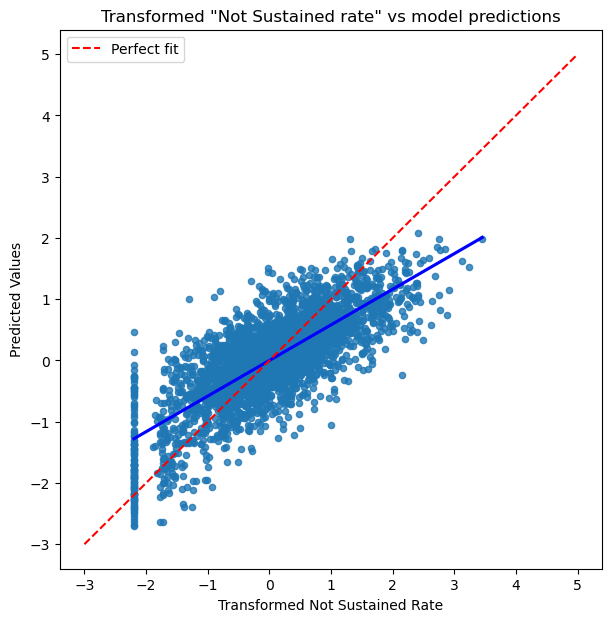

In [195]:
fig, ax = plt.subplots(figsize=(7,7))
sns.regplot(x=data_transformed['Not_Sustained_transformed'], 
            y=model.fittedvalues, 
            ax=ax, 
            scatter_kws={'s': 20}, 
            line_kws={'color': 'blue'}, 
            ci=None
           )

plt.plot([-3, 5], 
         [-3, 5], 
         color='red', linestyle='--', label='Perfect fit')


plt.title('Transformed "Not Sustained rate" vs model predictions')
plt.xlabel('Transformed Not Sustained Rate')
plt.ylabel('Predicted Values')
plt.legend();

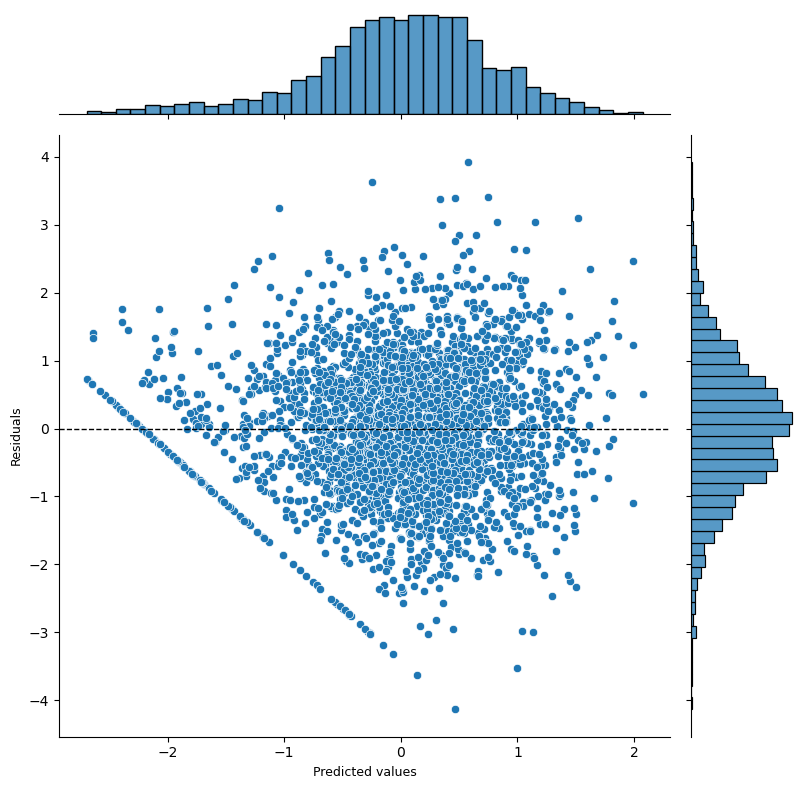

In [196]:
# create jointplot
g = sns.jointplot(x=model.fittedvalues, y=model.resid_pearson, kind='scatter', height=8)

# access the scatter plot part of the jointplot
ax = g.ax_joint

# add a horizontal line at y=0
ax.axhline(0, color='black', linestyle='--', linewidth=1)

g.set_axis_labels('Predicted values', 'Residuals', fontsize=9);

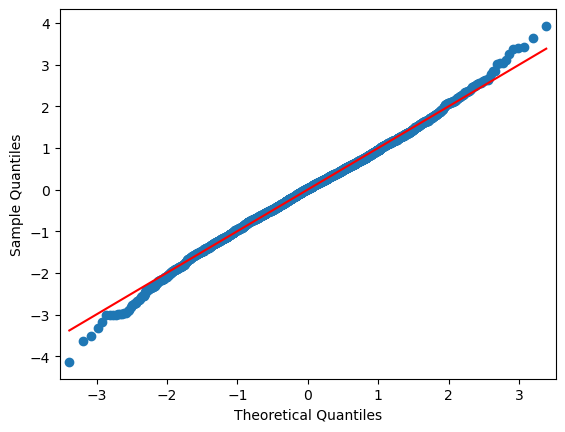

In [197]:
qqplot(model.resid_pearson, line='r');

### Correlation matrix

In [198]:
vars = x.columns.tolist()
vars = vars[1:]
vars

['num__pupil_teacher_ratio',
 'num__assistant_teacher_ratio',
 'num__susp_rate',
 'poly__Progress_8',
 'poly__Progress_8^2',
 'cat_onehot__post16_0',
 'cat_onehot__faith_binary_1',
 'cat_onehot__single_sex_binary_1',
 'cat_ordinal__Ofsted_rating',
 'num__FSM',
 'num__sen_support',
 'num__perc_boys',
 'num__White_British',
 'num__total_absence',
 'cat_ordinal__IMD',
 'cat_onehot__selective_1',
 'cat_onehot__urban_binary_0']

In [199]:
vars_for_corr = data_transformed[vars]

In [200]:
# save variables for correlation matrix
corr = vars_for_corr.corr(method='kendall')

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
np.fill_diagonal(mask, False)

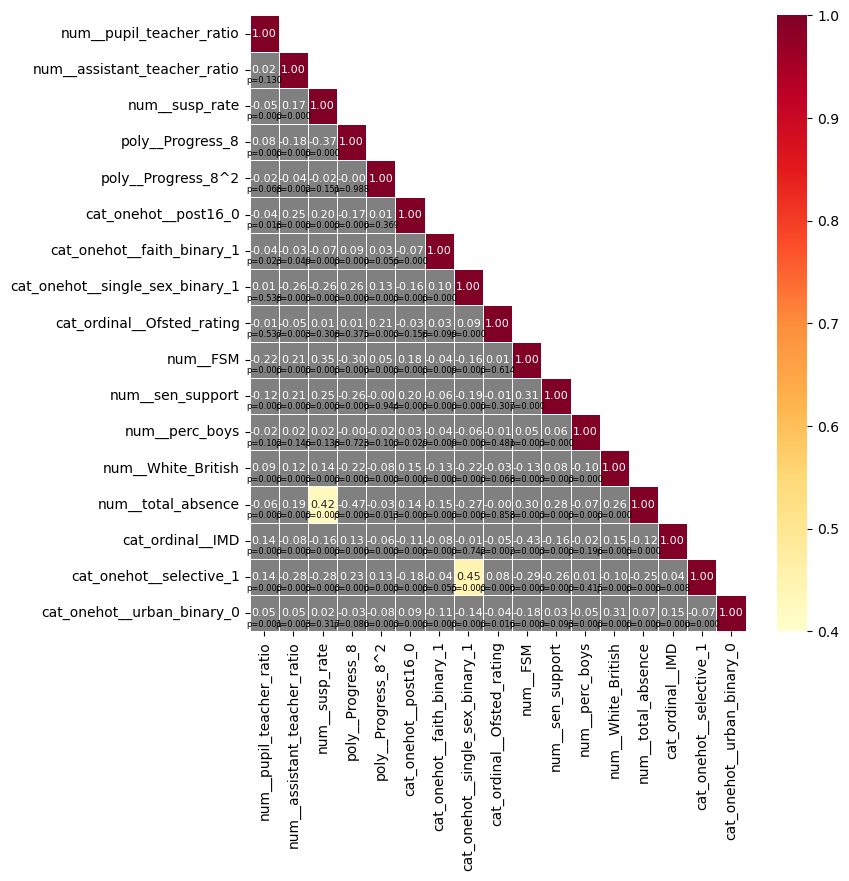

In [201]:
# set colour map for pos 
my_cmap = copy(plt.cm.YlOrRd)
my_cmap.set_over("grey")
my_cmap.set_under("grey")

# positive correlations
f, ax = plt.subplots(figsize=(8,8)) 

g = sns.heatmap(corr,
    vmin=0.4,
    vmax=1,
    cmap=my_cmap,
    linewidths=0.5,
    #linecolor="grey",
    annot = True,
    annot_kws={"fontsize": 8},
    fmt = '.2f',
    ax=ax,
    mask=mask)

# calculate p-values
p_values = np.full((corr.shape[0], corr.shape[1]), np.nan)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[1]):
        x = vars_for_corr.iloc[:, i]
        y = vars_for_corr.iloc[:, j]
        p_values[i, j] = kendalltau(x, y)[1]

p_values = pd.DataFrame(p_values, columns=corr.columns, index=corr.index)

max_corr = np.max(corr.max())
min_corr = np.min(corr.min())

for i in range (p_values.shape[0]):
    for j in range(p_values.shape[1]):
        p_value = p_values.iloc[i, j]
        if not np.isnan(p_value):
            correlation_value = corr.iloc[i, j]
            text_color = 'black' if p_value >= 0.001 else 'black'
            ax.text(i+0.5, j+0.8, f'p={p_value:.3f}',
                    horizontalalignment = 'center',
                    verticalalignment = 'center',
                    fontsize = 6,
                    color = text_color)


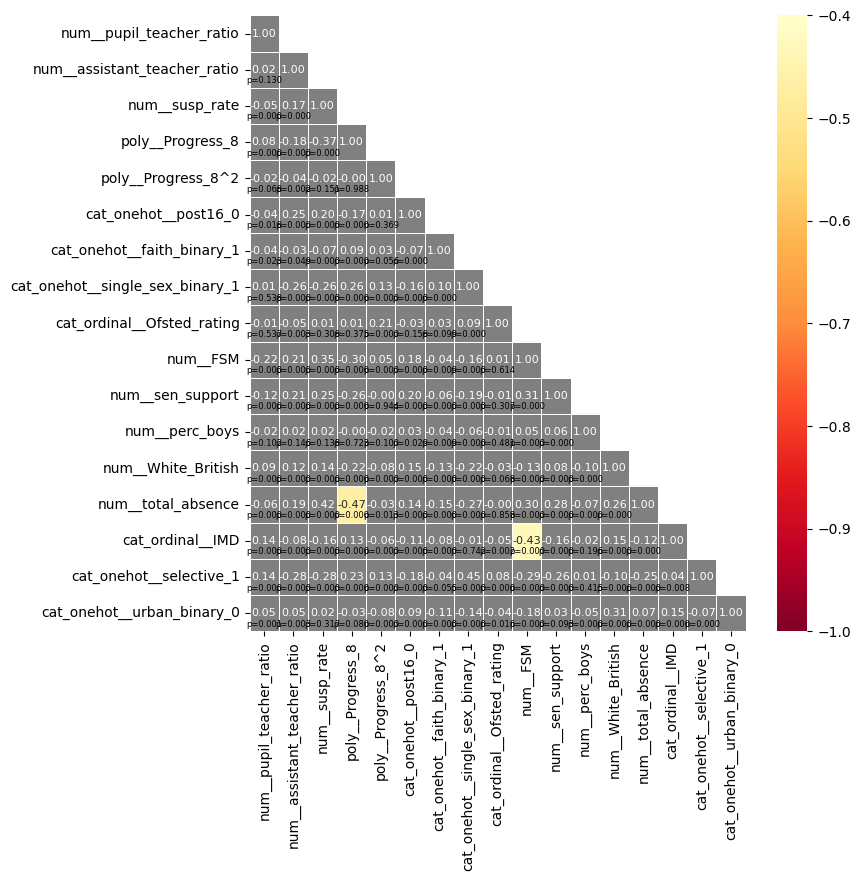

In [202]:
# set colour map for neg 
my_cmap_r = copy(plt.cm.YlOrRd_r)
my_cmap_r.set_over("grey")
my_cmap_r.set_under("grey")

# negative correlations
f, ax = plt.subplots(figsize=(8,8)) 

g = sns.heatmap(corr,
    vmin=-1,
    vmax=-0.4,
    cmap=my_cmap_r,
    linewidths=0.5,
    #linecolor="grey",
    annot = True,
    annot_kws={"fontsize": 8},
    fmt = '.2f',
    ax=ax,
    mask=mask)

# calculate p-values
p_values = np.full((corr.shape[0], corr.shape[1]), np.nan)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[1]):
        x = vars_for_corr.iloc[:, i]
        y = vars_for_corr.iloc[:, j]
        p_values[i, j] = kendalltau(x, y)[1]

p_values = pd.DataFrame(p_values, columns=corr.columns, index=corr.index)

max_corr = np.max(corr.max())
min_corr = np.min(corr.min())

for i in range (p_values.shape[0]):
    for j in range(p_values.shape[1]):
        p_value = p_values.iloc[i, j]
        if not np.isnan(p_value):
            correlation_value = corr.iloc[i, j]
            text_color = 'black' if p_value >= 0.001 else 'black'
            ax.text(i+0.5, j+0.8, f'p={p_value:.3f}',
                    horizontalalignment = 'center',
                    verticalalignment = 'center',
                    fontsize = 6,
                    color = text_color)

### Coefficient Plot

In [203]:
# extract coefficients and confidence intervals
coef = model.params
conf = model.conf_int()
sig = model.pvalues

# df for plotting
coef_df = pd.DataFrame({
    'Coefficient': coef,
    'Lower CI': conf[0],
    'Upper CI': conf[1],
    'p-value': sig
}).reset_index().rename(columns={'index': 'Predictor'})

coef_df = coef_df[coef_df['Predictor'] != 'const']

# sort values
coef_df = coef_df.sort_values(by='Coefficient')

# rename labels using dictionary
#coef_df['Predictor'] = coef_df['Predictor'].map(reg_names)
coef_df

Predictor  Coefficient  Lower CI  Upper CI  p-value
16          cat_onehot__selective_1    -0.408066 -0.546908 -0.269224 0.000000
8   cat_onehot__single_sex_binary_1    -0.240906 -0.332051 -0.149760 0.000000
4                  poly__Progress_8    -0.180593 -0.251603 -0.109583 0.000001
7        cat_onehot__faith_binary_1    -0.143189 -0.208030 -0.078348 0.000015
17       cat_onehot__urban_binary_0    -0.083921 -0.157986 -0.009856 0.026380
9        cat_ordinal__Ofsted_rating    -0.016002 -0.037384  0.005379 0.142355
15                 cat_ordinal__IMD    -0.015644 -0.026459 -0.004829 0.004595
5                poly__Progress_8^2    -0.010839 -0.059532  0.037853 0.662513
1          num__pupil_teacher_ratio     0.021224 -0.004080  0.046527 0.100153
2      num__assistant_teacher_ratio     0.023390 -0.003745  0.050526 0.091108
12                   num__perc_boys     0.026031  0.001011  0.051051 0.041441
11                 num__sen_support     0.036240  0.006468  0.066011 0.017061
14               num__total_absence     0.065352  0.027270  0.103435 0.000776
3                    num__susp_rate     0.065657  0.032272  0.099041 0.000118
13               num__White_British     0.142413  0.108512  0.176314 0.000000
6              cat_onehot__post16_0     0.204987  0.151228  0.258746 0.000000
10                         num__FSM     0.462406  0.418842  0.505971 0.000000

In [204]:
coef_df_sig = coef_df.loc[coef_df['p-value'] <0.05].copy()
coef_df_sig

Predictor  Coefficient  Lower CI  Upper CI  p-value
16          cat_onehot__selective_1    -0.408066 -0.546908 -0.269224 0.000000
8   cat_onehot__single_sex_binary_1    -0.240906 -0.332051 -0.149760 0.000000
4                  poly__Progress_8    -0.180593 -0.251603 -0.109583 0.000001
7        cat_onehot__faith_binary_1    -0.143189 -0.208030 -0.078348 0.000015
17       cat_onehot__urban_binary_0    -0.083921 -0.157986 -0.009856 0.026380
15                 cat_ordinal__IMD    -0.015644 -0.026459 -0.004829 0.004595
12                   num__perc_boys     0.026031  0.001011  0.051051 0.041441
11                 num__sen_support     0.036240  0.006468  0.066011 0.017061
14               num__total_absence     0.065352  0.027270  0.103435 0.000776
3                    num__susp_rate     0.065657  0.032272  0.099041 0.000118
13               num__White_British     0.142413  0.108512  0.176314 0.000000
6              cat_onehot__post16_0     0.204987  0.151228  0.258746 0.000000
10                         num__FSM     0.462406  0.418842  0.505971 0.000000

In [205]:
reg_names = {
    'cat_onehot__single_sex_binary_1': 'Single-sex',
    'cat_onehot__selective_1' : 'Selective',
    'cat_onehot__urban_binary_0' : 'Rural',
    'cat_onehot__faith_binary_1' : 'Faith',
    'poly__Progress_8' : 'Progress 8',
    'cat_ordinal__IMD' : 'IMD of LSOA',
    'num__perc_boys' : 'Boys %',
    'num__sen_support' : 'SEN support %',
    'num__susp_rate' : 'Suspensions %',
    'num__total_absence' : 'Absence %',
    'num__White_British' : 'White British %',
    'cat_onehot__post16_0' : 'No Post-16',
    'num__FSM' : 'FSM %'  
}

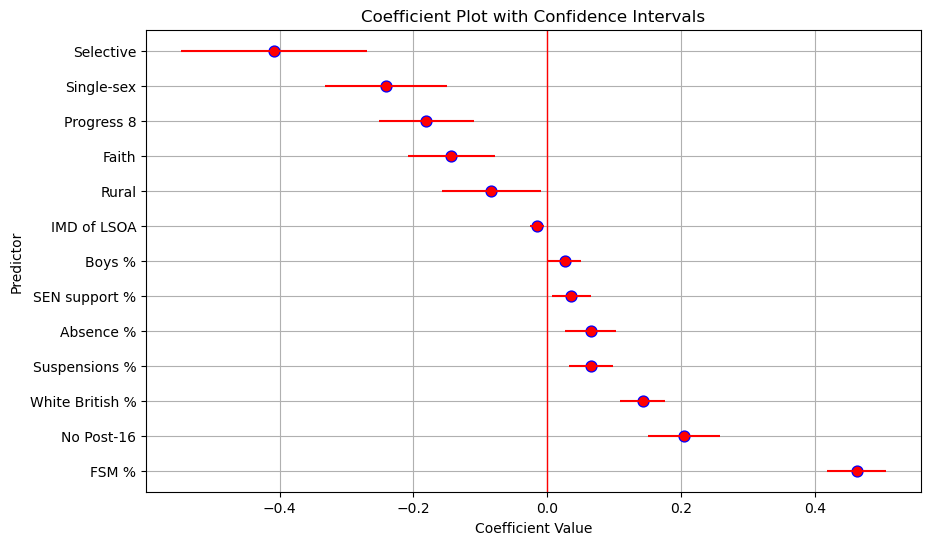

In [206]:
# rename labels using dictionary
coef_df_sig['Predictor'] = coef_df_sig['Predictor'].map(reg_names)

# plot
plt.figure(figsize=(10, 6))
sns.pointplot(x='Coefficient', y='Predictor', data=coef_df_sig, linestyle='none', markers='o', color='blue')
plt.errorbar(coef_df_sig['Coefficient'], coef_df_sig['Predictor'], 
             xerr=[coef_df_sig['Coefficient'] - coef_df_sig['Lower CI'], coef_df_sig['Upper CI'] - coef_df_sig['Coefficient']], 
             fmt='o', color='red')

# add a vertical line at x=0
ax = plt.gca() # get current axis
ax.axvline(0, color='red', linestyle='-', linewidth=1)

plt.title('Coefficient Plot with Confidence Intervals')
plt.xlabel('Coefficient Value')
plt.ylabel('Predictor')
plt.grid(True)
plt.show()

# Add predictions and residuals to dataframe

In [207]:
data['predictions'] = model.fittedvalues

In [208]:
data['residuals'] = model.resid_pearson

Residuals: positive values indicate true value is higher than the model predicts. Negative values that the true value is lower. 

In [209]:
data.describe()

URN  not_sustained_rate  not_sustained_rate_overalldest  \
count   2844.000000         2844.000000                     2844.000000   
mean  133385.890647            4.948119                        5.435152   
std    12031.150864            3.396624                        4.067851   
min   100049.000000            0.000000                        0.000000   
25%   135594.500000            2.515284                        2.616336   
50%   137239.500000            4.306220                        4.573296   
75%   139792.250000            6.630539                        7.246377   
max   148702.000000           24.675325                       33.628319   

       total_absence  persistent_absence         FSM  White_British  \
count    2844.000000         2844.000000 2844.000000    2844.000000   
mean        9.073101           27.990436   22.802180      65.034529   
std         2.222155            8.600415   12.524634      29.219730   
min         2.100000            1.500000    0.600000       0.000000   
25%         7.600000           22.500000   13.100000      46.300000   
50%         9.000000           28.100000   20.700000      76.800000   
75%        10.300000           33.500000   30.400000      88.425000   
max        20.300000           61.300000   74.700000      98.800000   

              EAL   perc_boys   headcount  perm_excl_rate   susp_rate  \
count 2844.000000 2844.000000 2844.000000     2844.000000 2844.000000   
mean    17.134459   50.393302 1100.951828        0.179476   15.248957   
std     18.854479   16.588844  386.888170        0.256673   18.057175   
min      0.000000    0.000000   86.000000        0.000000    0.000000   
25%      3.700000   49.084560  835.000000        0.000000    5.330600   
50%      8.900000   50.930263 1067.000000        0.091660    9.993600   
75%     24.025000   52.989243 1347.250000        0.258483   18.575187   
max     93.300000  100.000000 2795.000000        2.222220  255.033560   

       one_plus_susp_rate  KS4_headcount  KS2_history  Attainment_8  \
count         2844.000000    2844.000000  2844.000000   2844.000000   
mean             6.477211     180.996132   103.779993     49.623453   
std              4.508471      61.640713     2.930594      9.044674   
min              0.000000      14.000000    93.100000      9.000000   
25%              3.425613     139.000000   102.000000     43.800000   
50%              5.408115     177.000000   103.500000     48.600000   
75%              8.560778     220.250000   105.000000     54.100000   
max             33.154360     450.000000   117.400000     88.200000   

       Progress_8   selective  KS4_pass_rate      post16  Ofsted_rating  \
count 2844.000000 2844.000000    2844.000000 2844.000000    2844.000000   
mean    -0.002057    0.051688      27.080520    0.629395       0.728200   
std      0.490100    0.221435      19.421248    0.483052       1.141871   
min     -4.090000    0.000000       0.000000    0.000000       0.000000   
25%     -0.310000    0.000000      12.000000    0.000000       0.000000   
50%     -0.010000    0.000000      23.000000    1.000000       0.000000   
75%      0.330000    0.000000      37.000000    1.000000       2.000000   
max      2.270000    1.000000      99.000000    1.000000       3.000000   

       sen_support        ehcp         IMD  pupil_teacher_ratio  \
count  2844.000000 2844.000000 2844.000000          2844.000000   
mean     12.408393    2.294037    5.651195            16.770499   
std       5.423849    1.570291    2.821454             2.232390   
min       0.167084    0.000000    1.000000             5.200000   
25%       8.811344    1.269372    3.000000            15.600000   
50%      12.122955    2.000000    6.000000            16.700000   
75%      15.680605    2.953790    8.000000            17.900000   
max      40.191388   17.114094   10.000000            40.300000   

       assistant_teacher_ratio  absence_rate_non_excl  single_sex_binary  \
count              2844.000000            2844

In [210]:
data.head()

URN  not_sustained_rate  not_sustained_rate_overalldest  total_absence  \
1  138116            4.065041                        4.310345      15.400000   
2  137899            1.739130                        1.777778       7.700000   
3  146639           11.864407                       13.461538       9.700000   
4  137603            2.586207                        2.690583       8.100000   
5  140865            3.717472                        3.921569      10.900000   

   persistent_absence              urban_rural denomination       FSM  \
1           47.300000    Rural town and fringe     No faith 29.000000   
2           23.300000  Urban minor conurbation     No faith 13.200000   
3           31.200000  Urban minor conurbation     No faith 44.100000   
4           26.700000  Urban minor conurbation     No faith 15.600000   
5           35.700000  Urban minor conurbation    Christian 20.700000   

   White_British       EAL  perc_boys               region_name  \
1      94.000000  2.300000  47.969543  Yorkshire and The Humber   
2      89.700000  3.800000  49.004975  Yorkshire and The Humber   
3      91.000000  4.800000  50.931677  Yorkshire and The Humber   
4      91.400000  3.600000  48.567335  Yorkshire and The Humber   
5      62.200000 15.900000  48.205823  Yorkshire and The Humber   

                        school_name   headcount  perm_excl_rate  susp_rate  \
1                Campsmount Academy  788.000000        0.253810  41.624370   
2                 Hungerhill School 1206.000000        0.331670  14.510780   
3                The Laurel Academy  644.000000        0.000000  44.565220   
4                  Ridgewood School 1396.000000        0.071630  12.320920   
5  The McAuley Catholic High School 1477.000000        0.270820  12.119160   

   one_plus_susp_rate  KS4_headcount  KS2_history  Attainment_8  Progress_8  \
1           14.213200     143.000000   102.100000     37.500000   -0.900000   
2            7.213930     249.000000   103.000000     51.100000    0.330000   
3           14.130430     121.000000   101.000000     45.800000    0.160000   
4            6.375360     238.000000   104.600000     48.600000   -0.270000   
5            6.093430     262.000000   102.900000     45.500000   -0.180000   

   selective  KS4_pass_rate POSTCODE  post16 school_sex                 type  \
1          0       5.000000  DN6 9AS       1      Mixed    Academy converter   
2          0      38.000000  DN3 2JY       0      Mixed    Academy converter   
3          0       7.000000  S64 9SD       0      Mixed  Academy sponsor led   
4          0      11.000000  DN5 7UB       1      Mixed    Academy converter   
5          0      12.000000  DN3 3QF       1      Mixed    Academy converter   

   Ofsted_rating  sen_support     ehcp     LSOA11      IMD  \
1       3.000000    13.705584 2.157360  E01007493 7.000000   
2       2.000000    11.691542 1.326700  E01007478 4.000000   
3       0.000000     9.472050 0.931677  E01007583 5.000000   
4       0.000000    12.607450 1.289398  E01007588 5.000000   
5       3.000000    10.494245 1.150982  E01007603 9.000000   

   pupil_teacher_ratio  assistant_teacher_ratio  absence_rate_non_excl  \
1            13.700000                 0.400000              14.964096   
2            17.300000                 0.200000               7.599267   
3            19.900000                 0.300000               9.303709   
4            16.300000                 0.200000               7.938303   
5            15.700000                 0.100000              10.667389   

   single_sex_binary  faith_binary region_new  urban_binary Ofsted_num  \
1                  0             0      North             0          2   
2                  0             0      North             1          4   
3                  0             0      North             1          3   
4                  0             0      North             1          3   
5                  0             1      North             1          2

In [211]:
#data.to_csv('predictions_residuals.csv', index=False)

### Visualise residuals

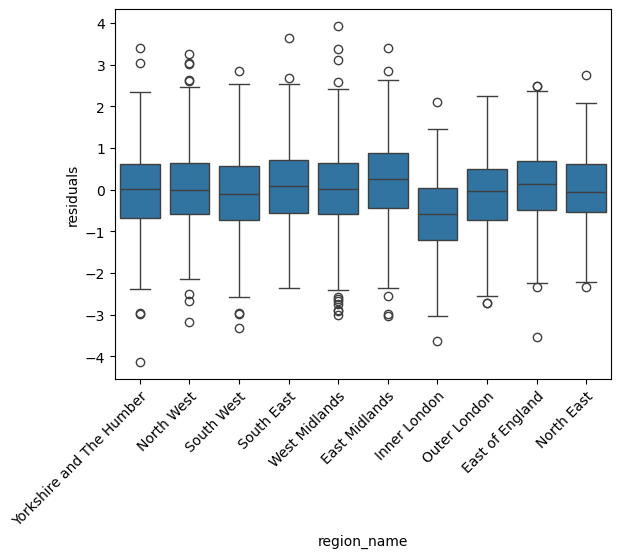

In [212]:
sns.boxplot(data=data, x='region_name', y='residuals')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

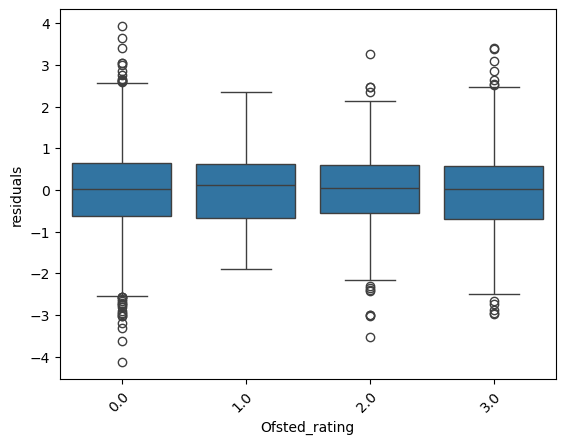

In [213]:
sns.boxplot(data=data, x='Ofsted_rating', y='residuals')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

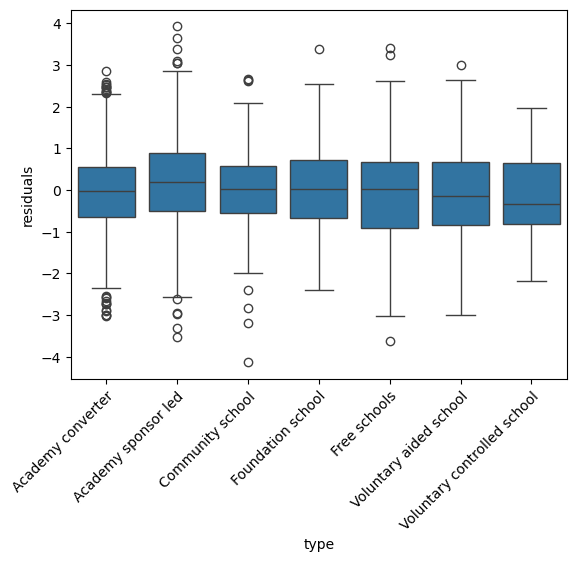

In [214]:
sns.boxplot(data=data, x='type', y='residuals')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

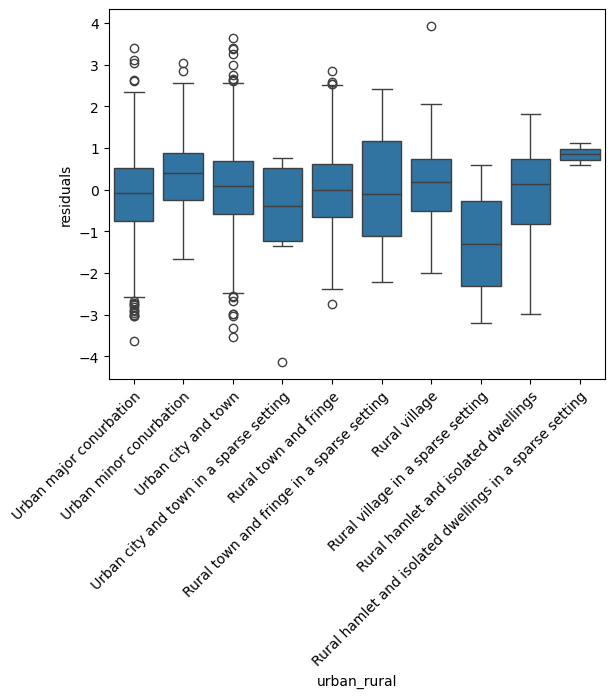

In [215]:
sns.boxplot(data=data, x='urban_rural', y='residuals')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor');

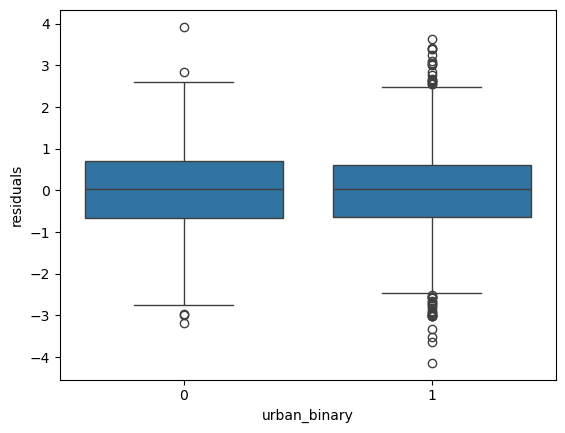

In [216]:
sns.boxplot(data=data, x='urban_binary', y='residuals');

# Mapping residuals

### By school

In [217]:
import geopandas as gpd
import contextily as ctx

In [218]:
coords = pd.read_csv('data_with_coordinates.csv', index_col=0)

In [219]:
coords = coords[['URN', 'Easting', 'Northing']].copy()

In [220]:
coords

URN       Easting      Northing
0     137181 526867.000000 184105.000000
1     100049 528159.000000 184498.000000
2     100050 528369.000000 186019.000000
3     100051 529555.000000 183356.000000
4     100052 524402.000000 185633.000000
...      ...           ...           ...
3141  137251 368104.000000 521037.000000
3142  137338 338127.000000 478474.000000
3143  136357 360707.000000 478609.000000
3144  141106 321416.000000 471354.000000
3145  135940 320952.000000 469650.000000

[3146 rows x 3 columns]

In [221]:
data_with_coords = data.merge(coords, how='left', on='URN')

In [222]:
data_with_coords['residuals'].describe()

count   2844.000000
mean       0.000000
std        0.997006
min       -4.135716
25%       -0.634269
50%        0.023282
75%        0.627605
max        3.926834
Name: residuals, dtype: float64

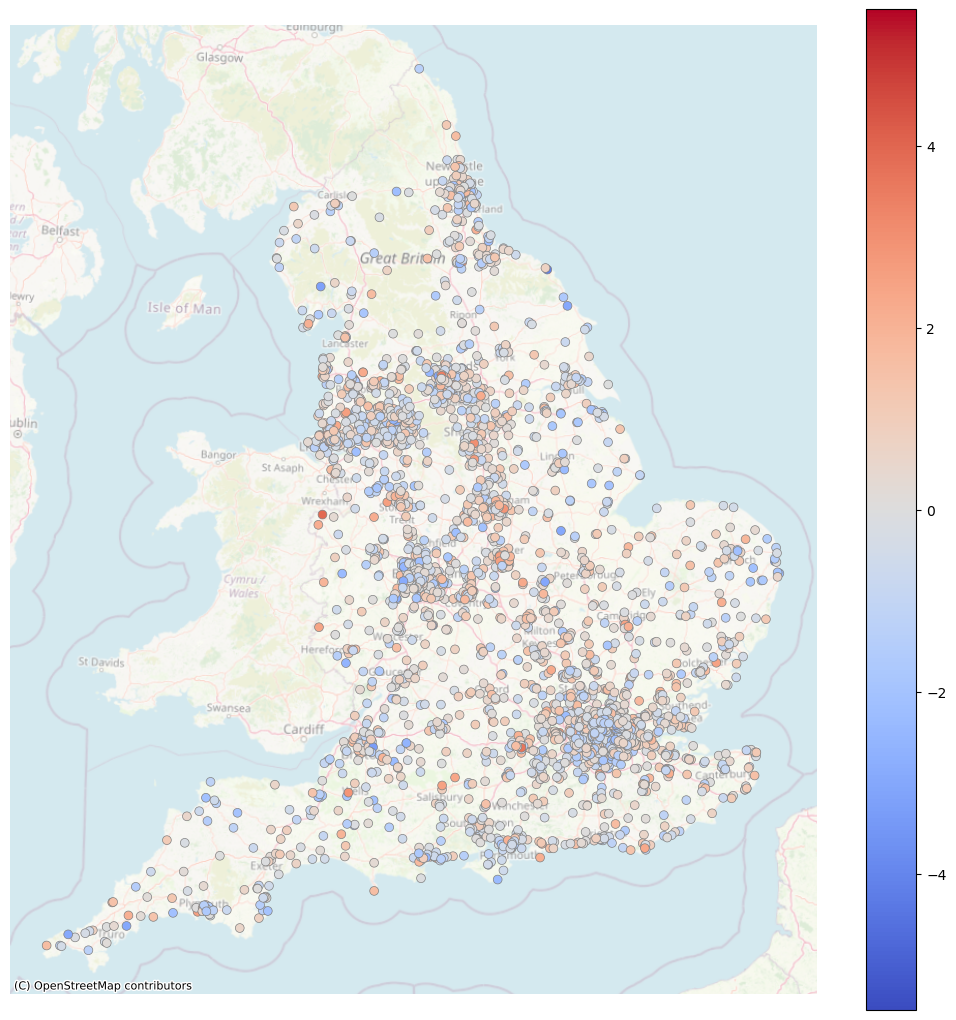

In [223]:
gdf = gpd.GeoDataFrame(
    data_with_coords,
    geometry = gpd.points_from_xy(data_with_coords['Easting'], data_with_coords['Northing']),
    crs = 'EPSG:27700'
)

fig, ax = plt.subplots(figsize=(13, 13))
gdf.plot(ax=ax, 
         column='residuals', 
         markersize=40, 
         cmap="coolwarm",
         edgecolor='grey',
         linewidth = 0.5,
         vmin=-5.5,
         vmax=5.5,
        legend=True)

ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik, alpha=0.5)

ax.set_axis_off()
plt.show();

### Groupby LA

In [224]:
la_code = pd.read_csv('model_data/la_code.csv', index_col=0)

In [225]:
la_code = la_code[['URN', 'la_name', 'district_administrative_name', 'district_administrative_code']]

In [226]:
la_code

URN                 la_name district_administrative_name  \
1      100000          City of London               City of London   
2      100001          City of London               City of London   
3      100002          City of London               City of London   
4      100003          City of London               City of London   
5      100005                  Camden                       Camden   
...       ...                     ...                          ...   
24438  149557               Wiltshire                    Wiltshire   
24439  149632  Kensington and Chelsea       Kensington and Chelsea   
24440  149633                Cornwall                     Cornwall   
24441  149635           Wolverhampton                Wolverhampton   
24442  149636                 Norfolk                    Breckland   

      district_administrative_code  
1                        E09000001  
2                        E09000001  
3                        E09000001  
4                        E09000001  
5                        E09000007  
...                            ...  
24438                    E06000054  
24439                    E09000020  
24440                    E06000052  
24441                    E08000031  
24442                    E07000143  

[24442 rows x 4 columns]

In [227]:
data_residuals = data[['URN', 'residuals']]

In [228]:
data_residuals

URN  residuals
1     138116  -1.247694
2     137899  -1.468402
3     146639   0.740794
4     137603  -0.927474
5     140865   0.023016
...      ...        ...
3134  135531  -1.236361
3135  141931   0.198831
3136  100502  -1.042330
3138  140212   0.897913
3139  100503  -1.044272

[2844 rows x 2 columns]

In [229]:
data_la = data_residuals.merge(la_code, how='left', on='URN')

In [230]:
data_la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2844 entries, 0 to 2843
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URN                           2844 non-null   int64  
 1   residuals                     2844 non-null   float64
 2   la_name                       2844 non-null   object 
 3   district_administrative_name  2844 non-null   object 
 4   district_administrative_code  2844 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 111.2+ KB


In [231]:
la_residuals = data_la.groupby('district_administrative_code')['residuals'].mean()

In [232]:
la_residuals = pd.DataFrame(la_residuals)
la_residuals = la_residuals.reset_index()

In [233]:
la_residuals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   district_administrative_code  307 non-null    object 
 1   residuals                     307 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.9+ KB


la map source: 

In [234]:
map = gpd.read_file('infuse_dist_lyr_2011.shp')

<Axes: >

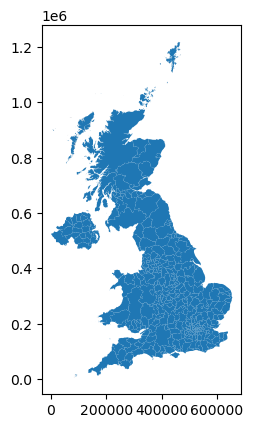

In [235]:
map.plot()

In [236]:

map[map['name'].str.contains('Cornwall')]

geo_code                 geo_label geo_labelw               label  \
51  E41000052  Cornwall,Isles of Scilly       None  E92000001E41000052   

                        name  \
51  Cornwall,Isles of Scilly   

                                             geometry  
51  MULTIPOLYGON (((185900.5 33613.7, 185894.609 3...

In [237]:
england = map[map['geo_code'].str.startswith('E')]

In [238]:
england

geo_code         geo_label geo_labelw               label  \
3    E07000138           Lincoln       None  E92000001E07000138   
4    E07000166     Richmondshire       None  E92000001E07000166   
5    E07000105           Ashford       None  E92000001E07000105   
8    E08000034          Kirklees       None  E92000001E08000034   
9    E07000126      South Ribble       None  E92000001E07000126   
..         ...               ...        ...                 ...   
398  E08000025        Birmingham       None  E92000001E08000025   
399  E07000049       East Dorset       None  E92000001E07000049   
400  E07000046          Torridge       None  E92000001E07000046   
401  E06000004  Stockton-on-Tees       None  E92000001E06000004   
403  E07000169             Selby       None  E92000001E07000169   

                 name                                           geometry  
3             Lincoln  POLYGON ((495362.339 373435.025, 495367.034 37...  
4       Richmondshire  POLYGON ((392540.053 507436.934, 392689 507651...  
5             Ashford  POLYGON ((585288.501 141699.702, 585334 141716...  
8            Kirklees  POLYGON ((423048.911 427817.21, 423068.08 4278...  
9        South Ribble  POLYGON ((343774.125 427166.469, 343873.812 42...  
..                ...                                                ...  
398        Birmingham  POLYGON ((408329.886 296917.67, 408330.059 296...  
399       East Dorset  POLYGON ((397287.219 107318.047, 397285.693 10...  
400          Torridge  MULTIPOLYGON (((240262.906 127104.094, 240265....  
401  Stockton-on-Tees  POLYGON ((438392.691 522207.088, 438392.094 52...  
403             Selby  POLYGON ((447309.814 444345.784, 447302.406 44...  

[324 rows x 6 columns]

update geo codes in 'england' to match current codes

In [239]:
update_codes = pd.read_csv('geo_code_replacements.csv')

In [240]:
update_codes.head()

geo_code                       name district_administrative_code
0  E07000097         East Hertfordshire                    E07000242
1  E08000020                  Gateshead                    E08000037
2  E41000052  Cornwall, Isles of Scilly                    E06000052
3  E07000050               North Dorset                    E06000059
4  E07000101                  Stevenage                    E07000243

In [241]:
code_dict = dict(zip(update_codes['geo_code'], update_codes['district_administrative_code']))
code_dict

{'E07000097': 'E07000242',
 'E08000020': 'E08000037',
 'E41000052': 'E06000052',
 'E07000050': 'E06000059',
 'E07000101': 'E07000243',
 'E07000048': 'E06000058',
 'E07000190': 'E07000246',
 'E07000052': 'E06000059',
 'E07000201': 'E07000245',
 'E07000153': 'E06000061',
 'E06000048': 'E06000057',
 'E41000324': 'E09000033',
 'E07000205': 'E07000244',
 'E07000104': 'E07000241',
 'E07000156': 'E06000061',
 'E07000191': 'E07000246',
 'E07000151': 'E06000062',
 'E06000029': 'E06000058',
 'E07000004': 'E06000060',
 'E07000150': 'E06000061',
 'E07000053': 'E06000059',
 'E07000152': 'E06000061',
 'E07000204': 'E07000245',
 'E07000051': 'E06000059',
 'E07000005': 'E06000060',
 'E07000155': 'E06000062',
 'E07000006': 'E06000060',
 'E07000007': 'E06000060',
 'E07000206': 'E07000244',
 'E07000100': 'E07000240',
 'E06000028': 'E06000058',
 'E07000154': 'E06000062',
 'E07000049': 'E06000059'}

In [242]:
england_updated = england.copy()

In [243]:
england_updated['geo_code'] = england_updated['geo_code'].map(code_dict).fillna(england_updated['geo_code'])

In [244]:
england_updated

geo_code         geo_label geo_labelw               label  \
3    E07000138           Lincoln       None  E92000001E07000138   
4    E07000166     Richmondshire       None  E92000001E07000166   
5    E07000105           Ashford       None  E92000001E07000105   
8    E08000034          Kirklees       None  E92000001E08000034   
9    E07000126      South Ribble       None  E92000001E07000126   
..         ...               ...        ...                 ...   
398  E08000025        Birmingham       None  E92000001E08000025   
399  E06000059       East Dorset       None  E92000001E07000049   
400  E07000046          Torridge       None  E92000001E07000046   
401  E06000004  Stockton-on-Tees       None  E92000001E06000004   
403  E07000169             Selby       None  E92000001E07000169   

                 name                                           geometry  
3             Lincoln  POLYGON ((495362.339 373435.025, 495367.034 37...  
4       Richmondshire  POLYGON ((392540.053 507436.934, 392689 507651...  
5             Ashford  POLYGON ((585288.501 141699.702, 585334 141716...  
8            Kirklees  POLYGON ((423048.911 427817.21, 423068.08 4278...  
9        South Ribble  POLYGON ((343774.125 427166.469, 343873.812 42...  
..                ...                                                ...  
398        Birmingham  POLYGON ((408329.886 296917.67, 408330.059 296...  
399       East Dorset  POLYGON ((397287.219 107318.047, 397285.693 10...  
400          Torridge  MULTIPOLYGON (((240262.906 127104.094, 240265....  
401  Stockton-on-Tees  POLYGON ((438392.691 522207.088, 438392.094 52...  
403             Selby  POLYGON ((447309.814 444345.784, 447302.406 44...  

[324 rows x 6 columns]

In [245]:
england_la_residuals = pd.merge(england_updated, la_residuals, left_on='geo_code', right_on='district_administrative_code', how='left')

In [246]:
england_la_residuals.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   geo_code                      324 non-null    object  
 1   geo_label                     324 non-null    object  
 2   geo_labelw                    0 non-null      object  
 3   label                         324 non-null    object  
 4   name                          324 non-null    object  
 5   geometry                      324 non-null    geometry
 6   district_administrative_code  324 non-null    object  
 7   residuals                     324 non-null    float64 
dtypes: float64(1), geometry(1), object(6)
memory usage: 20.4+ KB


In [247]:
unmatched_rows = england_la_residuals[england_la_residuals['residuals'].isnull()]
print(unmatched_rows[['geo_code', 'geo_label']])

Empty DataFrame
Columns: [geo_code, geo_label]
Index: []


In [248]:
data['residuals'].describe()

count   2844.000000
mean       0.000000
std        0.997006
min       -4.135716
25%       -0.634269
50%        0.023282
75%        0.627605
max        3.926834
Name: residuals, dtype: float64

In [249]:
england_la_residuals['residuals'].describe()

count   324.000000
mean     -0.004506
std       0.471544
min      -2.043523
25%      -0.284911
50%       0.010467
75%       0.294262
max       1.064006
Name: residuals, dtype: float64

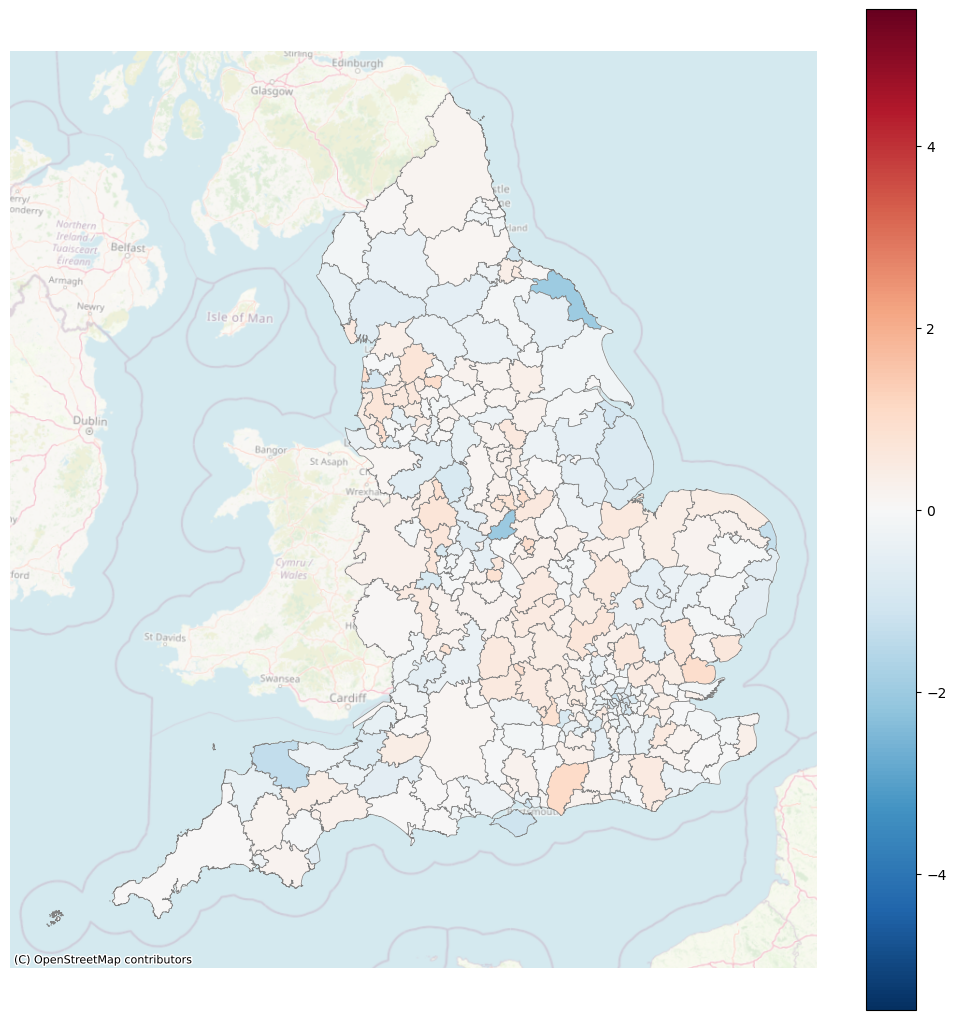

In [250]:
f,ax = plt.subplots(1, figsize=(13,13))
england_la_residuals.plot(column='residuals', 
                           cmap='RdBu_r',
                           vmin=-5.5,
                           vmax=5.5,
                           edgecolor='grey',
                           linewidth = 0.5,
                           legend=True, 
                           ax=ax)

ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik, alpha=0.5)


# remove axis
ax.set_axis_off()
plt.show();

### Groupby region

In [251]:
data_temp_london = data.copy()

In [252]:
data_temp_london['region_name'].replace('Inner London', 'London', inplace=True)
data_temp_london['region_name'].replace('Outer London', 'London', inplace=True)

In [253]:
region_residuals = data_temp_london.groupby('region_name')['residuals'].mean()

In [254]:
region_residuals = pd.DataFrame(region_residuals)
region_residuals

residuals
region_name                        
East Midlands              0.210459
East of England            0.103841
London                    -0.296169
North East                 0.031289
North West                 0.069148
South East                 0.102932
South West                -0.120247
West Midlands              0.007297
Yorkshire and The Humber  -0.007474

region map source: https://statistics.ukdataservice.ac.uk/dataset/2011-census-geography-boundaries-regions/resource/cf403e93-6bc8-4f63-b4f3-b9e7c47e769a 

In [255]:
map = gpd.read_file('infuse_rgn_2011.shp')

In [256]:
map

geo_code                 geo_label      label                      name  \
0  E12000006           East of England  E12000006           East of England   
1  E12000003  Yorkshire and The Humber  E12000003  Yorkshire and The Humber   
2  E12000008                South East  E12000008                South East   
3  E12000004             East Midlands  E12000004             East Midlands   
4  E12000007                    London  E12000007                    London   
5  E12000009                South West  E12000009                South West   
6  E12000005             West Midlands  E12000005             West Midlands   
7  E12000002                North West  E12000002                North West   
8  E12000001                North East  E12000001                North East   

                                            geometry  
0  POLYGON ((617106.688 343482.308, 617111.01 343...  
1  POLYGON ((510758.595 482644.305, 510766.754 48...  
2  MULTIPOLYGON (((508236.589 171797.716, 508240....  
3  POLYGON ((454996.828 276726.552, 454974.133 27...  
4  POLYGON ((534527.083 200056.467, 534528.375 20...  
5  MULTIPOLYGON (((409873.806 239325.091, 409867....  
6  POLYGON ((431443.073 299111.23, 431449.304 299...  
7  POLYGON ((380424.183 522381.432, 380424.209 52...  
8  MULTIPOLYGON (((450648.313 535677.376, 450686....

In [257]:
england_map_residuals = pd.merge(map, region_residuals, left_on='name', right_on='region_name', how='left')

In [258]:
england_map_residuals

geo_code                 geo_label      label                      name  \
0  E12000006           East of England  E12000006           East of England   
1  E12000003  Yorkshire and The Humber  E12000003  Yorkshire and The Humber   
2  E12000008                South East  E12000008                South East   
3  E12000004             East Midlands  E12000004             East Midlands   
4  E12000007                    London  E12000007                    London   
5  E12000009                South West  E12000009                South West   
6  E12000005             West Midlands  E12000005             West Midlands   
7  E12000002                North West  E12000002                North West   
8  E12000001                North East  E12000001                North East   

                                            geometry  residuals  
0  POLYGON ((617106.688 343482.308, 617111.01 343...   0.103841  
1  POLYGON ((510758.595 482644.305, 510766.754 48...  -0.007474  
2  MULTIPOLYGON (((508236.589 171797.716, 508240....   0.102932  
3  POLYGON ((454996.828 276726.552, 454974.133 27...   0.210459  
4  POLYGON ((534527.083 200056.467, 534528.375 20...  -0.296169  
5  MULTIPOLYGON (((409873.806 239325.091, 409867....  -0.120247  
6  POLYGON ((431443.073 299111.23, 431449.304 299...   0.007297  
7  POLYGON ((380424.183 522381.432, 380424.209 52...   0.069148  
8  MULTIPOLYGON (((450648.313 535677.376, 450686....   0.031289

In [259]:
england_map_residuals['residuals'].describe()

count    9.000000
mean     0.011231
std      0.146876
min     -0.296169
25%     -0.007474
50%      0.031289
75%      0.102932
max      0.210459
Name: residuals, dtype: float64

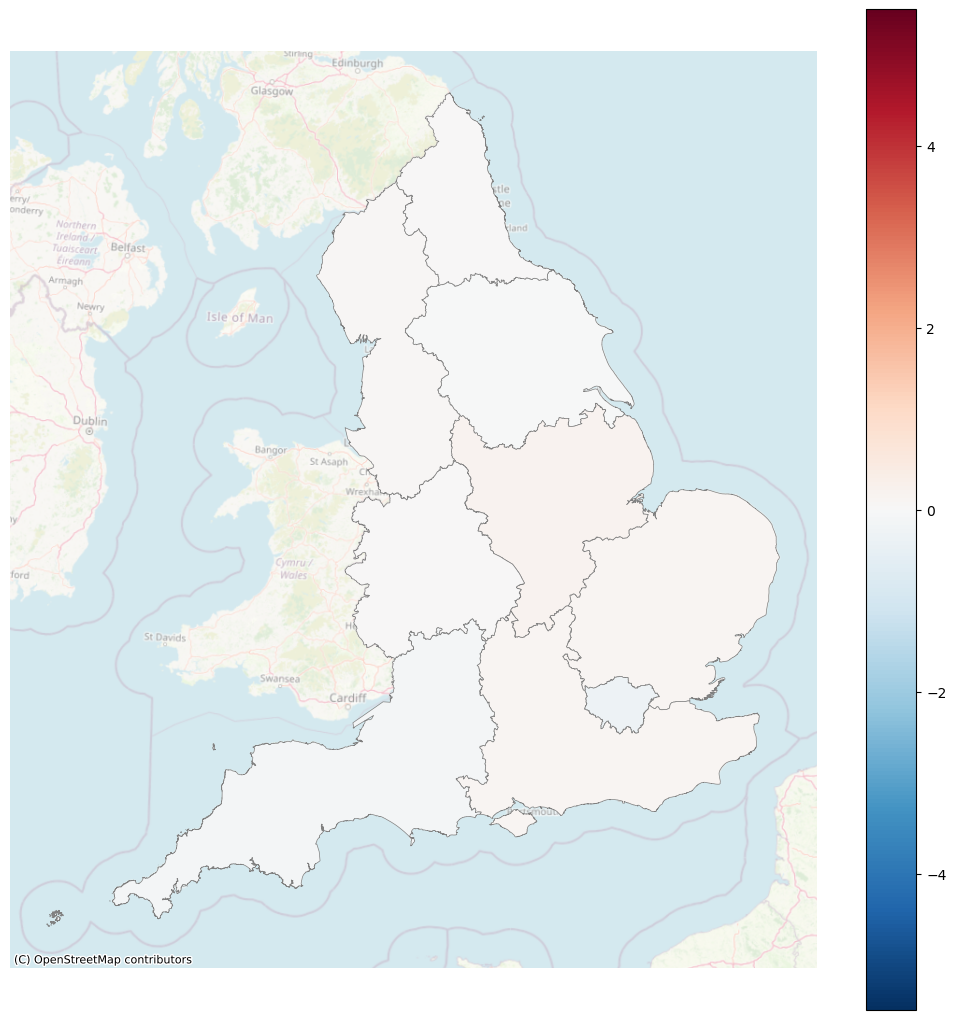

In [260]:
f,ax = plt.subplots(1, figsize=(13,13))
england_map_residuals.plot(column='residuals', 
                           cmap='RdBu_r',
                           edgecolor='grey',
                           linewidth = 0.5,
                           vmin=-5.5,
                           vmax=5.5,
                           legend=True, 
                           ax=ax)

ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik, alpha=0.5)

ax.set_axis_off()
plt.show();